#Telco Customer Churn Analysis

Subject: Predicting Customer Churn in Telecommunications Sector

Our project will follow a 7-step methodology that is closely aligned with well-known frameworks used in data science projects, such as CRISP-DM, Microsoft TDSP, and KDnuggets Modern Data Science Process. The 7-steps are as follows:

1. Data Integration and Cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Predictive Modelling
5. Model Evaluation
6. Explainability and Visualisation
7. Business Recommendations


## Environment Setput and Configuration

In [ ]:
# For Google Colab: Mount Google Drive

from google.colab import drive
from pathlib import Path
import os

drive.mount('/content/drive')

# Define paths
project_path = '/content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/'

data_path = project_path + '01_Data/'
notebook_path = project_path + '02_Notebooks/'
output_path = project_path + '03_Outputs/'

#Import python libraries
!pip install polars[excel]

#import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

print("Setup has been completed")

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 15.3 MB/s eta 0:00:00
Setup has been completed


## Upload Data to Dataframes


In [ ]:
demographics_df = pl.read_excel(f"{data_path}Telco_customer_churn_demographics.xlsx")
status_df      = pl.read_excel(f"{data_path}Telco_customer_churn_status.xlsx")
population_df  = pl.read_excel(f"{data_path}Telco_customer_churn_population.xlsx")
location_df    = pl.read_excel(f"{data_path}Telco_customer_churn_location.xlsx")
services_df    = pl.read_excel(f"{data_path}Telco_customer_churn_services.xlsx")

print(f"  - Demographics: {demographics_df.shape}")
print(f"  - Status: {status_df.shape}")
print(f"  - Population: {population_df.shape}")
print(f"  - Location: {location_df.shape}")
print(f"  - Services: {services_df.shape}")

print(f" *** All external files were sucessfully imported ***")

  - Demographics: (7043, 9)
  - Status: (7043, 11)
  - Population: (1671, 3)
  - Location: (7043, 9)
  - Services: (7043, 30)
 *** All external files were sucessfully imported ***


#1.Data Integration and Cleaning

**1.1 - Data Knowledge: Display schema and head rows of each dataframe**

In [ ]:
print("demographics_df.schema & head rows")
display(demographics_df.head(5))


demographics_df.schema & head rows


Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
str,i64,str,i64,str,str,str,str,i64
"""8779-QRDMV""",1,"""Male""",78,"""No""","""Yes""","""No""","""No""",0
"""7495-OOKFY""",1,"""Female""",74,"""No""","""Yes""","""Yes""","""Yes""",1
"""1658-BYGOY""",1,"""Male""",71,"""No""","""Yes""","""No""","""Yes""",3
"""4598-XLKNJ""",1,"""Female""",78,"""No""","""Yes""","""Yes""","""Yes""",1
"""4846-WHAFZ""",1,"""Female""",80,"""No""","""Yes""","""Yes""","""Yes""",1


In [ ]:
print("status_df.schema & head rows")
display(status_df.head(5))


status_df.schema & head rows


Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
str,i64,str,i64,str,str,i64,i64,i64,str,str
"""8779-QRDMV""",1,"""Q3""",3,"""Churned""","""Yes""",1,91,5433,"""Competitor""","""Competitor offered more data"""
"""7495-OOKFY""",1,"""Q3""",3,"""Churned""","""Yes""",1,69,5302,"""Competitor""","""Competitor made better offer"""
"""1658-BYGOY""",1,"""Q3""",2,"""Churned""","""Yes""",1,81,3179,"""Competitor""","""Competitor made better offer"""
"""4598-XLKNJ""",1,"""Q3""",2,"""Churned""","""Yes""",1,88,5337,"""Dissatisfaction""","""Limited range of services"""
"""4846-WHAFZ""",1,"""Q3""",2,"""Churned""","""Yes""",1,67,2793,"""Price""","""Extra data charges"""


In [ ]:

print("population_df.schema & head rows")
display(population_df.head(5))


population_df.schema & head rows


ID,Zip Code,Population
i64,i64,i64
1,90001,54492
2,90002,44586
3,90003,58198
4,90004,67852
5,90005,43019


In [ ]:
print("location_df.schema & head rows")
display(location_df.head(5))


location_df.schema & head rows


Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
str,i64,str,str,str,i64,str,f64,f64
"""8779-QRDMV""",1,"""United States""","""California""","""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582
"""7495-OOKFY""",1,"""United States""","""California""","""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237
"""1658-BYGOY""",1,"""United States""","""California""","""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715
"""4598-XLKNJ""",1,"""United States""","""California""","""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639
"""4846-WHAFZ""",1,"""United States""","""California""","""Whittier""",90602,"""33.972119, -118.020188""",33.972119,-118.020188


In [ ]:
print("services_df.schema & head rows")
display(services_df.head(5))

services_df.schema & head rows


Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
str,i64,str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64
"""8779-QRDMV""",1,"""Q3""","""No""",0,1,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",8,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""No""","""No""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",39.65,39.65,0.0,20,0.0,59.65
"""7495-OOKFY""",1,"""Q3""","""Yes""",1,8,"""Offer E""","""Yes""",48.85,"""Yes""","""Yes""","""Fiber Optic""",17,"""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Credit Card""",80.65,633.3,0.0,0,390.8,1024.1
"""1658-BYGOY""",1,"""Q3""","""No""",0,18,"""Offer D""","""Yes""",11.33,"""Yes""","""Yes""","""Fiber Optic""",52,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",95.45,1752.55,45.61,0,203.94,1910.88
"""4598-XLKNJ""",1,"""Q3""","""Yes""",1,25,"""Offer C""","""Yes""",19.76,"""No""","""Yes""","""Fiber Optic""",12,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",98.5,2514.5,13.43,0,494.0,2995.07
"""4846-WHAFZ""",1,"""Q3""","""Yes""",1,37,"""Offer C""","""Yes""",6.33,"""Yes""","""Yes""","""Fiber Optic""",14,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",76.5,2868.15,0.0,0,234.21,3102.36


**1.2 - Data Consolidation: Include all data in one dataframe**


In [ ]:
print("\n1.2 Merging datasets...")

# Start with demographics as base
df = demographics_df.clone()   #

# Merge location, services, status and population data
df = df.join(location_df, on="Customer ID", how="left", suffix="_loc")
df = df.join(services_df, on="Customer ID", how="left", suffix="_svc")
df = df.join(status_df, on="Customer ID", how="left", suffix="_sts")
df = df.join(
    population_df.select(["Zip Code", "Population"]),
    on="Zip Code",
    how="left"
)

print(f"  - Merged dataset shape: {df.shape}")



1.2 Merging datasets...
  - Merged dataset shape: (7043, 57)


In [ ]:
display(df.head(5))

Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_loc,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Count_svc,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Count_sts,Quarter_sts,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Population
str,i64,str,i64,str,str,str,str,i64,i64,str,str,str,i64,str,f64,f64,i64,str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,i64,str,i64,str,str,i64,i64,i64,str,str,i64
"""8779-QRDMV""",1,"""Male""",78,"""No""","""Yes""","""No""","""No""",0,1,"""United States""","""California""","""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582,1,"""Q3""","""No""",0,1,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",8,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""No""","""No""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",39.65,39.65,0.0,20,0.0,59.65,1,"""Q3""",3,"""Churned""","""Yes""",1,91,5433,"""Competitor""","""Competitor offered more data""",68701
"""7495-OOKFY""",1,"""Female""",74,"""No""","""Yes""","""Yes""","""Yes""",1,1,"""United States""","""California""","""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237,1,"""Q3""","""Yes""",1,8,"""Offer E""","""Yes""",48.85,"""Yes""","""Yes""","""Fiber Optic""",17,"""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Credit Card""",80.65,633.3,0.0,0,390.8,1024.1,1,"""Q3""",3,"""Churned""","""Yes""",1,69,5302,"""Competitor""","""Competitor made better offer""",55668
"""1658-BYGOY""",1,"""Male""",71,"""No""","""Yes""","""No""","""Yes""",3,1,"""United States""","""California""","""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715,1,"""Q3""","""No""",0,18,"""Offer D""","""Yes""",11.33,"""Yes""","""Yes""","""Fiber Optic""",52,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",95.45,1752.55,45.61,0,203.94,1910.88,1,"""Q3""",2,"""Churned""","""Yes""",1,81,3179,"""Competitor""","""Competitor made better offer""",47534
"""4598-XLKNJ""",1,"""Female""",78,"""No""","""Yes""","""Yes""","""Yes""",1,1,"""United States""","""California""","""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639,1,"""Q3""","""Yes""",1,25,"""Offer C""","""Yes""",19.76,"""No""","""Yes""","""Fiber Optic""",12,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",98.5,2514.5,13.43,0,494.0,2995.07,1,"""Q3""",2,"""Churned""","""Yes""",1,88,5337,"""Dissatisfaction""","""Limited range of services""",27778
"""4846-WHAFZ""",1,"""Female""",80,"""No""","""Yes""","""Yes""","""Yes""",1,1,"""United States""","""California""","""Whittier""",90602,"""33.972119, -118.020188""",33.972119,-118.020188,1,"""Q3""","""Yes""",1,37,"""Offer C""","""Yes""",6.33,"""Yes""","""Yes""","""Fiber Optic""",14,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",76.5,2868.15,0.0,0,234.21,3102.36,1,"""Q3""",2,"""Churned""","""Yes""",1,67,2793,"""Price""","""Extra data charges""",26265


**1.3 - Data Consolidation: Remove duplicated columns**

In [ ]:
print("\n1.3 Removing duplicate columns...")

# Identify columns with suffixes
cols_to_drop = [
    col for col in df.columns
    if col.endswith("_loc") or col.endswith("_svc") or col.endswith("_sts")
]

# Drop them
df = df.drop(cols_to_drop)

print(f"  - Dropped {len(cols_to_drop)} duplicate columns")
print(f"  - Final dataset shape: {df.shape}\n")

print("Displaying df.schema & head rows\n")
display(df.head(5))



1.3 Removing duplicate columns...
  - Dropped 4 duplicate columns
  - Final dataset shape: (7043, 53)

Displaying df.schema & head rows



Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Population
str,i64,str,i64,str,str,str,str,i64,str,str,str,i64,str,f64,f64,str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,i64,str,str,i64,i64,i64,str,str,i64
"""8779-QRDMV""",1,"""Male""",78,"""No""","""Yes""","""No""","""No""",0,"""United States""","""California""","""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582,"""Q3""","""No""",0,1,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",8,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""No""","""No""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",39.65,39.65,0.0,20,0.0,59.65,3,"""Churned""","""Yes""",1,91,5433,"""Competitor""","""Competitor offered more data""",68701
"""7495-OOKFY""",1,"""Female""",74,"""No""","""Yes""","""Yes""","""Yes""",1,"""United States""","""California""","""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237,"""Q3""","""Yes""",1,8,"""Offer E""","""Yes""",48.85,"""Yes""","""Yes""","""Fiber Optic""",17,"""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Credit Card""",80.65,633.3,0.0,0,390.8,1024.1,3,"""Churned""","""Yes""",1,69,5302,"""Competitor""","""Competitor made better offer""",55668
"""1658-BYGOY""",1,"""Male""",71,"""No""","""Yes""","""No""","""Yes""",3,"""United States""","""California""","""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715,"""Q3""","""No""",0,18,"""Offer D""","""Yes""",11.33,"""Yes""","""Yes""","""Fiber Optic""",52,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",95.45,1752.55,45.61,0,203.94,1910.88,2,"""Churned""","""Yes""",1,81,3179,"""Competitor""","""Competitor made better offer""",47534
"""4598-XLKNJ""",1,"""Female""",78,"""No""","""Yes""","""Yes""","""Yes""",1,"""United States""","""California""","""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639,"""Q3""","""Yes""",1,25,"""Offer C""","""Yes""",19.76,"""No""","""Yes""","""Fiber Optic""",12,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",98.5,2514.5,13.43,0,494.0,2995.07,2,"""Churned""","""Yes""",1,88,5337,"""Dissatisfaction""","""Limited range of services""",27778
"""4846-WHAFZ""",1,"""Female""",80,"""No""","""Yes""","""Yes""","""Yes""",1,"""United States""","""California""","""Whittier""",90602,"""33.972119, -118.020188""",33.972119,-118.020188,"""Q3""","""Yes""",1,37,"""Offer C""","""Yes""",6.33,"""Yes""","""Yes""","""Fiber Optic""",14,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",76.5,2868.15,0.0,0,234.21,3102.36,2,"""Churned""","""Yes""",1,67,2793,"""Price""","""Extra data charges""",26265


**1.4 - Data Consolidation: Check Missing Values**

In [ ]:
print("\n1.4 Checking for missing values...")

# Count missing values per column
missing_summary = (
    pl.DataFrame({
        "Column": df.columns,
        "Missing_Count": [df[col].null_count() for col in df.columns],
    })
    .with_columns([
        (pl.col("Missing_Count") / len(df) * 100)
        .round(2)
        .alias("Missing_Percentage")
    ])
    .filter(pl.col("Missing_Count") > 0)
    .sort("Missing_Count", descending=True)
)

if missing_summary.height > 0:
    print("\nColumns with missing values:")
    print(missing_summary)
else:
    print(" --- No missing values found --- ")



1.4 Checking for missing values...

Columns with missing values:
shape: (2, 3)
┌────────────────┬───────────────┬────────────────────┐
│ Column         ┆ Missing_Count ┆ Missing_Percentage │
│ ---            ┆ ---           ┆ ---                │
│ str            ┆ i64           ┆ f64                │
╞════════════════╪═══════════════╪════════════════════╡
│ Churn Category ┆ 5174          ┆ 73.46              │
│ Churn Reason   ┆ 5174          ┆ 73.46              │
└────────────────┴───────────────┴────────────────────┘


A**ttention to this:** The Churn Category and Churn Reason fields are mostly empty. This could be a limitation because these features could be important to explain the prediction model.

**1.5 - Data Consolidation: Save integrated dataset & Create data dictionary**

In [ ]:
print("\n1.5 Saving integrated dataset...")

# Save integrated dataset
df.write_csv(f"{output_path}telco_churn_integrated.csv")
print(f" Saved to: {output_path}telco_churn_integrated.csv")



1.5 Saving integrated dataset...
 Saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/telco_churn_integrated.csv


In [ ]:
# Create data dictionary
print(" Creating data dictionary...")

data_dict = pl.DataFrame({
    "Variable": df.columns,
    "Type": [str(dtype) for dtype in df.dtypes],
    "Non_Null_Count": [df[col].len() - df[col].null_count() for col in df.columns],
    "Unique_Values": [df[col].n_unique() for col in df.columns],
    "Sample_Values": [
        str(df[col].drop_nulls().unique().limit(3).to_list()) for col in df.columns
    ],
})

# Save dictionary
data_dict.write_csv(f"{output_path}data_dictionary.csv")
print(f" Data dictionary saved to: {output_path}data_dictionary.csv")

 Creating data dictionary...
 Data dictionary saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/data_dictionary.csv


#2.Exploratory Data Analysis

**2.1 - Target variable distribution**


2.1. Target Variable Distribution (Churn Label)...


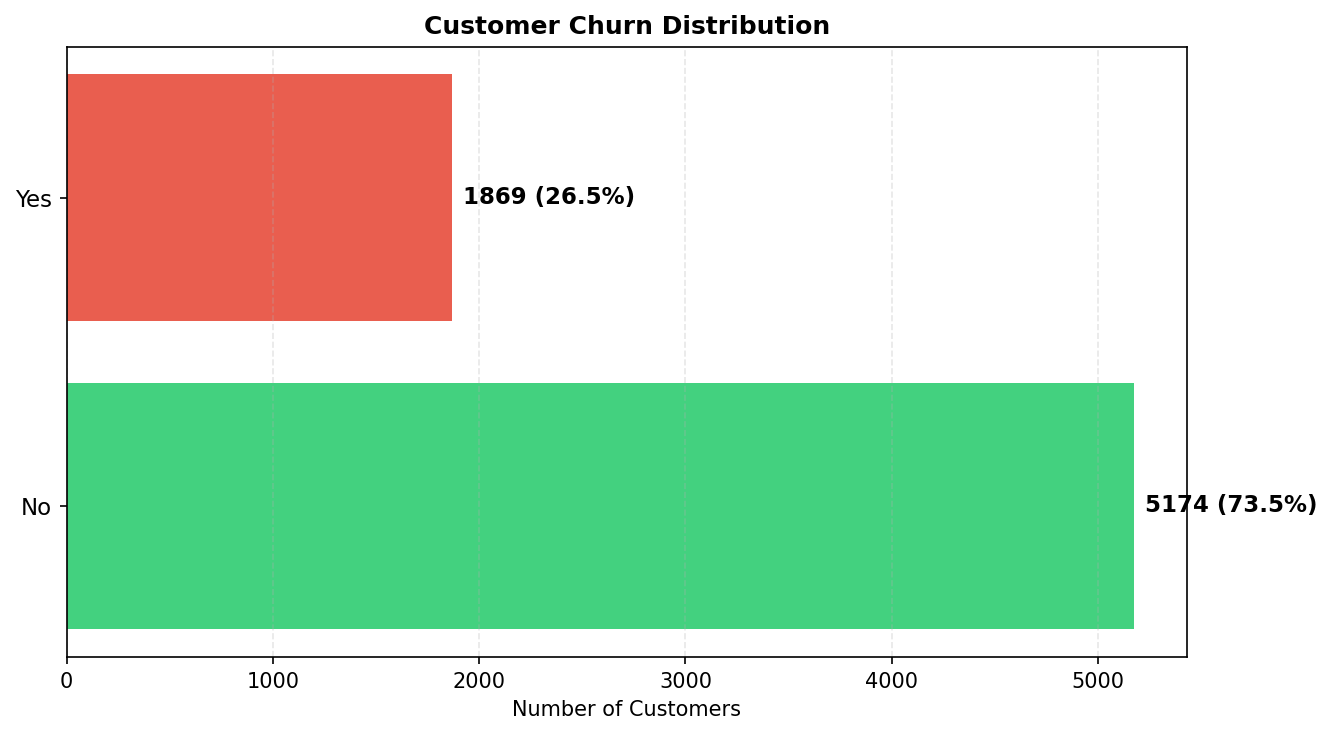


Bar chart saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/churn_distribution_bar.png


In [ ]:
import polars as pl
import matplotlib.pyplot as plt

print("\n2.1. Target Variable Distribution (Churn Label)...")

# --- Compute churn counts and percentages ---
churn_stats = (
    df.group_by("Churn Label")
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum() * 100)
          .round(2)
          .alias("Percentage")
      )
      .sort("Churn Label")
)

labels = churn_stats.get_column("Churn Label").to_list()
counts = churn_stats.get_column("Count").to_list()
percentages = churn_stats.get_column("Percentage").to_list()
total = sum(counts)

# Consistent colors: [No Churn, Churn] if labels are sorted that way
color_map = {
    "No": "#2ecc71",
    "No Churn": "#2ecc71",
    "Stayed": "#2ecc71",
    "Yes": "#e74c3c",
    "Churn": "#e74c3c",
    "Churned": "#e74c3c"
}
colors = [color_map.get(lbl, "#3498db") for lbl in labels]

#1) Create Horizontal Bar Chart
fig_bar, ax_bar = plt.subplots(figsize=(9, 5), dpi=150)

y_pos = range(len(labels))
ax_bar.barh(y_pos, counts, color=colors, alpha=0.9)

# Add labels: "count (xx.x%)"
for i, (c, p) in enumerate(zip(counts, percentages)):
    ax_bar.text(
        c + max(counts)*0.01,  #offset to the right
        i,
        f"{c} ({p:.1f}%)",
        va="center",
        fontsize=11,
        fontweight="bold"
    )

ax_bar.set_yticks(y_pos)
ax_bar.set_yticklabels(labels, fontsize=11)
ax_bar.set_xlabel("Number of Customers", fontsize=10)
ax_bar.set_title("Customer Churn Distribution", fontsize=12, fontweight="bold")
ax_bar.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
bar_path = f"{output_path}churn_distribution_bar.png"
fig_bar.savefig(bar_path, bbox_inches="tight")
plt.show()
plt.close(fig_bar)

print(f"\nBar chart saved: {bar_path}")



In churn datasets, it's very common to see something like Non-Churn (70-90%), Churn (10-30%), this is the classical annual customer behaviour. In our case we have a dataset with Churn equal to 26,5% so, yes our dataset is inbalanced but this should not be an issue if correctly adressed in the predict models that we will use.

**Gradient boosting (XGBoost):** Very robust to imbalance because:

*   Optimize log-loss, not accuracy.
*   Implicitly weight misclassifications more on the minority class.
*   Split trees based on information gain, which is sensitive to minority classes.   

In practice XGBoost behaves well up to 1:20 imbalance without any intervention.
our dataset is very close (around 1:3 or 1:4 imbalance).

**Random Forest and Logistic Regression:** We can use hiper_parameter "'class_weight = 'balanced'" and "Threshold tuning". Because the imbalance level in our dataset is not extreme this should be enough to use those models  with confidence on the results. To optimize the classification threshold we will not use the default value of 0.5, instead after some simulations we decided to use a threshold between 0.30 and 0.45.

In this kind of problems the real issue is not imbalance, the real issues for the companies are it's thresholds and the business cost. In fact, in churn, the cost of predictions is asymmetric and, due to that, the focus should stay on:

**False Negative (churner predicted as non-churn):** Which implies loss of customer lifetime value

**False Positive ():** Spend money and resources on unnecessary retention campaign's.


**2.2 - Descritive Statistics**

In [ ]:
print("\n2.2 Descriptive Statistics for Numerical Variables...")

# Select numeric columns
numerical_cols = [
    col for col, dtype in df.schema.items()
    if dtype in (pl.Int8, pl.Int16, pl.Int32, pl.Int64,
                 pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64,
                 pl.Float32, pl.Float64)
]

desc_stats = df.select(numerical_cols).describe()
display(desc_stats)

# Save to CSV
desc_stats.write_csv(f"{output_path}descriptive_statistics.csv")

print(f"Descriptive Statistics saved to: {output_path}descriptive_statistics.csv")



2.2 Descriptive Statistics for Numerical Variables...


statistic,Count,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV,Population
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.0,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.26537,58.50504,4400.295755,22139.603294
"""std""",0.0,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,15.448113,20.41894,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152,21152.392837
"""min""",1.0,19.0,0.0,90001.0,32.555828,-124.301372,0.0,1.0,0.0,0.0,18.25,18.8,0.0,0.0,0.0,21.36,1.0,0.0,5.0,2003.0,11.0
"""25%""",1.0,32.0,0.0,92101.0,33.990646,-121.78809,0.0,9.0,9.21,3.0,35.5,400.3,0.0,0.0,70.59,605.75,3.0,0.0,40.0,3469.0,2344.0
"""50%""",1.0,46.0,0.0,93518.0,36.205465,-119.595293,0.0,29.0,22.89,17.0,70.35,1394.55,0.0,0.0,401.44,2108.64,3.0,0.0,61.0,4527.0,17554.0
"""75%""",1.0,60.0,0.0,95329.0,38.161321,-117.969795,3.0,55.0,36.4,27.0,89.85,3789.2,0.0,0.0,1191.5,4801.93,4.0,1.0,76.0,5381.0,36125.0
"""max""",1.0,80.0,9.0,96150.0,41.962127,-114.192901,11.0,72.0,49.99,85.0,118.75,8684.8,49.79,150.0,3564.72,11979.34,5.0,1.0,96.0,6500.0,105285.0


Descriptive Statistics saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/descriptive_statistics.csv


**2.3 - Analysing Churn by demographic variables**

In [ ]:
def ensure_no_yes_order(df, id_col):
    desired_order = [id_col, "No", "Yes"]
    return df.select([c for c in desired_order if c in df.columns])

# By Gender

gender_churn = (
    df.group_by(["Gender", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Gender") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Gender",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Gender")
)

print("\nChurn Rate by Gender (%):")
gender_churn = ensure_no_yes_order(gender_churn, "Gender")
print(gender_churn)



Churn Rate by Gender (%):
shape: (2, 3)
┌────────┬───────┬───────┐
│ Gender ┆ No    ┆ Yes   │
│ ---    ┆ ---   ┆ ---   │
│ str    ┆ f64   ┆ f64   │
╞════════╪═══════╪═══════╡
│ Female ┆ 73.08 ┆ 26.92 │
│ Male   ┆ 73.84 ┆ 26.16 │
└────────┴───────┴───────┘


In [ ]:
# By Group Age

df = df.with_columns(
    pl.when(pl.col("Age") <= 30).then(pl.lit("<30"))
     .when(pl.col("Age") <= 50).then(pl.lit("30-50"))
     .when(pl.col("Age") <= 65).then(pl.lit("50-65"))
     .otherwise(pl.lit("65+"))
     .alias("Age_Group")
)

age_churn = (
    df.group_by(["Age_Group", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Age_Group") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Age_Group",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Age_Group")
)

print("\nChurn Rate by Group Age (%):")
age_churn = ensure_no_yes_order(age_churn, "Age_Group")
print(age_churn)


Churn Rate by Group Age (%):
shape: (4, 3)
┌───────────┬───────┬───────┐
│ Age_Group ┆ No    ┆ Yes   │
│ ---       ┆ ---   ┆ ---   │
│ str       ┆ f64   ┆ f64   │
╞═══════════╪═══════╪═══════╡
│ 30-50     ┆ 76.46 ┆ 23.54 │
│ 50-65     ┆ 74.61 ┆ 25.39 │
│ 65+       ┆ 58.14 ┆ 41.86 │
│ <30       ┆ 77.63 ┆ 22.37 │
└───────────┴───────┴───────┘


In [ ]:
# Senior Citizen

senior_churn = (
    df.group_by(["Senior Citizen", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Senior Citizen") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Senior Citizen",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Senior Citizen")
)

print("\nChurn Rate by Senior Citizen (%):")
senior_churn = ensure_no_yes_order(senior_churn, "Senior Citizen")
print(senior_churn)



Churn Rate by Senior Citizen (%):
shape: (2, 3)
┌────────────────┬───────┬───────┐
│ Senior Citizen ┆ No    ┆ Yes   │
│ ---            ┆ ---   ┆ ---   │
│ str            ┆ f64   ┆ f64   │
╞════════════════╪═══════╪═══════╡
│ No             ┆ 76.39 ┆ 23.61 │
│ Yes            ┆ 58.32 ┆ 41.68 │
└────────────────┴───────┴───────┘


In [ ]:
# By Marital Status

married_churn = (
    df.group_by(["Married", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Married") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Married",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Married")
)

print("\nChurn Rate by Marital Status (%):")
married_churn = ensure_no_yes_order(married_churn, "Married")
print(married_churn)



Churn Rate by Marital Status (%):
shape: (2, 3)
┌─────────┬───────┬───────┐
│ Married ┆ No    ┆ Yes   │
│ ---     ┆ ---   ┆ ---   │
│ str     ┆ f64   ┆ f64   │
╞═════════╪═══════╪═══════╡
│ No      ┆ 67.04 ┆ 32.96 │
│ Yes     ┆ 80.34 ┆ 19.66 │
└─────────┴───────┴───────┘


**2.4 - Analysing Churn by Service Variables**

In [ ]:
print("\n2.4 Churn Analysis by Services...")

# Contract Type

contract_churn = (
    df.group_by(["Contract", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Contract") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(values="Percentage", index="Contract", columns="Churn Label")
      .fill_null(0)
      .sort("Contract")
)

print("\nChurn Rate by Contract Type (%):")
contract_churn  = ensure_no_yes_order(contract_churn,  "Contract")
print(contract_churn)


# Internet Type
internet_churn = (
    df.group_by(["Internet Type", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Internet Type") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(values="Percentage", index="Internet Type", columns="Churn Label")
      .fill_null(0)
      .sort("Internet Type")
)

print("\nChurn Rate by Internet Type (%):")
internet_churn  = ensure_no_yes_order(internet_churn,  "Internet Type")
print(internet_churn)


# Payment Method
payment_churn = (
    df.group_by(["Payment Method", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Payment Method") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(values="Percentage", index="Payment Method", columns="Churn Label")
      .fill_null(0)
      .sort("Payment Method")
)

print("\nChurn Rate by Payment Method (%):")
payment_churn   = ensure_no_yes_order(payment_churn,   "Payment Method")
print(payment_churn)



2.4 Churn Analysis by Services...

Churn Rate by Contract Type (%):
shape: (3, 3)
┌────────────────┬───────┬───────┐
│ Contract       ┆ No    ┆ Yes   │
│ ---            ┆ ---   ┆ ---   │
│ str            ┆ f64   ┆ f64   │
╞════════════════╪═══════╪═══════╡
│ Month-to-Month ┆ 54.16 ┆ 45.84 │
│ One Year       ┆ 89.29 ┆ 10.71 │
│ Two Year       ┆ 97.45 ┆ 2.55  │
└────────────────┴───────┴───────┘

Churn Rate by Internet Type (%):
shape: (4, 3)
┌───────────────┬───────┬───────┐
│ Internet Type ┆ No    ┆ Yes   │
│ ---           ┆ ---   ┆ ---   │
│ str           ┆ f64   ┆ f64   │
╞═══════════════╪═══════╪═══════╡
│ Cable         ┆ 74.34 ┆ 25.66 │
│ DSL           ┆ 81.42 ┆ 18.58 │
│ Fiber Optic   ┆ 59.28 ┆ 40.72 │
│ None          ┆ 92.6  ┆ 7.4   │
└───────────────┴───────┴───────┘

Churn Rate by Payment Method (%):
shape: (3, 3)
┌─────────────────┬───────┬───────┐
│ Payment Method  ┆ No    ┆ Yes   │
│ ---             ┆ ---   ┆ ---   │
│ str             ┆ f64   ┆ f64   │
╞═════════════════╪══

**2.5 - Analysing Churn by Tenure** (Customer longevity: The number of months a customer stayed subscribed, i.e contract duration in months).

In [ ]:
print("\n2.5. Churn Analysis by Tenure...")

# Create tenure group
df = df.with_columns(
    pl.when(pl.col("Tenure in Months") <= 12).then(pl.lit("0-12m"))
     .when(pl.col("Tenure in Months") <= 24).then(pl.lit("12-24m"))
     .when(pl.col("Tenure in Months") <= 48).then(pl.lit("24-48m"))
     .otherwise(pl.lit("48m+"))
     .alias("Tenure_Group")
)

# Crosstab equivalent
tenure_churn = (
    df.group_by(["Tenure_Group", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Tenure_Group") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Tenure_Group",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Tenure_Group")
)

print("\nChurn Rate by Tenure Group (%):")
tenure_churn = ensure_no_yes_order(tenure_churn, "Tenure_Group")
print(tenure_churn)



2.5. Churn Analysis by Tenure...

Churn Rate by Tenure Group (%):
shape: (4, 3)
┌──────────────┬───────┬───────┐
│ Tenure_Group ┆ No    ┆ Yes   │
│ ---          ┆ ---   ┆ ---   │
│ str          ┆ f64   ┆ f64   │
╞══════════════╪═══════╪═══════╡
│ 0-12m        ┆ 52.56 ┆ 47.44 │
│ 12-24m       ┆ 71.29 ┆ 28.71 │
│ 24-48m       ┆ 79.61 ┆ 20.39 │
│ 48m+         ┆ 90.49 ┆ 9.51  │
└──────────────┴───────┴───────┘


**2.6 - Financial Metrics Analysis**

In [ ]:
print("\n2.6. Financial Metrics Analysis...")

financial_cols = ["Monthly Charge", "Total Revenue", "CLTV", "Total Charges"]

# --- Compute averages by churn label ---
financial_by_churn = (
    df.group_by("Churn Label")
      .agg([pl.col(c).mean().alias(c) for c in financial_cols])
      .sort("Churn Label")
)

# --- Format values as currency (€) with 2 decimals ---
formatted = financial_by_churn.with_columns([
    pl.col(c).map_elements(lambda v: f"€{v:,.2f}").alias(c)
    for c in financial_cols
])

print("\nAverage Financial Metrics by Churn:")
print(formatted)




2.6. Financial Metrics Analysis...

Average Financial Metrics by Churn:
shape: (2, 5)
┌─────────────┬────────────────┬───────────────┬───────────┬───────────────┐
│ Churn Label ┆ Monthly Charge ┆ Total Revenue ┆ CLTV      ┆ Total Charges │
│ ---         ┆ ---            ┆ ---           ┆ ---       ┆ ---           │
│ str         ┆ str            ┆ str           ┆ str       ┆ str           │
╞═════════════╪════════════════╪═══════════════╪═══════════╪═══════════════╡
│ No          ┆ €61.27         ┆ €3,418.37     ┆ €4,490.92 ┆ €2,550.79     │
│ Yes         ┆ €74.44         ┆ €1,971.35     ┆ €4,149.41 ┆ €1,531.80     │
└─────────────┴────────────────┴───────────────┴───────────┴───────────────┘


**2.7 - Correlation Analysis**


We discuss the use of Pearson's or Spearman Correlation methods.

Pearsons works well when: Variables are continuous; Relationships are linear; There are no extreme outliers, and; Data is approximately normal distribution.

Spearman works better if its necessary: To handle nonlinear but monotonic (the direction of change is consistent, even if the rate of change is not) patterns; Outliers; Work with ordinal, categorical encoded, or skewed variables, or; Capture effects like "high-Medium-Low" that are not linearly spaced.

As could be confirmed if both correlations are computed, Spearman gives stronger signal in churn datasets because:

1.   **Many relationships are monotonic, not linear: **

    *   Tenure ↓ -> Churn ↑
    *   MonthlyCharges ↑ -> Churn ↑
    *   Number of add-on services ↑ -> Churn ↓
    *   Payment method (e.g., electronic check) -> higher churn but not linearly spaced  

These patterns are directional, but not linear and **Spearman captures directions but Pearson's** do not.

2.   **Many variables in the dataset are ordinal disguised as numeric:**

    *   Tenure in Months
    *   Age
    *   Number of tickets
    *   Number of services
    *   Billing methods
    *   Contract type (encoded as 0/1/2)

**Pearson** treats the spacing as equal intervals, which is false. **Spearman** ignores the spacing and only cares about the order.

3.   **Churn is a binary variable:** Correlations with binary variables often violate Pearson assumptions. Spearman handles binary targets better because ranks are more meaningful.

4.   **Strong skewness and long tails:** Our dataset has variables like:

    *   MonthlyCharges
    *   TotalCharges
    *   Revenue
    *   Tenure

The distribution of these variables are not symmetric and contain outliers. Both characteristics that are bad for Pearson.

For educational purposes, we kept the Pearson correlation code in the notebook, commented out. Running it allows an immediate comparison and confirms that the values are broadly aligned with those obtained using Spearman. However, as expected, Spearman provides a more robust and meaningful measure of association in this dataset, as it better captures the monotonic patterns typical of churn-related variables.

In [ ]:
"""
# Select numerical columns for correlation
corr_cols = [
    "Age", "Tenure in Months", "Monthly Charge", "Total Revenue", "CLTV",
    "Satisfaction Score", "Churn Score", "Number of Referrals",
    "Avg Monthly GB Download", "Population"
]

# Compute Pearson's correlation matrix
corr_matrix = df.select(corr_cols).corr()

# Display correlation matrix
print("\nPearson's Correlation Matrix:")
print(corr_matrix)

# Save to CSV
corr_file = f"{output_path}Pearsons_correlation_matrix.csv"
corr_matrix.write_csv(corr_file)
print(f"\nPearson's Correlation matrix saved: {corr_file}")

# corr_matrix is a Polars DataFrame from: corr_matrix = df.select(corr_cols).corr()

# 1) Extract variable names from Polars'
if "column" in corr_matrix.columns:
    names = corr_matrix.get_column("column").to_list()
    vals_pl = corr_matrix.drop("column")
else:
    names = corr_cols
    vals_pl = corr_matrix

# 2) Convert values to pandas and set both axes labels
corr_pd = vals_pl.to_pandas()
corr_pd.index = names
corr_pd.columns = names

# 3) Display the heat map
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_pd.astype(float),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
)
plt.title("Pearson's Correlation Matrix of Numerical Variables", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# Show and save
plt.show()
heatmap_path = f"{output_path}Pearson's correlation_heatmap.png"
plt.savefig(heatmap_path, dpi=300, bbox_inches="tight")
print(f"Pearson's Correlation heatmap displayed and saved: {heatmap_path}")

"""

'\n# Select numerical columns for correlation\ncorr_cols = [\n    "Age", "Tenure in Months", "Monthly Charge", "Total Revenue", "CLTV",\n    "Satisfaction Score", "Churn Score", "Number of Referrals",\n    "Avg Monthly GB Download", "Population"\n]\n\n# Compute Pearson\'s correlation matrix\ncorr_matrix = df.select(corr_cols).corr()\n\n# Display correlation matrix\nprint("\nPearson\'s Correlation Matrix:")\nprint(corr_matrix)\n\n# Save to CSV\ncorr_file = f"{output_path}Pearsons_correlation_matrix.csv"\ncorr_matrix.write_csv(corr_file)\nprint(f"\nPearson\'s Correlation matrix saved: {corr_file}")\n\n# corr_matrix is a Polars DataFrame from: corr_matrix = df.select(corr_cols).corr()\n\n# 1) Extract variable names from Polars\'\nif "column" in corr_matrix.columns:\n    names = corr_matrix.get_column("column").to_list()\n    vals_pl = corr_matrix.drop("column")\nelse:\n    names = corr_cols\n    vals_pl = corr_matrix\n\n# 2) Convert values to pandas and set both axes labels\ncorr_pd = val

**Heat Map: Visualize correlation matrix**



2.7. Spearman Correlation Heatmap...


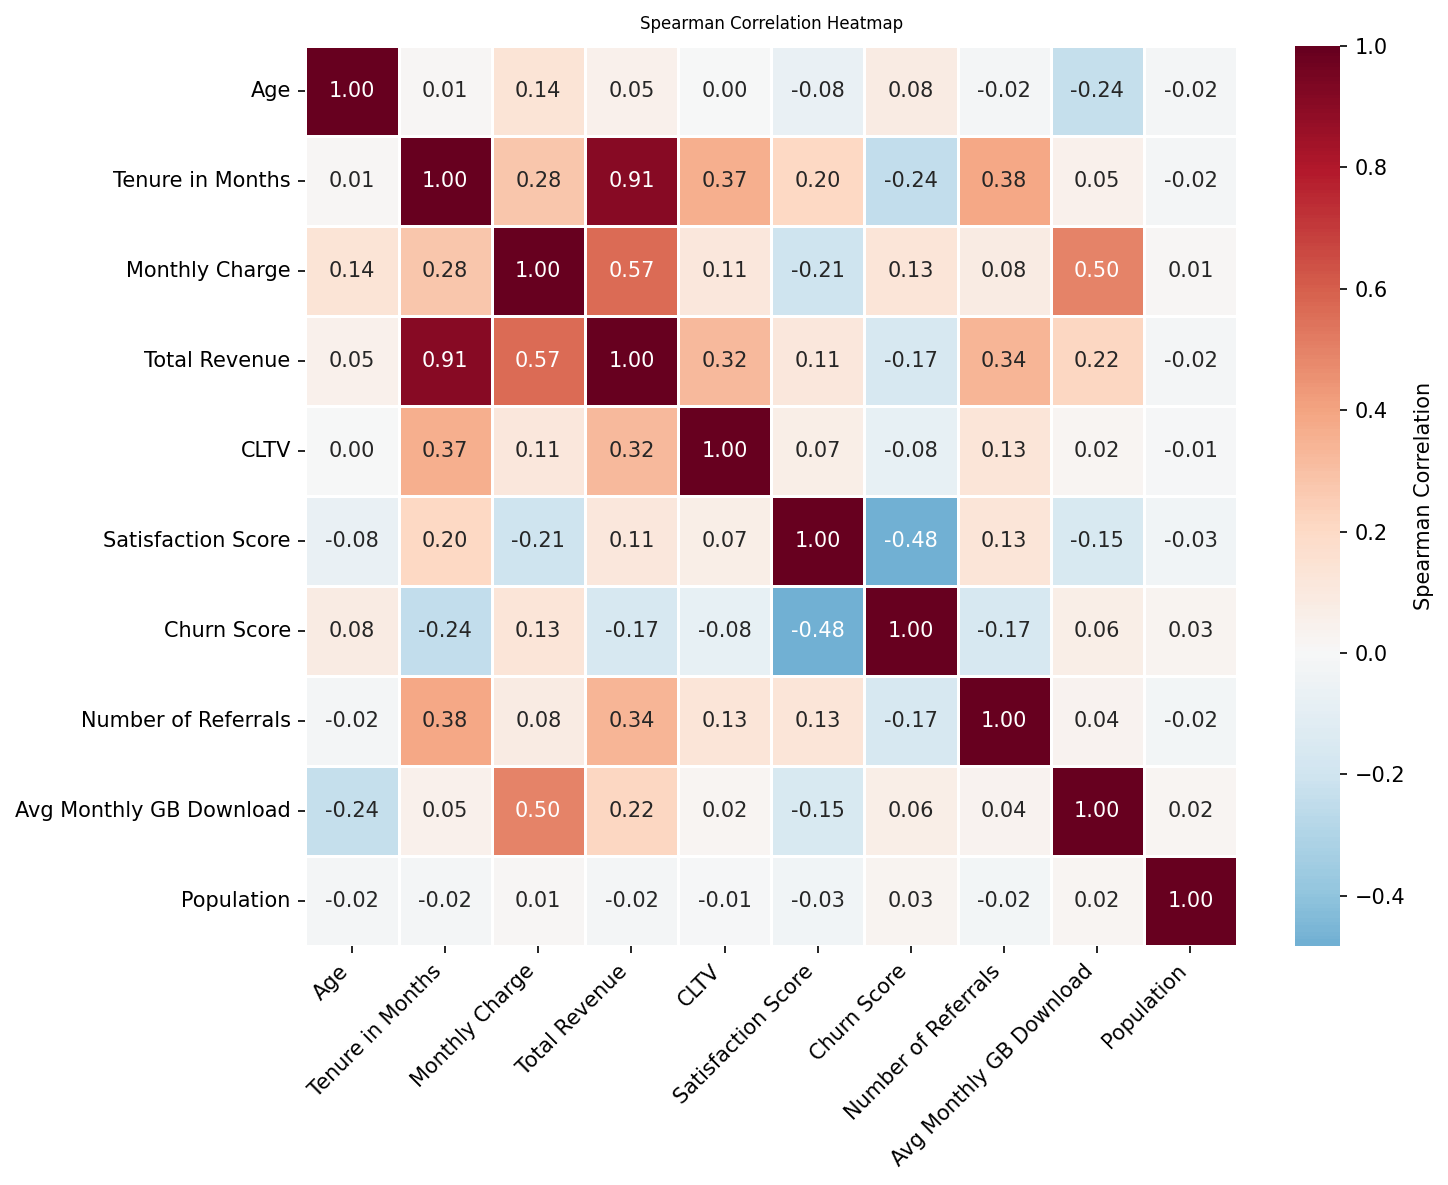

Spearman heatmap saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/Spearman_correlation_heatmap.png


<Figure size 640x480 with 0 Axes>

In [ ]:
print("\n2.7. Spearman Correlation Heatmap...")

# --- Select numerical columns for correlation ---
corr_cols = [
    "Age", "Tenure in Months", "Monthly Charge", "Total Revenue", "CLTV",
    "Satisfaction Score", "Churn Score", "Number of Referrals",
    "Avg Monthly GB Download", "Population"
]

# --- Convert to pandas and compute Spearman correlation ---
df_pd = df.select(corr_cols).to_pandas()
corr_matrix = df_pd.corr(method="spearman").round(3)

# --- Create heatmap ---
plt.figure(figsize=(10, 8), dpi=150)
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    linewidths=0.5,
    cbar_kws={"label": "Spearman Correlation"}
)

plt.title("Spearman Correlation Heatmap", fontsize=8, pad=8)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# --- Show heatmap on screen ---
plt.show()

# --- Save as PNG ---
png_path = f"{output_path}Spearman_correlation_heatmap.png"
plt.savefig(png_path, bbox_inches="tight")
print(f"Spearman heatmap saved: {png_path}")



**2.8 - Geographic analysis**  Not relevant because only one country (EUA), and one state (California) is present on the dataset. We maintain geographic analysis using city but, even so, small cities with a small number of customers apears in the top ten. It will be preferable to organize cities by counties/districts (we should return where at the end if we have time).

In [ ]:
geo_churn = (
    df.group_by("City")
      .agg([
          pl.count("Customer ID").alias("Total_Customers"),
          (pl.col("Churn Label") == "Yes").sum().alias("Churned_Customers")
      ])
      .with_columns(
          ((pl.col("Churned_Customers") / pl.col("Total_Customers")) * 100)
          .round(2)
          .alias("Churn_Rate")
      )
      .sort("Churn_Rate", descending=True)
)

# Save to CSV
geo_churn.write_csv(f"{output_path}churn_by_city.csv")
print(f"  ✓ Geographic churn analysis saved: {output_path}churn_by_city.csv")

# Show top 10 Cities
print("\nTop 10 Cities by Churn Rate:")
print(geo_churn.head(10))


  ✓ Geographic churn analysis saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/churn_by_city.csv

Top 10 Cities by Churn Rate:
shape: (10, 4)
┌──────────────────┬─────────────────┬───────────────────┬────────────┐
│ City             ┆ Total_Customers ┆ Churned_Customers ┆ Churn_Rate │
│ ---              ┆ ---             ┆ ---               ┆ ---        │
│ str              ┆ u32             ┆ u32               ┆ f64        │
╞══════════════════╪═════════════════╪═══════════════════╪════════════╡
│ Riverbank        ┆ 4               ┆ 4                 ┆ 100.0      │
│ Eldridge         ┆ 2               ┆ 2                 ┆ 100.0      │
│ Wrightwood       ┆ 4               ┆ 4                 ┆ 100.0      │
│ Johannesburg     ┆ 2               ┆ 2                 ┆ 100.0      │
│ Twain            ┆ 4               ┆ 4                 ┆ 100.0      │
│ South Lake Tahoe ┆ 2               ┆ 2                 ┆ 100.0      │
│ Boulder Creek    ┆ 4       

## **2.9 Additional Business Questions Analysis**

**Temporal and Lifecycle Analysis**

  
**Q4.** What is the critical period, in months, when customers are most likely to churn?

**Justification:** Identifying periods of risk enables proactive retention measures to be taken at specific stages of the customer lifecycle.

**Analysis:** Group customers by tenure ranges and calculate churn rates to identify the most vulnerable periods in customer lifecycle.


In [ ]:
def q4_critical_tenure_analysis(df):

    print(f"Q4: Critical Tenure Period Analysis")

    # Create tenure groups
    df_analysis = df.with_columns([
        pl.when(pl.col('Tenure in Months') < 6).then(pl.lit('0-6 months'))
        .when(pl.col('Tenure in Months') < 12).then(pl.lit('6-12 months'))
        .when(pl.col('Tenure in Months') < 24).then(pl.lit('12-24 months'))
        .when(pl.col('Tenure in Months') < 36).then(pl.lit('24-36 months'))
        .when(pl.col('Tenure in Months') < 48).then(pl.lit('36-48 months'))
        .otherwise(pl.lit('48+ months'))
        .alias('Tenure_Group')
    ])

    # Base metrics (numerical)
    tenure_churn = (
        df_analysis.group_by('Tenure_Group')
        .agg([
            pl.count('Customer ID').alias('Total_Customers'),
            pl.col('Customer Status')
                .filter(pl.col('Customer Status') == 'Churned')
                .count()
                .alias('Churned_Customers'),
            (
                pl.col('Customer Status')
                .filter(pl.col('Customer Status') == 'Churned')
                .count()
                / pl.count('Customer ID') * 100
            ).alias('Churn_Rate'),
            pl.col('Tenure in Months').mean().alias('Avg_Tenure'),
            pl.col('Total Revenue').sum().alias('Total_Revenue')
        ])
        .sort('Avg_Tenure')
    )

    formatted_table = tenure_churn.with_columns([
        pl.col("Churn_Rate").map_elements(lambda v: f"{v:.2f}%").alias("Churn_Rate"),
        pl.col("Avg_Tenure").map_elements(lambda v: f"{v:.2f}").alias("Avg_Tenure"),
        pl.col("Total_Revenue").map_elements(lambda v: f"€{v:,.2f}").alias("Total_Revenue")
    ])

    print("\nChurn Rate by Tenure Group:")
    print(formatted_table)

    tenure_data = tenure_churn.to_pandas()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Churn rate
    ax1.bar(tenure_data['Tenure_Group'], tenure_data['Churn_Rate'], color='#E63946')
    ax1.set_xlabel('Tenure Group', fontweight='bold')
    ax1.set_ylabel('Churn Rate (%)', fontweight='bold')
    ax1.set_title('Churn Rate (%) by Tenure Period', fontsize=12, fontweight='bold')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', alpha=0.3)

    # Customer distribution
    ax2.bar(tenure_data['Tenure_Group'], tenure_data['Total_Customers'], color='#457B9D')
    ax2.set_xlabel('Tenure Group', fontweight='bold')
    ax2.set_ylabel('Number of Customers', fontweight='bold')
    ax2.set_title('Number of Customers (Distribution) by Tenure Period', fontsize=12, fontweight='bold')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig(output_path + '/q4_tenure_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    contingency_table = (
        df_analysis.group_by(['Tenure_Group', 'Customer Status'])
        .agg(pl.count('Customer ID').alias('Count'))
        .pivot(index='Tenure_Group', columns='Customer Status', values='Count')
        .fill_null(0)
    )

    print("\nKey Insights:")
    critical_period = tenure_churn.filter(pl.col('Churn_Rate') == pl.col('Churn_Rate').max())
    print(f"Most critical period: {critical_period['Tenure_Group'][0]} with {critical_period['Churn_Rate'][0]:.2f}% churn rate")
    print(f"Safest period: {tenure_churn.filter(pl.col('Churn_Rate') == pl.col('Churn_Rate').min())['Tenure_Group'][0]}")

    return tenure_churn


Q4: Critical Tenure Period Analysis

Churn Rate by Tenure Group:
shape: (6, 6)
┌──────────────┬─────────────────┬───────────────────┬────────────┬────────────┬────────────────┐
│ Tenure_Group ┆ Total_Customers ┆ Churned_Customers ┆ Churn_Rate ┆ Avg_Tenure ┆ Total_Revenue  │
│ ---          ┆ ---             ┆ ---               ┆ ---        ┆ ---        ┆ ---            │
│ str          ┆ u32             ┆ u32               ┆ str        ┆ str        ┆ str            │
╞══════════════╪═════════════════╪═══════════════════╪════════════╪════════════╪════════════════╡
│ 0-6 months   ┆ 1360            ┆ 744               ┆ 54.71%     ┆ 2.25       ┆ €245,946.78    │
│ 6-12 months  ┆ 709             ┆ 255               ┆ 35.97%     ┆ 8.45       ┆ €489,520.11    │
│ 12-24 months ┆ 1047            ┆ 309               ┆ 29.51%     ┆ 17.13      ┆ €1,517,462.36  │
│ 24-36 months ┆ 876             ┆ 193               ┆ 22.03%     ┆ 29.34      ┆ €2,259,214.36  │
│ 36-48 months ┆ 748             ┆ 146 

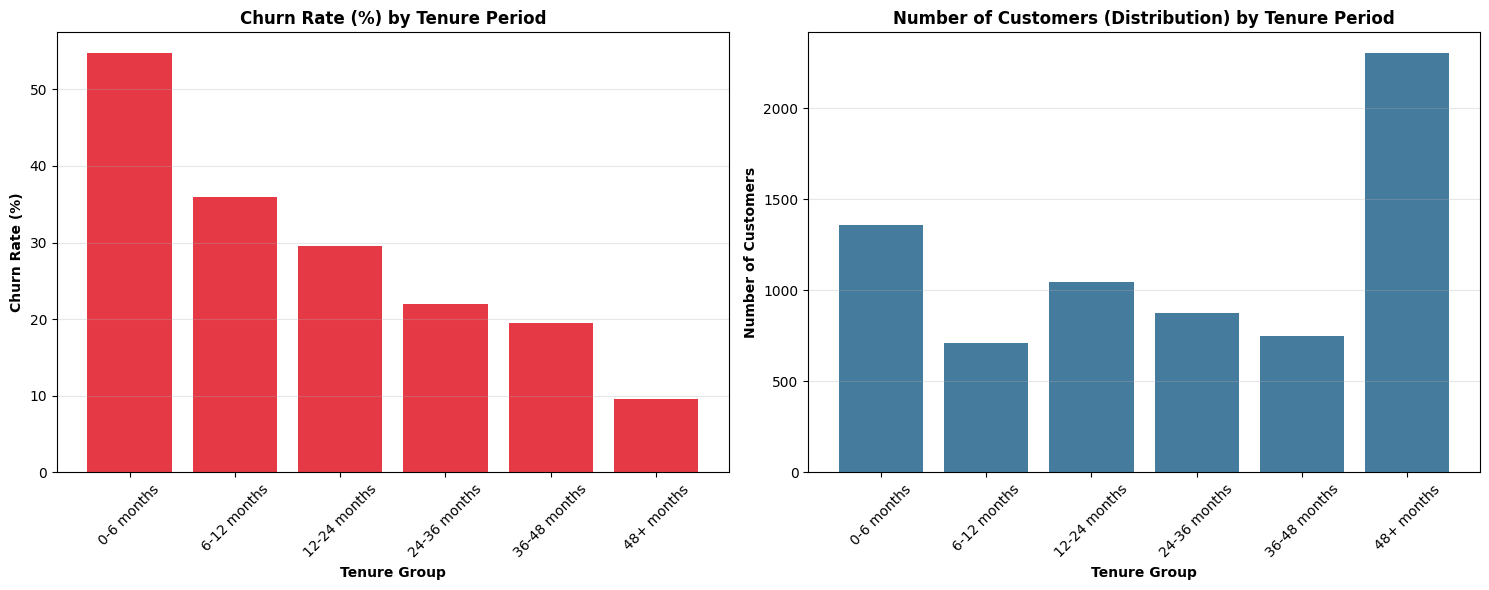


Key Insights:
Most critical period: 0-6 months with 54.71% churn rate
Safest period: 48+ months


In [ ]:
# call Q4
tenure_results = q4_critical_tenure_analysis(df)


**Financial Dimension and Customer Value.**

**Q6.** What is the relationship between customer lifetime value (CLV) and the probability of churn?  

**Justification:** Prioritising retention efforts for high-value customers can maximise campaign ROI.

**Analysis:** Segmentation by CLTV; churn rate analysis by segment; calculation of the financial impact of churn.


In [ ]:
def q6_cltv_churn_analysis(df):
    """
    Q6: Analyse relationship between CLTV and churn probability
    """
    print("Q6: Customer Lifetime Value (CLTV) and Churn Analysis")

    # Create CLTV groups
    df_analysis = df.with_columns([
        pl.col('CLTV')
        .qcut(4, labels=['Low', 'Medium', 'High', 'Very High'])
        .alias('CLTV_Segment')
    ])

    # Numerical metrics
    cltv_churn = (
        df_analysis
        .group_by('CLTV_Segment')
        .agg([
            pl.count('Customer ID').alias('Total_Customers'),
            pl.col('Customer Status')
              .filter(pl.col('Customer Status') == 'Churned')
              .count()
              .alias('Churned_Customers'),
            (
                pl.col('Customer Status')
                .filter(pl.col('Customer Status') == 'Churned')
                .count()
                / pl.count('Customer ID') * 100
            ).alias('Churn_Rate'),
            pl.col('CLTV').mean().alias('Avg_CLTV'),
            pl.col('Total Revenue').sum().alias('Total_Revenue')
        ])
        .sort('Avg_CLTV')
    )

    formatted = cltv_churn.with_columns([
        pl.col("Total_Customers").map_elements(lambda v: f"{v:,d}"),
        pl.col("Churned_Customers").map_elements(lambda v: f"{v:,d}"),
        pl.col("Churn_Rate").map_elements(lambda v: f"{v:.2f}%"),
        pl.col("Avg_CLTV").map_elements(lambda v: f"€{v:,.2f}"),
        pl.col("Total_Revenue").map_elements(lambda v: f"€{v:,.2f}")
    ])

    print("\nChurn Rate by CLTV Segment:")
    print(formatted)

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    cltv_data = cltv_churn.to_pandas()

    # Plot 1: Churn rate by CLTV segment
    axes[0].bar(
        cltv_data['CLTV_Segment'],
        cltv_data['Churn_Rate'],
        color=['#E63946', '#F4A261', '#457B9D', '#2A9D8F']
    )
    axes[0].set_xlabel('CLTV Segment', fontweight='bold')
    axes[0].set_ylabel('Churn Rate (%)', fontweight='bold')
    axes[0].set_title('Churn Rate by Customer Lifetime Value Segment',
                      fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)

    # Plot 2: Revenue at risk
    revenue_at_risk = cltv_data['Total_Revenue'] * cltv_data['Churn_Rate'] / 100

    axes[1].bar(
        cltv_data['CLTV_Segment'],
        revenue_at_risk / 1_000_000,
        color=['#E63946', '#F4A261', '#457B9D', '#2A9D8F']
    )
    axes[1].set_xlabel('CLTV Segment', fontweight='bold')
    axes[1].set_ylabel('Revenue at Risk (€ millions)', fontweight='bold')
    axes[1].set_title('Revenue at Risk by CLTV Segment',
                      fontsize=14, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig(output_path + '/q6_cltv_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    correlation = (
        df.with_columns(
            pl.col('Customer Status')
            .replace({'Churned': 1, 'Stayed': 0, 'Joined': 0})
            .cast(pl.Int8)
            .alias('Churn_Flag')
        )
        .select(
            pl.corr('CLTV', 'Churn_Flag').alias('CLTV_Churn_Correlation')
        )
    )

    print("\nKey Insights:")
    print(f"CLTV-Churn Correlation: {correlation['CLTV_Churn_Correlation'][0]:.4f}")

    high_value_churn = cltv_churn.filter(pl.col('CLTV_Segment') == 'Very High')
    print(f"High-value customer churn rate: {high_value_churn['Churn_Rate'][0]:.2f}%")

    print(
        "Total revenue at risk: "
        f"€{(revenue_at_risk.sum() / 1_000_000):.2f}M"
    )

    return cltv_churn



Q6: Customer Lifetime Value (CLTV) and Churn Analysis

Churn Rate by CLTV Segment:
shape: (4, 6)
┌──────────────┬─────────────────┬───────────────────┬────────────┬───────────┬───────────────┐
│ CLTV_Segment ┆ Total_Customers ┆ Churned_Customers ┆ Churn_Rate ┆ Avg_CLTV  ┆ Total_Revenue │
│ ---          ┆ ---             ┆ ---               ┆ ---        ┆ ---       ┆ ---           │
│ cat          ┆ str             ┆ str               ┆ str        ┆ str       ┆ str           │
╞══════════════╪═════════════════╪═══════════════════╪════════════╪═══════════╪═══════════════╡
│ Low          ┆ 1,763           ┆ 607               ┆ 34.43%     ┆ €2,743.63 ┆ €2,796,166.70 │
│ Medium       ┆ 1,759           ┆ 472               ┆ 26.83%     ┆ €4,079.81 ┆ €5,067,395.56 │
│ High         ┆ 1,760           ┆ 425               ┆ 24.15%     ┆ €4,959.76 ┆ €6,264,791.47 │
│ Very High    ┆ 1,761           ┆ 365               ┆ 20.73%     ┆ €5,819.81 ┆ €7,242,777.96 │
└──────────────┴─────────────────┴─────

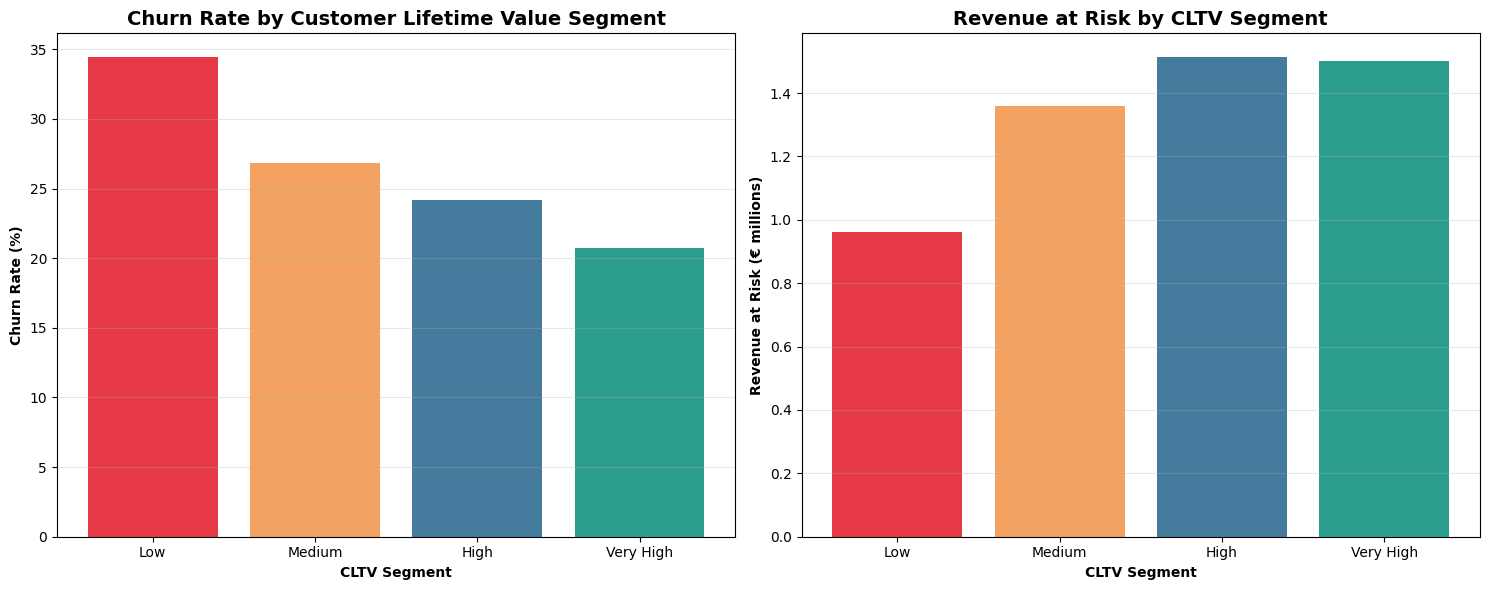


Key Insights:
CLTV-Churn Correlation: -0.1275
High-value customer churn rate: 20.73%
Total revenue at risk: €5.34M


In [ ]:
# Call Q6 function
cltv_results = q6_cltv_churn_analysis(df)

Q7. Are customers who have received a total refund or extra charges more likely to churn?

Justification: Billing issues and unexpected charges are often cited as reasons for dissatisfaction.

Analysis: Correlation between financial variables and churn; analysis of churn reasons related to costs.


In [ ]:
def q7_refunds_charges_analysis(df):

    """
    Q7: Impact of refunds and extra charges on churn
    """
    print("Q7: Refunds and Extra Charges Impact on Churn")

    import numpy as np
    from scipy import stats

    # --- 1. Analysis by Customer Status ---
    refund_analysis = (
        df.group_by('Customer Status')
          .agg([
              pl.col('Total Refunds')
                .filter(pl.col('Total Refunds') > 0)
                .count()
                .alias('Customers_With_Refunds'),
              pl.col('Total Refunds').mean().alias('Avg_Refund'),
              pl.col('Total Extra Data Charges').mean().alias('Avg_Extra_Charges'),
              pl.col('Total Long Distance Charges').mean().alias('Avg_LD_Charges')
          ])
    )

    refund_analysis_fmt = refund_analysis.with_columns([
        pl.col("Customers_With_Refunds").map_elements(lambda v: f"{v:,d}"),
        pl.col("Avg_Refund").map_elements(lambda v: f"€{v:,.2f}"),
        pl.col("Avg_Extra_Charges").map_elements(lambda v: f"€{v:,.2f}"),
        pl.col("Avg_LD_Charges").map_elements(lambda v: f"€{v:,.2f}")
    ])

    print("\nRefunds and Charges by Customer Status:")
    print(refund_analysis_fmt)

    # --- 2. Refund categories and churn ---
    df_analysis = df.with_columns([
        pl.when(pl.col('Total Refunds') == 0).then(pl.lit('No Refunds'))
         .when(pl.col('Total Refunds') < 50).then(pl.lit('Low Refunds'))
         .when(pl.col('Total Refunds') < 100).then(pl.lit('Medium Refunds'))
         .otherwise(pl.lit('High Refunds'))
         .alias('Refund_Category')
    ])

    refund_churn = (
        df_analysis
        .group_by('Refund_Category')
        .agg([
            pl.count('Customer ID').alias('Total_Customers'),
            (
                pl.col('Customer Status')
                .filter(pl.col('Customer Status') == 'Churned')
                .count()
                / pl.count('Customer ID') * 100
            ).alias('Churn_Rate')
        ])
        .sort('Churn_Rate', descending=True)
    )

    refund_churn_fmt = refund_churn.with_columns([
        pl.col("Total_Customers").map_elements(lambda v: f"{v:,d}"),
        pl.col("Churn_Rate").map_elements(lambda v: f"{v:.2f}%")
    ])

    print("\nChurn Rate by Refund Category:")
    print(refund_churn_fmt)

    # --- 3. Visualisation ---
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    refund_data = refund_churn.to_pandas()
    refund_status_data = refund_analysis.to_pandas()

    # Plot 1: Churn rate by refund category
    axes[0, 0].bar(refund_data['Refund_Category'], refund_data['Churn_Rate'], color='#E63946')
    axes[0, 0].set_xlabel('Refund Category', fontweight='bold')
    axes[0, 0].set_ylabel('Churn Rate (%)', fontweight='bold')
    axes[0, 0].set_title('Churn Rate by Refund Category', fontsize=12, fontweight='bold')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(axis='y', alpha=0.3)

    # Plot 2: Average refunds by customer status
    axes[0, 1].bar(refund_status_data['Customer Status'], refund_status_data['Avg_Refund'], color='#457B9D')
    axes[0, 1].set_xlabel('Customer Status', fontweight='bold')
    axes[0, 1].set_ylabel('Average Refund (€)', fontweight='bold')
    axes[0, 1].set_title('Average Refunds by Customer Status', fontsize=12, fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)

    # Plot 3: Extra data charges impact
    axes[1, 0].bar(refund_status_data['Customer Status'], refund_status_data['Avg_Extra_Charges'], color='#F4A261')
    axes[1, 0].set_xlabel('Customer Status', fontweight='bold')
    axes[1, 0].set_ylabel('Avg Extra Data Charges (€)', fontweight='bold')
    axes[1, 0].set_title('Extra Data Charges by Customer Status', fontsize=12, fontweight='bold')
    axes[1, 0].grid(axis='y', alpha=0.3)

    # Plot 4: Long distance charges impact
    axes[1, 1].bar(refund_status_data['Customer Status'], refund_status_data['Avg_LD_Charges'], color='#2A9D8F')
    axes[1, 1].set_xlabel('Customer Status', fontweight='bold')
    axes[1, 1].set_ylabel('Avg LD Charges (€)', fontweight='bold')
    axes[1, 1].set_title('Long Distance Charges by Customer Status', fontsize=12, fontweight='bold')
    axes[1, 1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig(output_path + '/q7_refunds_charges_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # --- 4. Statistical Test ---
    churned_refunds = df.filter(pl.col('Customer Status') == 'Churned')['Total Refunds'].to_numpy()
    stayed_refunds = df.filter(pl.col('Customer Status') == 'Stayed')['Total Refunds'].to_numpy()

    if len(churned_refunds) > 2 and len(stayed_refunds) > 2:
        t_stat, p_value = stats.ttest_ind(
            churned_refunds,
            stayed_refunds,
            equal_var=False,
            nan_policy='omit'
        )

        # Cohen’s d
        mean_churn = np.nanmean(churned_refunds)
        mean_stayed = np.nanmean(stayed_refunds)
        std_churn = np.nanstd(churned_refunds, ddof=1)
        std_stayed = np.nanstd(stayed_refunds, ddof=1)
        pooled_sd = np.sqrt(((std_churn ** 2) + (std_stayed ** 2)) / 2)
        cohen_d = (mean_churn - mean_stayed) / pooled_sd if pooled_sd > 0 else np.nan

        print("\nKey Insights:")
        print(f"T-test p-value for refunds (Churned vs Stayed): {p_value:.4f}")
        print(f"Cohen's d (effect size): {cohen_d:.3f}")

        stats_summary = {
            "t_stat": float(t_stat),
            "p_value": float(p_value),
            "cohen_d": float(cohen_d)
        }
    else:
        print("\nKey Insights:")
        print("Not enough observations to run a reliable t-test.")
        stats_summary = None

    return refund_analysis_fmt, refund_churn_fmt, stats_summary



Q7: Refunds and Extra Charges Impact on Churn

Refunds and Charges by Customer Status:
shape: (3, 5)
┌─────────────────┬────────────────────────┬────────────┬───────────────────┬────────────────┐
│ Customer Status ┆ Customers_With_Refunds ┆ Avg_Refund ┆ Avg_Extra_Charges ┆ Avg_LD_Charges │
│ ---             ┆ ---                    ┆ ---        ┆ ---               ┆ ---            │
│ str             ┆ str                    ┆ str        ┆ str               ┆ str            │
╞═════════════════╪════════════════════════╪════════════╪═══════════════════╪════════════════╡
│ Churned         ┆ 107                    ┆ €1.52      ┆ €7.16             ┆ €433.92        │
│ Joined          ┆ 5                      ┆ €0.24      ┆ €2.38             ┆ €38.13         │
│ Stayed          ┆ 413                    ┆ €2.30      ┆ €7.17             ┆ €942.29        │
└─────────────────┴────────────────────────┴────────────┴───────────────────┴────────────────┘

Churn Rate by Refund Category:
shape: (2, 3

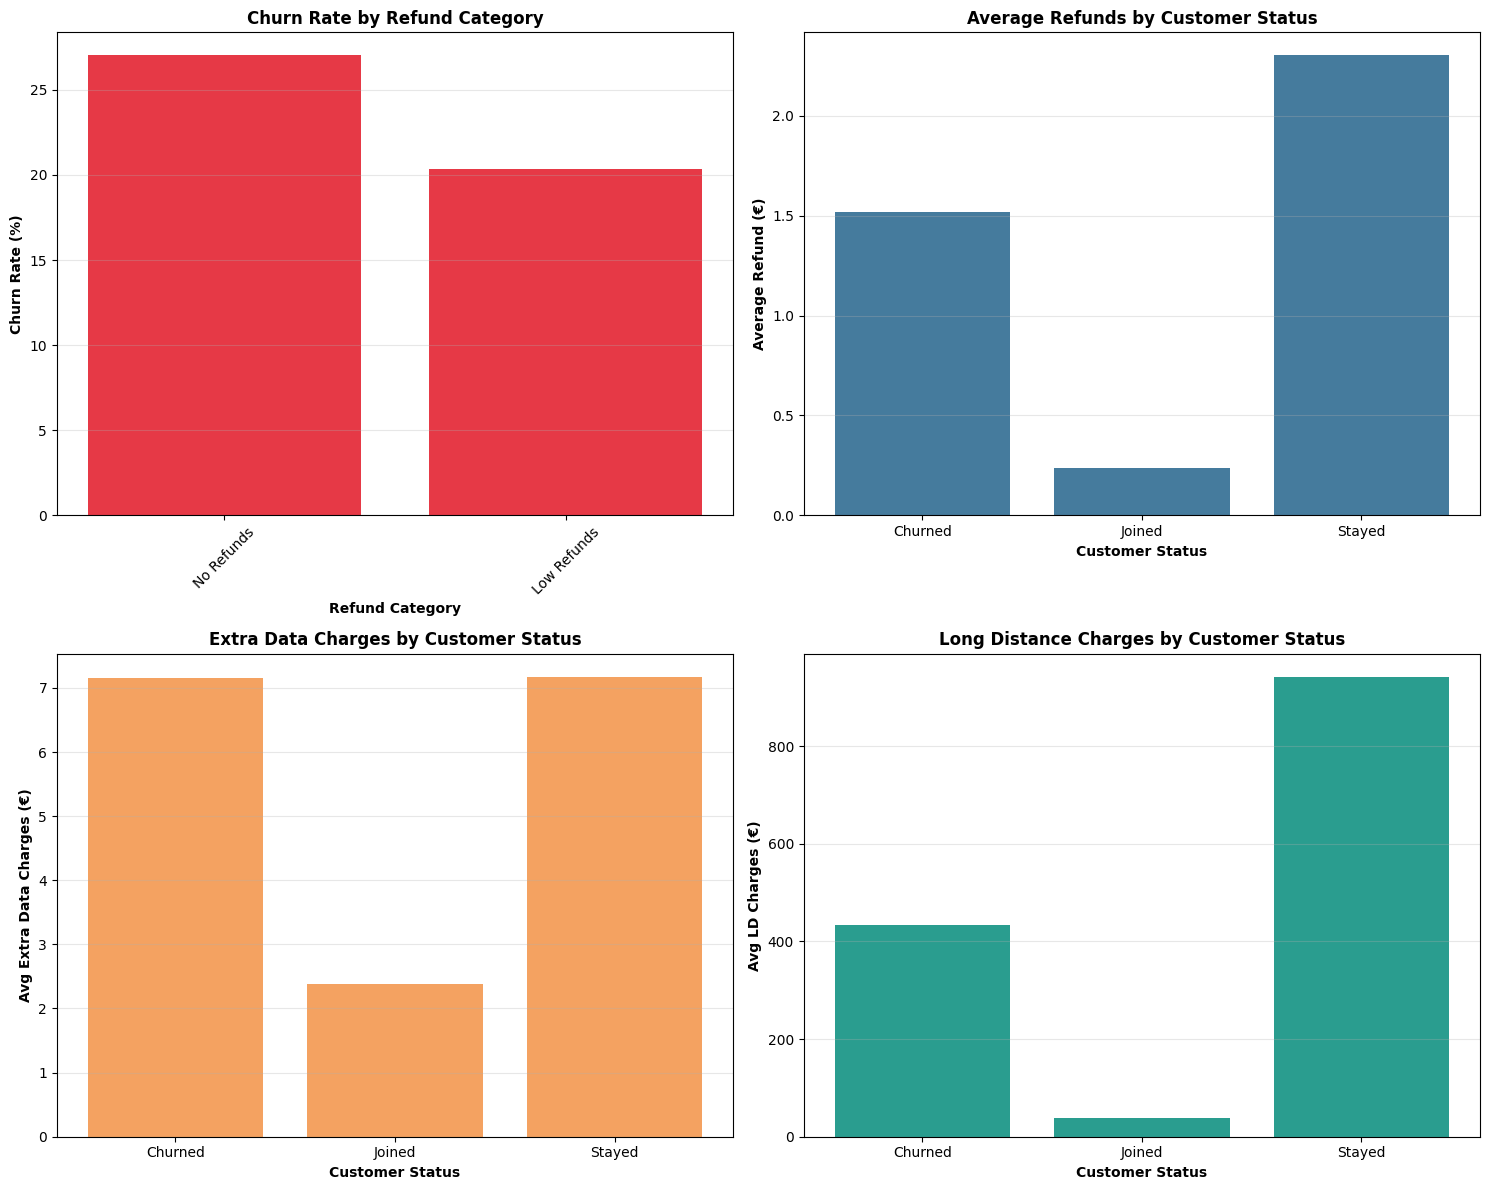


Key Insights:
T-test p-value for refunds (Churned vs Stayed): 0.0001
Cohen's d (effect size): -0.100


In [ ]:
# call Q7 function
refunds_results = q7_refunds_charges_analysis(df)

**Q8.** How does the payment method impact the churn rate?  

**Justification:** Different payment methods may indicate different levels of commitment and friction in the process.  

**Analysis:** Compare churn rates across different payment methods to identify which payment types are associated with higher retention.


In [ ]:
 def q8_payment_method_analysis(df):

    import os
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mtick

    print("Q8: Payment Method Impact on Churn?")

    # Aggregate churn metrics by payment method
    payment_churn = (
        df.group_by('Payment Method')
          .agg([
              pl.count('Customer ID').alias('Total_Customers'),
              pl.col('Customer Status')
                .filter(pl.col('Customer Status') == 'Churned')
                .count()
                .alias('Churned_Customers'),
              (
                  pl.col('Customer Status')
                  .filter(pl.col('Customer Status') == 'Churned')
                  .count()
                  / pl.count('Customer ID') * 100
              ).alias('Churn_Rate'),
              pl.col('Monthly Charge').mean().alias('Avg_Monthly_Charge')
          ])
          .sort('Churn_Rate', descending=True)
    )

    payment_churn_fmt = payment_churn.with_columns([
        pl.col("Total_Customers").map_elements(lambda v: f"{v:,d}"),
        pl.col("Churned_Customers").map_elements(lambda v: f"{v:,d}"),
        pl.col("Churn_Rate").map_elements(lambda v: f"{v:.2f}%"),
        pl.col("Avg_Monthly_Charge").map_elements(lambda v: f"€{v:,.2f}")
    ])

    print("\nChurn Rate by Payment Method:")
    print(payment_churn_fmt)

    # Prepare data for visualisation (numeric)
    payment_data = payment_churn.to_pandas()
    payment_data['Churn_pct'] = payment_data['Churn_Rate'] / 100.0
    payment_data['Stayed_pct'] = 1.0 - payment_data['Churn_pct']

    fig, ax = plt.subplots(figsize=(12, 6))

    y_pos = np.arange(len(payment_data))

    # Stayed segment
    ax.barh(
        y_pos,
        payment_data['Stayed_pct'],
        color='#2A9D8F',
        label='Stayed',
        height=0.45
    )

    # Churned segment
    ax.barh(
        y_pos,
        payment_data['Churn_pct'],
        left=payment_data['Stayed_pct'],
        color='#E63946',
        label='Churned',
        height=0.45
    )

    # Y-axis labels
    ax.set_yticks(y_pos)
    ax.set_yticklabels(payment_data['Payment Method'])

    ax.set_xlabel('Percentage of Customers', fontweight='bold')
    ax.set_ylabel('Payment Method', fontweight='bold')
    ax.set_title(
        'Customer Base and Churn Structure by Payment Method',
        fontsize=16,
        fontweight='bold'
    )

    # X-axis as percentages
    ax.set_xlim(0, 1)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.grid(axis='x', alpha=0.3)

    # Legend below the chart
    ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, -0.12),
        ncol=2,
        frameon=False
    )

    # Percentage labels inside the bars
    for i, row in payment_data.iterrows():
        stayed = row['Stayed_pct']
        churn = row['Churn_pct']

        # label for Stayed (only if big enough)
        if stayed > 0.05:
            ax.text(
                stayed / 2,
                y_pos[i],
                f"{stayed*100:.1f}%",
                va='center',
                ha='center',
                color='white',
                fontsize=9,
                fontweight='bold'
            )

        # label for Churned (only if big enough)
        if churn > 0.05:
            ax.text(
                stayed + churn / 2,
                y_pos[i],
                f"{churn*100:.1f}%",
                va='center',
                ha='center',
                color='white',
                fontsize=9,
                fontweight='bold'
            )

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.22, left=0.28, right=0.97)

    os.makedirs(output_path, exist_ok=True)
    fig.savefig(
        os.path.join(output_path, 'q8_payment_method_analysis.png'),
        dpi=300,
        bbox_inches='tight'
    )
    plt.show()

    # Key insights
    print("\nKey Insights:")
    highest_churn = payment_churn.head(1)
    lowest_churn = payment_churn.tail(1)

    print(
        f"Highest churn payment method: "
        f"{highest_churn['Payment Method'][0]} "
        f"({highest_churn['Churn_Rate'][0]:.2f}%)"
    )
    print(
        f"Lowest churn payment method: "
        f"{lowest_churn['Payment Method'][0]} "
        f"({lowest_churn['Churn_Rate'][0]:.2f}%)"
    )
    print("Recommendation: Incentivate migration to low-churn payment methods.")

    return payment_churn_fmt



Q8: Payment Method Impact on Churn?

Churn Rate by Payment Method:
shape: (3, 5)
┌─────────────────┬─────────────────┬───────────────────┬────────────┬────────────────────┐
│ Payment Method  ┆ Total_Customers ┆ Churned_Customers ┆ Churn_Rate ┆ Avg_Monthly_Charge │
│ ---             ┆ ---             ┆ ---               ┆ ---        ┆ ---                │
│ str             ┆ str             ┆ str               ┆ str        ┆ str                │
╞═════════════════╪═════════════════╪═══════════════════╪════════════╪════════════════════╡
│ Mailed Check    ┆ 385             ┆ 142               ┆ 36.88%     ┆ €47.63             │
│ Bank Withdrawal ┆ 3,909           ┆ 1,329             ┆ 34.00%     ┆ €72.68             │
│ Credit Card     ┆ 2,749           ┆ 398               ┆ 14.48%     ┆ €55.91             │
└─────────────────┴─────────────────┴───────────────────┴────────────┴────────────────────┘


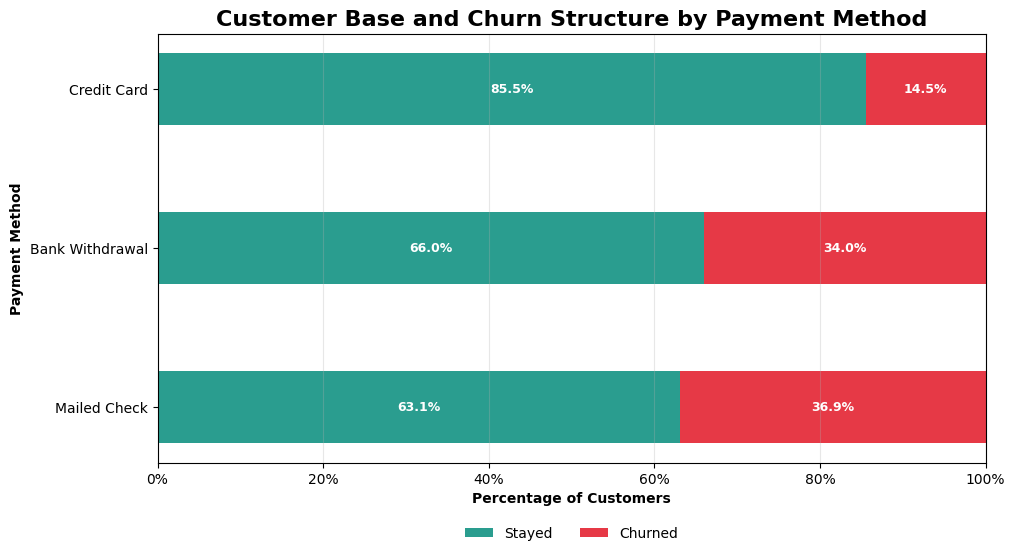


Key Insights:
Highest churn payment method: Mailed Check (36.88%)
Lowest churn payment method: Credit Card (14.48%)
Recommendation: Incentivate migration to low-churn payment methods.


In [ ]:
payment_results = q8_payment_method_analysis(df)


## **Service Dimensions and Engagement**

**Q9.** What is the relationship between service bundle complexity (number of services contracted) and churn rate?

**Justification:** Customers with multiple services may have higher switching costs and be less prone to churn.

**Analysis:** Examine how the number of services subscribed affects churn, testing if simpler or more complex bundles lead to better retention.

In [ ]:
def q9_service_bundle_complexity_analysis(df):
    """
    Q9: Service Bundle Complexity Analysis
    """
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mtick

    print("Q9: Service Bundle Complexity Analysis")

    # 1) Define service columns
    service_columns = [
        'Phone Service', 'Multiple Lines', 'Internet Service',
        'Online Security', 'Online Backup', 'Device Protection Plan',
        'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music'
    ]

    # 2) Create flag columns + service count
    df_analysis = (
        df.with_columns([
            pl.when(pl.col(col).is_in(['Yes', 'DSL', 'Fiber optic']))
              .then(1).otherwise(0).alias(col + '_flag')
            for col in service_columns
        ])
        .with_columns([
            pl.sum_horizontal([pl.col(col + '_flag') for col in service_columns]).alias('Service_Count')
        ])
    )

    # 3) Complexity groups  ✅ FIXED: use pl.lit(...) for labels
    df_analysis = df_analysis.with_columns([
        pl.when(pl.col('Service_Count') <= 2)
          .then(pl.lit('Simple (1–2 services)'))
         .when(pl.col('Service_Count') <= 4)
          .then(pl.lit('Moderate (3–4 services)'))
         .when(pl.col('Service_Count') <= 6)
          .then(pl.lit('Complex (5–6 services)'))
         .otherwise(pl.lit('Very Complex (7+ services)'))
         .alias('Bundle_Complexity')
    ])

    # 4) Aggregate metrics
    bundle_churn = (
        df_analysis
        .group_by('Bundle_Complexity')
        .agg([
            pl.count('Customer ID').alias('Total_Customers'),
            (pl.col('Customer Status')
             .filter(pl.col('Customer Status') == 'Churned')
             .count() / pl.count('Customer ID') * 100).alias('Churn_Rate'),
            pl.col('Monthly Charge').mean().alias('Avg_Monthly_Charge'),
            pl.col('CLTV').mean().alias('Avg_CLTV')
        ])
        .sort('Total_Customers', descending=True)
    )

    # -------- Format table for display --------
    bundle_churn_fmt = bundle_churn.with_columns([
        pl.col("Total_Customers").map_elements(lambda v: f"{v:,d}"),
        pl.col("Churn_Rate").map_elements(lambda v: f"{v:.2f}%"),
        pl.col("Avg_Monthly_Charge").map_elements(lambda v: f"€{v:,.2f}"),
        pl.col("Avg_CLTV").map_elements(lambda v: f"€{v:,.2f}")
    ])

    print("\nChurn Rate by Bundle Complexity:")
    print(bundle_churn_fmt)

    # -------- Visualisation --------
    bundle_data = bundle_churn.to_pandas()
    groups = bundle_data["Bundle_Complexity"]
    x_pos = np.arange(len(groups))

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot 1: Churn Rate
    axes[0].bar(x_pos, bundle_data['Churn_Rate'], color='#E63946', width=0.65)
    axes[0].set_xticks(x_pos)
    axes[0].set_xticklabels(groups, rotation=30, ha='right')
    axes[0].set_title('Churn Rate by Service Bundle Complexity', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Bundle Complexity', fontweight='bold')
    axes[0].set_ylabel('Churn Rate (%)', fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)

    for i, v in enumerate(bundle_data['Churn_Rate']):
        if v > 2:
            axes[0].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=9, fontweight='bold')

    # Plot 2: CLTV
    axes[1].bar(x_pos, bundle_data['Avg_CLTV'], color='#457B9D', width=0.65)
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels(groups, rotation=30, ha='right')
    axes[1].set_title('Customer Lifetime Value by Bundle Complexity', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Bundle Complexity', fontweight='bold')
    axes[1].set_ylabel('Average CLTV (€)', fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)

    for i, v in enumerate(bundle_data['Avg_CLTV']):
        axes[1].text(i, v + (v * 0.01), f"€{v:,.0f}", ha='center', fontsize=9, fontweight='bold')

    plt.tight_layout()
    os.makedirs(output_path, exist_ok=True)
    plt.savefig(os.path.join(output_path, 'q9_bundle_complexity_analysis.png'),
                dpi=300, bbox_inches='tight')
    plt.show()

    print("\nKey Insights:")
    print("→ Service bundle complexity impacts both churn and customer value.")
    print("→ Optimise bundle offerings based on the churn–CLTV trade-off.")

    return bundle_churn_fmt, df_analysis.select(['Customer ID', 'Service_Count', 'Bundle_Complexity'])


Q9: Service Bundle Complexity Analysis

Churn Rate by Bundle Complexity:
shape: (4, 5)
┌────────────────────────────┬─────────────────┬────────────┬────────────────────┬───────────┐
│ Bundle_Complexity          ┆ Total_Customers ┆ Churn_Rate ┆ Avg_Monthly_Charge ┆ Avg_CLTV  │
│ ---                        ┆ ---             ┆ ---        ┆ ---                ┆ ---       │
│ str                        ┆ str             ┆ str        ┆ str                ┆ str       │
╞════════════════════════════╪═════════════════╪════════════╪════════════════════╪═══════════╡
│ Simple (1–2 services)      ┆ 2,083           ┆ 17.81%     ┆ €28.70             ┆ €4,295.49 │
│ Very Complex (7+ services) ┆ 1,837           ┆ 19.49%     ┆ €94.29             ┆ €4,767.40 │
│ Complex (5–6 services)     ┆ 1,573           ┆ 32.99%     ┆ €78.72             ┆ €4,385.20 │
│ Moderate (3–4 services)    ┆ 1,550           ┆ 40.06%     ┆ €64.07             ┆ €4,121.39 │
└────────────────────────────┴─────────────────┴──────────

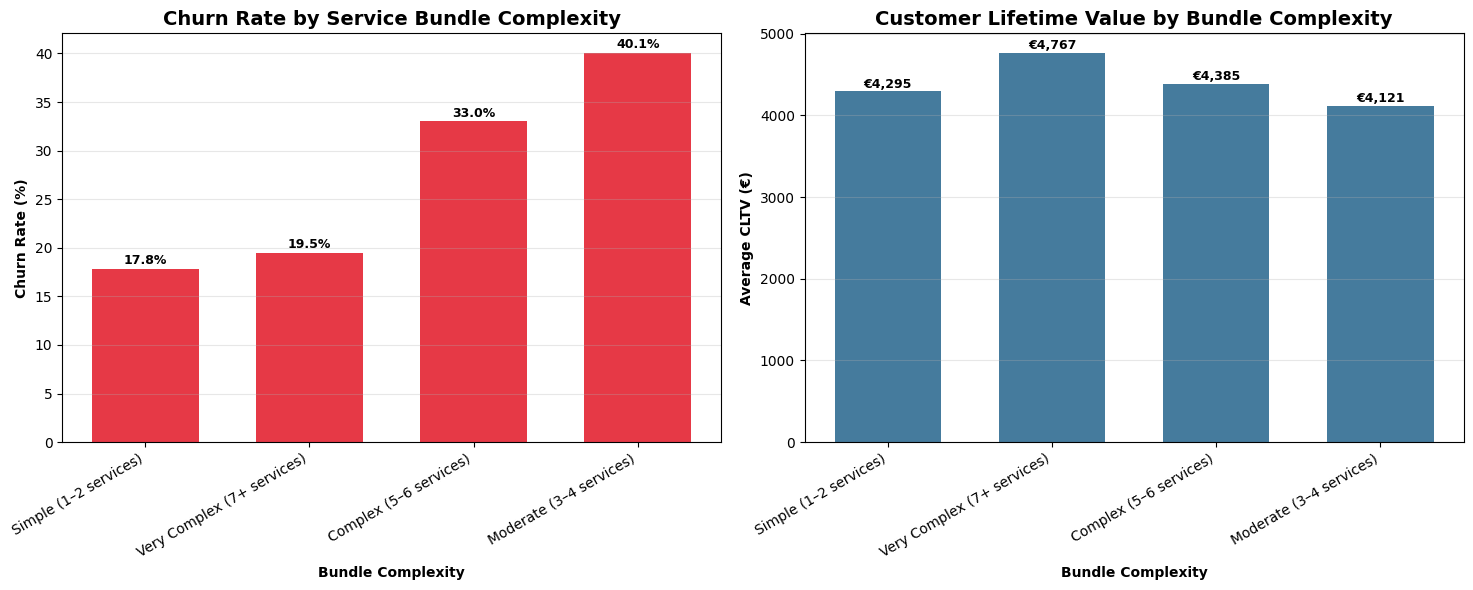


Key Insights:
→ Service bundle complexity impacts both churn and customer value.
→ Optimise bundle offerings based on the churn–CLTV trade-off.


In [ ]:
bundle_results, bundle_detail = q9_service_bundle_complexity_analysis(df)

**Q11.** What is the impact of contract type and the use of paperless billing on retention?

**Justification:** Long-term contracts and digitization may indicate different levels of commitment.

**Analysis:** Examine the combined effect of contract type and paperless billing on churn rates to identify optimal combinations.

In [ ]:
def q11_contract_paperless_analysis(df):
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.ticker as mtick

    print("Q11: Contract Type and Paperless Billing Analysis")

    contract_paperless = (
        df.group_by(['Contract', 'Paperless Billing'])
          .agg([
              pl.count('Customer ID').alias('Total_Customers'),
              (
                  pl.col('Customer Status')
                  .filter(pl.col('Customer Status') == 'Churned')
                  .count()
                  / pl.count('Customer ID') * 100
              ).alias('Churn_Rate'),
              pl.col('Monthly Charge').mean().alias('Avg_Monthly_Charge')
          ])
          .sort(['Contract', 'Paperless Billing'])
    )

    contract_paperless_fmt = contract_paperless.with_columns([
        pl.col("Total_Customers").map_elements(lambda v: f"{v:,d}"),
        pl.col("Churn_Rate").map_elements(lambda v: f"{v:.2f}%"),
        pl.col("Avg_Monthly_Charge").map_elements(lambda v: f"€{v:,.2f}")
    ])

    print("\nChurn Rate by Contract Type and Paperless Billing:")
    print(contract_paperless_fmt)

    contract_data = contract_paperless.to_pandas()

    contract_types = contract_data['Contract'].unique()
    x = np.arange(len(contract_types))
    width = 0.35

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    paperless_yes = (
        contract_data[contract_data['Paperless Billing'] == 'Yes']
        .set_index('Contract')['Churn_Rate']
        .reindex(contract_types)
    )
    paperless_no = (
        contract_data[contract_data['Paperless Billing'] == 'No']
        .set_index('Contract')['Churn_Rate']
        .reindex(contract_types)
    )

    # Bars
    axes[0].bar(x - width/2, paperless_yes, width, label='Paperless: Yes', color='#E63946')
    axes[0].bar(x + width/2, paperless_no, width, label='Paperless: No', color='#457B9D')

    # Labels
    axes[0].set_xlabel('Contract Type', fontweight='bold')
    axes[0].set_ylabel('Churn Rate (%)', fontweight='bold')
    axes[0].set_title('Churn Rate by Contract Type & Paperless Billing', fontsize=14, fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(contract_types, rotation=20, ha='right')
    axes[0].grid(axis='y', alpha=0.3)
    axes[0].legend()

    # Percentage labels above bars
    for idx, val in enumerate(paperless_yes):
        axes[0].text(idx - width/2, val + 0.5, f"{val:.1f}%", ha='center', fontsize=9, fontweight='bold')

    for idx, val in enumerate(paperless_no):
        axes[0].text(idx + width/2, val + 0.5, f"{val:.1f}%", ha='center', fontsize=9, fontweight='bold')

    pivot_data = contract_data.pivot(index='Contract', columns='Paperless Billing', values='Churn_Rate')

    sns.heatmap(
        pivot_data,
        annot=pivot_data.applymap(lambda x: f"{x:.2f}%"),
        fmt='',
        cmap='RdYlGn_r',
        ax=axes[1],
        linewidths=.5,
        linecolor='gray',
        cbar_kws={'label': 'Churn Rate (%)'}
    )

    axes[1].set_title('Churn Rate Heatmap: Contract × Paperless Billing', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Paperless Billing', fontweight='bold')
    axes[1].set_ylabel('Contract Type', fontweight='bold')

    plt.tight_layout()
    os.makedirs(output_path, exist_ok=True)
    plt.savefig(os.path.join(output_path, 'q11_contract_paperless_analysis.png'), dpi=300, bbox_inches='tight')
    plt.show()

    print("\nKey Insights:")
    best_combo = contract_paperless.filter(pl.col('Churn_Rate') == pl.col('Churn_Rate').min())
    worst_combo = contract_paperless.filter(pl.col('Churn_Rate') == pl.col('Churn_Rate').max())

    print(
        f"Best combination: {best_combo['Contract'][0]} + Paperless {best_combo['Paperless Billing'][0]} "
        f"({best_combo['Churn_Rate'][0]:.2f}%)"
    )
    print(
        f"Worst combination: {worst_combo['Contract'][0]} + Paperless {worst_combo['Paperless Billing'][0]} "
        f"({worst_combo['Churn_Rate'][0]:.2f}%)"
    )

    return contract_paperless_fmt


Q11: Contract Type and Paperless Billing Analysis

Churn Rate by Contract Type and Paperless Billing:
shape: (6, 5)
┌────────────────┬───────────────────┬─────────────────┬────────────┬────────────────────┐
│ Contract       ┆ Paperless Billing ┆ Total_Customers ┆ Churn_Rate ┆ Avg_Monthly_Charge │
│ ---            ┆ ---               ┆ ---             ┆ ---        ┆ ---                │
│ str            ┆ str               ┆ str             ┆ str        ┆ str                │
╞════════════════╪═══════════════════╪═════════════════╪════════════╪════════════════════╡
│ Month-to-Month ┆ No                ┆ 1,222           ┆ 33.22%     ┆ €52.83             │
│ Month-to-Month ┆ Yes               ┆ 2,388           ┆ 52.30%     ┆ €72.11             │
│ One Year       ┆ No                ┆ 693             ┆ 6.93%      ┆ €52.83             │
│ One Year       ┆ Yes               ┆ 857             ┆ 13.77%     ┆ €76.03             │
│ Two Year       ┆ No                ┆ 957             ┆ 1.57%   

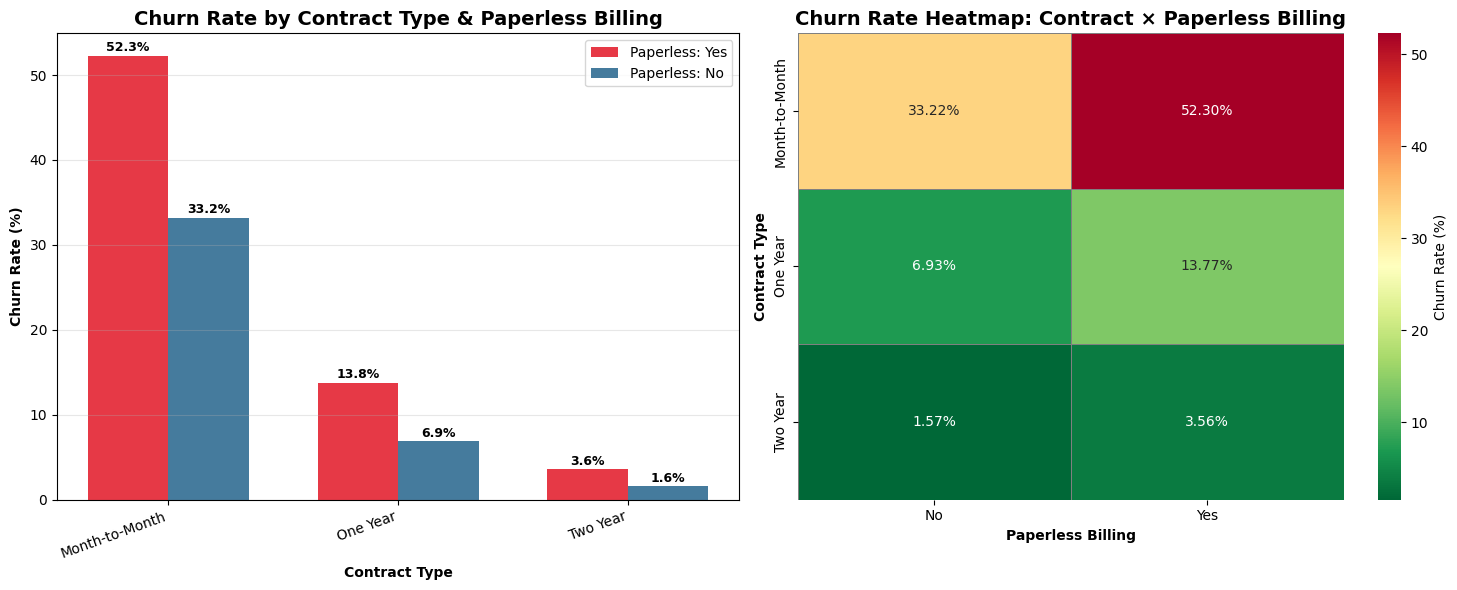


Key Insights:
Best combination: Two Year + Paperless No (1.57%)
Worst combination: Month-to-Month + Paperless Yes (52.30%)


In [ ]:
contract_paperless_results = q11_contract_paperless_analysis(df)

**Q12.** Do customers with security and support services (Online Security, Premium Tech Support) have lower churn?

**Justification:** Value-added services can increase satisfaction and perceived value.

**Analysis:** Evaluate how premium services (security, backup, tech support) affect customer retention and satisfaction.



In [ ]:
def q12_security_support_analysis(df):
    print("Q12: Security and Support Services Impact")

    import os
    import numpy as np
    import matplotlib.pyplot as plt

    # Analyse each premium service
    services = ['Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support']

    service_impact = []
    for service in services:
        service_churn = (
            df.group_by(service)
              .agg([
                  pl.count('Customer ID').alias('Total_Customers'),
                  (
                      pl.col('Customer Status')
                      .filter(pl.col('Customer Status') == 'Churned')
                      .count() / pl.count('Customer ID') * 100
                  ).alias('Churn_Rate')
              ])
        )

        with_yes = service_churn.filter(pl.col(service) == 'Yes')
        with_no  = service_churn.filter(pl.col(service) == 'No')

        service_impact.append({
            'Service': service,
            'With_Service_Churn': with_yes['Churn_Rate'][0] if with_yes.height > 0 else 0.0,
            'Without_Service_Churn': with_no['Churn_Rate'][0] if with_no.height > 0 else 0.0
        })

    # Numeric summary
    service_df = pl.DataFrame(service_impact)

    # ---------- Formatted table for display ----------
    service_df_fmt = service_df.with_columns([
        pl.col("With_Service_Churn").map_elements(lambda v: f"{v:.2f}%"),
        pl.col("Without_Service_Churn").map_elements(lambda v: f"{v:.2f}%")
    ])

    print("\nChurn Rate Impact by Premium Service:")
    print(service_df_fmt)

    # ---------- Visualisation ----------
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    for idx, service in enumerate(services):
        service_data = (
            df.group_by(service)
              .agg([
                  pl.count('Customer ID').alias('Total_Customers'),
                  (
                      pl.col('Customer Status')
                      .filter(pl.col('Customer Status') == 'Churned')
                      .count() / pl.count('Customer ID') * 100
                  ).alias('Churn_Rate')
              ])
              .to_pandas()
        )

        # Ensure consistent order: No, Yes
        if service in service_data.columns:
            if set(service_data[service]) >= {'Yes', 'No'}:
                service_data = (
                    service_data.set_index(service)
                               .reindex(['No', 'Yes'])
                               .reset_index()
                )

        x = np.arange(len(service_data))
        colors = ['#E63946' if v == 'No' else '#2A9D8F' for v in service_data[service]]

        axes[idx].bar(x, service_data['Churn_Rate'], color=colors, width=0.6)
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels(service_data[service])
        axes[idx].set_xlabel(service, fontweight='bold')
        axes[idx].set_ylabel('Churn Rate (%)', fontweight='bold')
        axes[idx].set_title(f'{service} Impact on Churn', fontsize=12, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

        # Add % labels above bars
        for i, v in enumerate(service_data['Churn_Rate']):
            axes[idx].text(
                i,
                v + 0.5,
                f"{v:.1f}%",
                ha='center',
                fontsize=9,
                fontweight='bold'
            )

    plt.tight_layout()
    os.makedirs(output_path, exist_ok=True)
    plt.savefig(output_path + '/q12_security_support_analysis.png',
                dpi=300, bbox_inches='tight')
    plt.show()

    # ---------- Key Insights + Bundle Calculation ----------
    print("\nKey Insights:")

    # Per-service impact (reduction in churn when service is present)
    service_df_pd = service_df.to_pandas()
    service_df_pd['Impact'] = service_df_pd['Without_Service_Churn'] - service_df_pd['With_Service_Churn']

    # Most effective individual service
    best_service = service_df_pd.loc[service_df_pd['Impact'].idxmax()]
    print(f"Most effective single service: {best_service['Service']}")
    print(f"Churn reduction (with vs without): {best_service['Impact']:.2f} percentage points")

    # --- Define "strong impact" services for bundle ---
    impact_mean = service_df_pd['Impact'].mean()
    strong_services = service_df_pd[service_df_pd['Impact'] > impact_mean]['Service'].tolist()

    if len(strong_services) == 0:
        print("\nNo services show impact above the average; cannot define a strong bundle.")
        print("Recommendation: Focus on the best single service and revisit bundle once new offers are tested.")
        return service_df

    print(f"\nServices selected for strong retention bundle (impact > mean): {strong_services}")

    # Flag customers who have ALL strong services active
    df_bundle = df.with_columns([
        pl.all_horizontal([pl.col(s) == 'Yes' for s in strong_services])
          .alias('Strong_Bundle_Active')
    ])

    bundle_impact = (
        df_bundle.group_by('Strong_Bundle_Active')
        .agg([
            pl.count('Customer ID').alias('Total_Customers'),
            (
                pl.col('Customer Status')
                .filter(pl.col('Customer Status') == 'Churned')
                .count() / pl.count('Customer ID') * 100
            ).alias('Churn_Rate')
        ])
    )

    # Formatted bundle impact for display
    bundle_impact_fmt = bundle_impact.with_columns([
        pl.col("Total_Customers").map_elements(lambda v: f"{v:,d}"),
        pl.col("Churn_Rate").map_elements(lambda v: f"{v:.2f}%")
    ])

    print("\nChurn Rate for Strong Retention Bundle:")
    print(bundle_impact_fmt)

    # Compute churn reduction for bundle vs non-bundle, if both groups exist
    bundle_pd = bundle_impact.to_pandas()

    if bundle_pd['Strong_Bundle_Active'].nunique() == 2:
        churn_with_bundle = float(bundle_pd.loc[bundle_pd['Strong_Bundle_Active'] == True, 'Churn_Rate'])
        churn_without_bundle = float(bundle_pd.loc[bundle_pd['Strong_Bundle_Active'] == False, 'Churn_Rate'])
        bundle_reduction = churn_without_bundle - churn_with_bundle

        print(
            f"\nChurn among customers WITH strong bundle: {churn_with_bundle:.2f}%"
        )
        print(
            f"Churn among customers WITHOUT strong bundle: {churn_without_bundle:.2f}%"
        )
        print(
            f"Churn reduction for strong bundle customers: {bundle_reduction:.2f} percentage points"
        )
    else:
        print("\nAll customers fall into the same bundle group (all have it or none have it).")
        print("Bundle comparison not meaningful in this dataset slice.")

    print("\nRecommendation:")
    print("Design and promote a premium bundle combining the strongest retention services,")
    print("and target high-risk segments with this bundle to maximise churn reduction.")

    # Return numeric DF (for further use), not formatted strings
    return service_df



Q12: Security and Support Services Impact

Churn Rate Impact by Premium Service:
shape: (4, 3)
┌────────────────────────┬────────────────────┬───────────────────────┐
│ Service                ┆ With_Service_Churn ┆ Without_Service_Churn │
│ ---                    ┆ ---                ┆ ---                   │
│ str                    ┆ str                ┆ str                   │
╞════════════════════════╪════════════════════╪═══════════════════════╡
│ Online Security        ┆ 14.61%             ┆ 31.33%                │
│ Online Backup          ┆ 21.53%             ┆ 29.17%                │
│ Device Protection Plan ┆ 22.50%             ┆ 28.65%                │
│ Premium Tech Support   ┆ 15.17%             ┆ 31.19%                │
└────────────────────────┴────────────────────┴───────────────────────┘


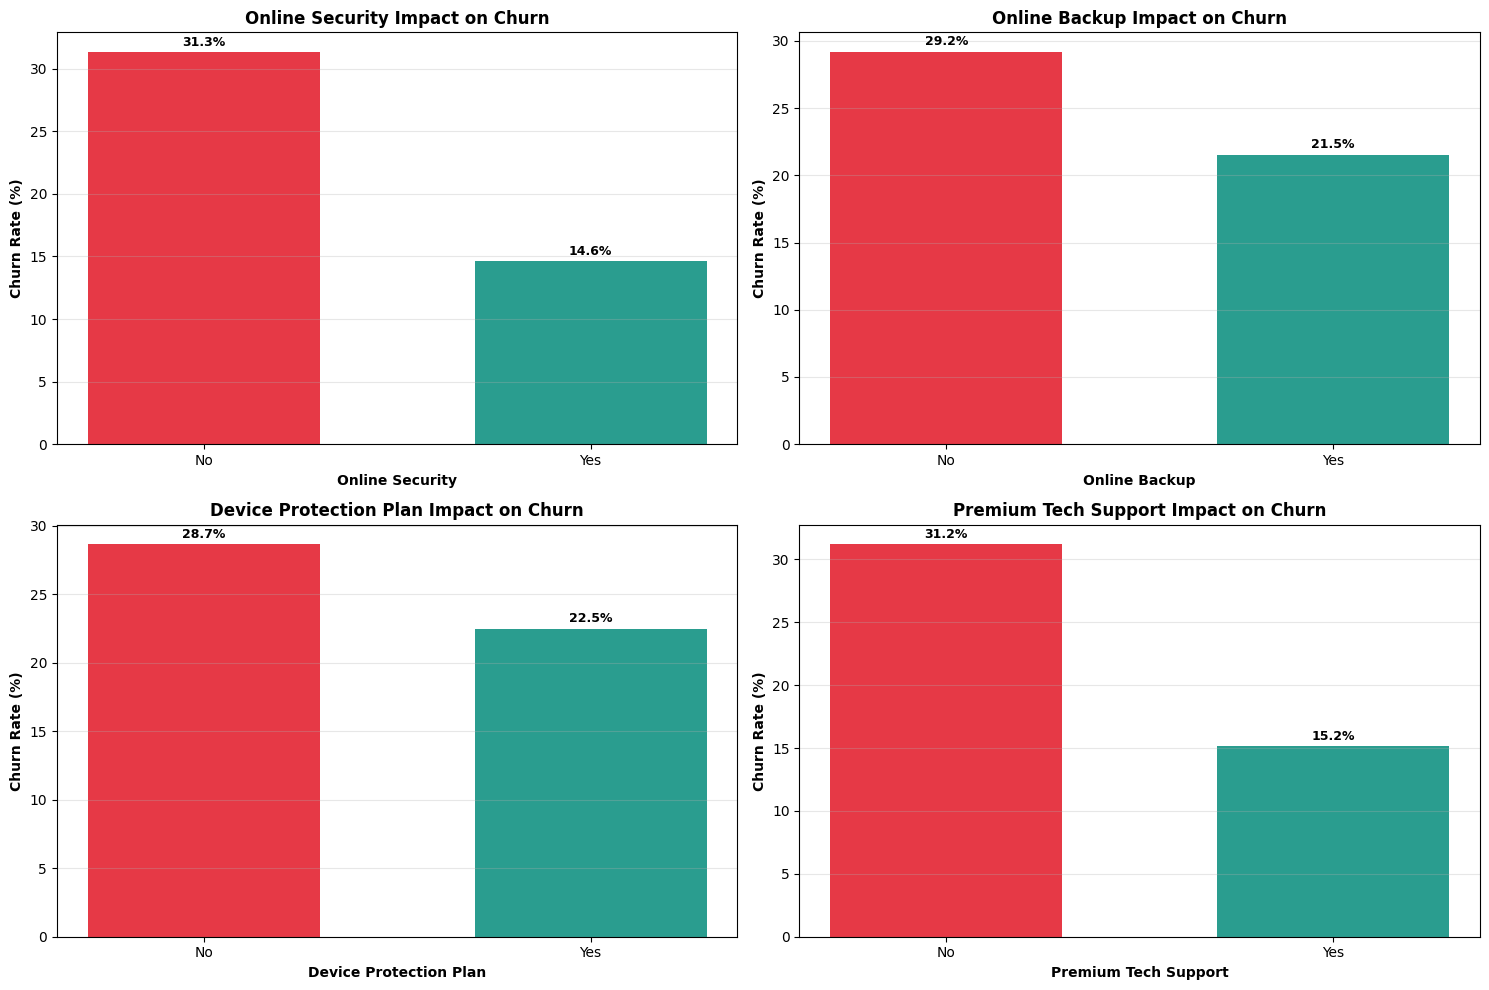


Key Insights:
Most effective single service: Online Security
Churn reduction (with vs without): 16.72 percentage points

Services selected for strong retention bundle (impact > mean): ['Online Security', 'Premium Tech Support']

Churn Rate for Strong Retention Bundle:
shape: (2, 3)
┌──────────────────────┬─────────────────┬────────────┐
│ Strong_Bundle_Active ┆ Total_Customers ┆ Churn_Rate │
│ ---                  ┆ ---             ┆ ---        │
│ bool                 ┆ str             ┆ str        │
╞══════════════════════╪═════════════════╪════════════╡
│ true                 ┆ 1,099           ┆ 9.01%      │
│ false                ┆ 5,944           ┆ 29.78%     │
└──────────────────────┴─────────────────┴────────────┘

Churn among customers WITH strong bundle: 9.01%
Churn among customers WITHOUT strong bundle: 29.78%
Churn reduction for strong bundle customers: 20.77 percentage points

Recommendation:
Design and promote a premium bundle combining the strongest retention services,
a

In [ ]:
security_results = q12_security_support_analysis(df)

## **Demographic Profile Analysis**

**Q15.** Do specific demographic profiles (age, marital status, dependents) show distinct churn patterns?

**Justification:** Different demographic segments have different needs and behaviors.

**Analysis:** Demographic segmentation, churn analysis by age, senior citizen, married, dependents.

In [ ]:
def q15_demographic_profile_analysis(df):
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    print("Q15: Demographic Profile Analysis")

    demographic_churn = (
        df.group_by(['Senior Citizen', 'Gender', 'Married'])
        .agg([
            pl.count('Customer ID').alias('Total_Customers'),
            (
                pl.col('Customer Status')
                .filter(pl.col('Customer Status') == 'Churned')
                .count() / pl.count('Customer ID') * 100
            ).alias('Churn_Rate'),
            pl.col('Tenure in Months').mean().alias('Avg_Tenure'),
            pl.col('CLTV').mean().alias('Avg_CLTV'),
        ])
        .sort('Churn_Rate', descending=True)
    )

    demographic_fmt = demographic_churn.with_columns([
        pl.col("Total_Customers").map_elements(lambda v: f"{v:,d}"),
        pl.col("Churn_Rate").map_elements(lambda v: f"{v:.2f}%"),
        pl.col("Avg_Tenure").map_elements(lambda v: f"{v:.2f}"),
        pl.col("Avg_CLTV").map_elements(lambda v: f"€{v:,.2f}"),
    ])

    print("\nChurn Rate by Demographic Profile (Top 10):")
    print(demographic_fmt.head(10))

    age_dependents = (
        df.group_by(['Senior Citizen', 'Number of Dependents'])
        .agg([
            pl.count('Customer ID').alias('Total_Customers'),
            (
                pl.col('Customer Status')
                .filter(pl.col('Customer Status') == 'Churned')
                .count() / pl.count('Customer ID') * 100
            ).alias('Churn_Rate')
        ])
    )

    age_dependents_fmt = age_dependents.with_columns([
        pl.col("Total_Customers").map_elements(lambda v: f"{v:,d}"),
        pl.col("Churn_Rate").map_elements(lambda v: f"{v:.2f}%"),
    ])

    print("\nChurn Rate by Age and Dependents:")
    print(age_dependents_fmt)

    # -------------------------------------------------
    # 4) VISUALISATION
    # -------------------------------------------------
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

    ax1 = fig.add_subplot(gs[0, 0])
    senior_gender = (
        df.group_by(['Senior Citizen', 'Gender'])
        .agg([
            (
                pl.col('Customer Status')
                .filter(pl.col('Customer Status') == 'Churned')
                .count() / pl.count('Customer ID') * 100
            ).alias('Churn_Rate')
        ])
        .to_pandas()
    )

    # Ensure consistent ordering
    senior_gender['Senior Citizen'] = senior_gender['Senior Citizen'].replace({0: "No", 1: "Yes"})
    senior_gender_pivot = senior_gender.pivot(index='Senior Citizen', columns='Gender', values='Churn_Rate')

    senior_gender_pivot.plot(kind='bar', ax=ax1, color=['#E63946', '#457B9D'])
    ax1.set_xlabel('Senior Citizen Status', fontweight='bold')
    ax1.set_ylabel('Churn Rate (%)', fontweight='bold')
    ax1.set_title('Churn Rate by Age × Gender', fontsize=12, fontweight='bold')
    ax1.legend(title='Gender')
    ax1.grid(axis='y', alpha=0.3)

    ax2 = fig.add_subplot(gs[0, 1])
    married_dependents = (
        df.group_by(['Married', 'Number of Dependents'])
        .agg([
            (
                pl.col('Customer Status')
                .filter(pl.col('Customer Status') == 'Churned')
                .count() / pl.count('Customer ID') * 100
            ).alias('Churn_Rate')
        ])
        .to_pandas()
    )

    married_dependents['Married'] = married_dependents['Married'].replace({0: "No", 1: "Yes"})
    married_dependents_pivot = married_dependents.pivot(index='Married', columns='Number of Dependents', values='Churn_Rate')

    sns.heatmap(
        married_dependents_pivot,
        annot=True,
        fmt=".2f",
        cmap='RdYlGn_r',
        ax=ax2,
        cbar_kws={'label': 'Churn Rate (%)'}
    )
    ax2.set_title('Churn by Marital Status × Dependents', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Number of Dependents', fontweight='bold')
    ax2.set_ylabel('Married', fontweight='bold')


    ax3 = fig.add_subplot(gs[1, :])
    top15 = demographic_churn.head(15).to_pandas()
    top15['Senior Citizen'] = top15['Senior Citizen'].replace({0: "No", 1: "Yes"})
    top15['Profile'] = top15['Senior Citizen'] + " / " + top15['Gender'] + " / " + top15['Married'].astype(str)

    ax3.barh(top15['Profile'], top15['Churn_Rate'], color='#E63946')
    ax3.set_xlabel('Churn Rate (%)', fontweight='bold')
    ax3.set_ylabel('Profile (Senior / Gender / Married)', fontweight='bold')
    ax3.set_title('Top 15 Risk Demographic Profiles', fontsize=12, fontweight='bold')
    ax3.grid(axis='x', alpha=0.3)
    ax3.invert_yaxis()

    plt.savefig(output_path + '/q15_demographic_profile_analysis.png',
                dpi=300, bbox_inches='tight')
    plt.show()

    print("\nKey Insights:")
    highest_risk = demographic_churn.head(1)

    print(
        f"Highest risk profile: Senior={highest_risk['Senior Citizen'][0]}, "
        f"Gender={highest_risk['Gender'][0]}, Married={highest_risk['Married'][0]}"
    )
    print(f"Churn rate: {highest_risk['Churn_Rate'][0]:.2f}%")
    print("Recommendation: Prioritise retention programmes for high-risk demographic segments.")

    return demographic_fmt


Q15: Demographic Profile Analysis

Churn Rate by Demographic Profile (Top 10):
shape: (8, 7)
┌────────────────┬────────┬─────────┬─────────────────┬────────────┬────────────┬───────────┐
│ Senior Citizen ┆ Gender ┆ Married ┆ Total_Customers ┆ Churn_Rate ┆ Avg_Tenure ┆ Avg_CLTV  │
│ ---            ┆ ---    ┆ ---     ┆ ---             ┆ ---        ┆ ---        ┆ ---       │
│ str            ┆ str    ┆ str     ┆ str             ┆ str        ┆ str        ┆ str       │
╞════════════════╪════════╪═════════╪═════════════════╪════════════╪════════════╪═══════════╡
│ Yes            ┆ Female ┆ No      ┆ 320             ┆ 49.69%     ┆ 24.86      ┆ €4,170.88 │
│ Yes            ┆ Male   ┆ No      ┆ 249             ┆ 47.79%     ┆ 25.38      ┆ €4,310.33 │
│ Yes            ┆ Male   ┆ Yes     ┆ 325             ┆ 36.00%     ┆ 40.54      ┆ €4,514.44 │
│ Yes            ┆ Female ┆ Yes     ┆ 248             ┆ 32.66%     ┆ 42.64      ┆ €4,597.85 │
│ No             ┆ Female ┆ No      ┆ 1,480           ┆ 31.15

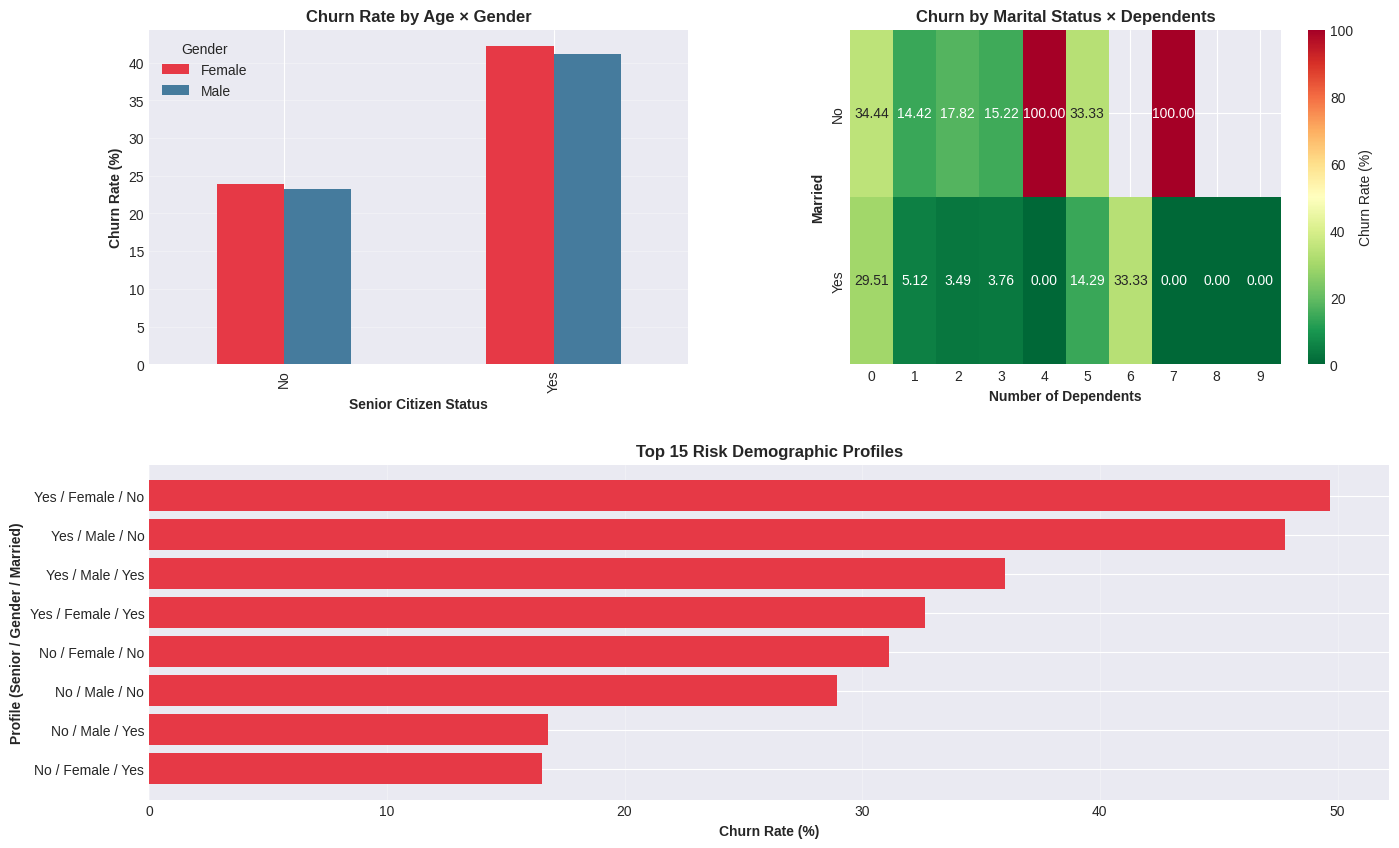


Key Insights:
Highest risk profile: Senior=Yes, Gender=Female, Married=No
Churn rate: 49.69%
Recommendation: Prioritise retention programmes for high-risk demographic segments.


In [ ]:
demographic_results = q15_demographic_profile_analysis(df)

## **Usage and Behavioural Analisys**

**Q20.** Do customers with streaming services (Streaming TV, Movies, Music) behave differently in relation to churn?

**Justification:** Streaming services can increase engagement and dependence on the platform.

**Analysis:** Evaluate how streaming service subscriptions (TV, Movies, Music)
affect customer retention and engagement.

In [ ]:
def q20_streaming_services_analysis(df):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

    print("Q20: Streaming Services Impact on Churn")

    streaming_services = ['Streaming TV', 'Streaming Movies', 'Streaming Music']

    streaming_impact = []
    for service in streaming_services:
        service_churn = (
            df.group_by(service)
            .agg([
                pl.count('Customer ID').alias('Total_Customers'),
                (
                    pl.col('Customer Status')
                    .filter(pl.col('Customer Status') == 'Churned')
                    .count() / pl.count('Customer ID') * 100
                ).alias('Churn_Rate')
            ])
        )

        with_service = service_churn.filter(pl.col(service) == 'Yes')
        without_service = service_churn.filter(pl.col(service) == 'No')

        streaming_impact.append({
            'Service': service,
            'With_Service_Churn': float(with_service['Churn_Rate'][0]) if with_service.height else 0.0,
            'Without_Service_Churn': float(without_service['Churn_Rate'][0]) if without_service.height else 0.0,
            'Impact': float(without_service['Churn_Rate'][0] - with_service['Churn_Rate'][0])
            if with_service.height and without_service.height else 0.0
        })

    streaming_df = pl.DataFrame(streaming_impact)

    # ---- Format for printing ----
    streaming_df_fmt = streaming_df.with_columns([
        pl.col("With_Service_Churn").map_elements(lambda v: f"{v:.2f}%"),
        pl.col("Without_Service_Churn").map_elements(lambda v: f"{v:.2f}%"),
        pl.col("Impact").map_elements(lambda v: f"{v:.2f} pp")
    ])

    print("\nStreaming Services Impact on Churn:")
    print(streaming_df_fmt)

    df_analysis = df.with_columns([
        (
            (pl.col('Streaming TV') == 'Yes').cast(pl.Int8) +
            (pl.col('Streaming Movies') == 'Yes').cast(pl.Int8) +
            (pl.col('Streaming Music') == 'Yes').cast(pl.Int8)
        ).alias('Streaming_Count')
    ])

    streaming_count_churn = (
        df_analysis
        .group_by('Streaming_Count')
        .agg([
            pl.count('Customer ID').alias('Total_Customers'),
            (
                pl.col('Customer Status')
                .filter(pl.col('Customer Status') == 'Churned')
                .count() / pl.count('Customer ID') * 100
            ).alias('Churn_Rate'),
            pl.col('Monthly Charge').mean().alias('Avg_Monthly_Charge'),
            pl.col('CLTV').mean().alias('Avg_CLTV')
        ])
        .sort('Streaming_Count')
    )

    # ---- Format for printing ----
    streaming_count_fmt = streaming_count_churn.with_columns([
        pl.col("Total_Customers").map_elements(lambda v: f"{v:,d}"),
        pl.col("Churn_Rate").map_elements(lambda v: f"{v:.2f}%"),
        pl.col("Avg_Monthly_Charge").map_elements(lambda v: f"€{v:,.2f}"),
        pl.col("Avg_CLTV").map_elements(lambda v: f"€{v:,.2f}")
    ])

    print("\nChurn Rate by Number of Streaming Services:")
    print(streaming_count_fmt)

    # ---------------------------------------------
    # 3) VISUALISATION
    # ---------------------------------------------
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()

    # Plot 1 – With vs Without comparison
    streaming_data = streaming_df.to_pandas()
    x = np.arange(len(streaming_data))
    width = 0.35

    axes[0].bar(
        x - width/2,
        streaming_data['With_Service_Churn'],
        width,
        label='With Service',
        color='#2A9D8F'
    )
    axes[0].bar(
        x + width/2,
        streaming_data['Without_Service_Churn'],
        width,
        label='Without Service',
        color='#E63946'
    )
    axes[0].set_xticks(x)
    axes[0].set_xticklabels([s.replace('Streaming ', '') for s in streaming_data['Service']])
    axes[0].set_title('Churn Rate: With vs Without Streaming Services', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Streaming Service', fontweight='bold')
    axes[0].set_ylabel('Churn Rate (%)', fontweight='bold')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)

    # Add labels
    for i, row in streaming_data.iterrows():
        axes[0].text(i - width/2, row['With_Service_Churn'] + 0.4, f"{row['With_Service_Churn']:.1f}%",
                     ha='center', fontsize=9)
        axes[0].text(i + width/2, row['Without_Service_Churn'] + 0.4, f"{row['Without_Service_Churn']:.1f}%",
                     ha='center', fontsize=9)

    # Plot 2 – Impact barh
    axes[1].barh(streaming_data['Service'], streaming_data['Impact'], color='#457B9D')
    axes[1].set_title('Churn Reduction Impact by Service', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Churn Reduction (pp)', fontweight='bold')
    axes[1].set_ylabel('Service', fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)

    # Add labels
    for i, row in streaming_data.iterrows():
        axes[1].text(row['Impact'] + 0.1, row['Service'], f"{row['Impact']:.2f} pp",
                     va='center', fontsize=9, fontweight='bold')

    # Plot 3 – Churn rate by count
    count_data = streaming_count_churn.to_pandas()
    axes[2].plot(
        count_data['Streaming_Count'],
        count_data['Churn_Rate'],
        marker='o',
        linewidth=2,
        markersize=10,
        color='#E63946'
    )
    axes[2].set_title('Churn Rate by Number of Streaming Services', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('Number of Streaming Services', fontweight='bold')
    axes[2].set_ylabel('Churn Rate (%)', fontweight='bold')
    axes[2].grid(True, alpha=0.3)

    # Plot 4 – CLTV by count
    axes[3].bar(
        count_data['Streaming_Count'],
        count_data['Avg_CLTV'],
        color='#2A9D8F'
    )
    axes[3].set_title('Customer Lifetime Value by Number of Streaming Services', fontsize=12, fontweight='bold')
    axes[3].set_xlabel('Number of Streaming Services', fontweight='bold')
    axes[3].set_ylabel('Average CLTV (€)', fontweight='bold')
    axes[3].grid(axis='y', alpha=0.3)

    # Add CLTV labels
    for i, v in enumerate(count_data['Avg_CLTV']):
        axes[3].text(count_data['Streaming_Count'][i], v + (v * 0.01), f"€{v:,.0f}",
                     ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    os.makedirs(output_path, exist_ok=True)
    plt.savefig(os.path.join(output_path, 'q20_streaming_services_analysis.png'),
                dpi=300, bbox_inches='tight')
    plt.show()

    print("\nKey Insights:")
    best_service = streaming_data.loc[streaming_data['Impact'].idxmax()]
    print(f"Most effective service: {best_service['Service']} (reduces churn by {best_service['Impact']:.2f} pp)")

    if 0 in count_data['Streaming_Count'].values:
        churn0 = float(count_data.loc[count_data['Streaming_Count'] == 0, 'Churn_Rate'])
        print(f"Churn with 0 streaming services: {churn0:.2f}%")

    if 3 in count_data['Streaming_Count'].values:
        churn3 = float(count_data.loc[count_data['Streaming_Count'] == 3, 'Churn_Rate'])
        print(f"Churn with 3 streaming services: {churn3:.2f}%")

    print("Recommendation: Bundle streaming services to increase engagement and reduce churn.")

    return streaming_df_fmt, streaming_count_fmt



Q20: Streaming Services Impact on Churn

Streaming Services Impact on Churn:
shape: (3, 4)
┌──────────────────┬────────────────────┬───────────────────────┬──────────┐
│ Service          ┆ With_Service_Churn ┆ Without_Service_Churn ┆ Impact   │
│ ---              ┆ ---                ┆ ---                   ┆ ---      │
│ str              ┆ str                ┆ str                   ┆ str      │
╞══════════════════╪════════════════════╪═══════════════════════╪══════════╡
│ Streaming TV     ┆ 30.07%             ┆ 24.33%                ┆ -5.74 pp │
│ Streaming Movies ┆ 29.94%             ┆ 24.38%                ┆ -5.56 pp │
│ Streaming Music  ┆ 29.26%             ┆ 25.05%                ┆ -4.21 pp │
└──────────────────┴────────────────────┴───────────────────────┴──────────┘

Churn Rate by Number of Streaming Services:
shape: (4, 5)
┌─────────────────┬─────────────────┬────────────┬────────────────────┬───────────┐
│ Streaming_Count ┆ Total_Customers ┆ Churn_Rate ┆ Avg_Monthly_Charge ┆ A

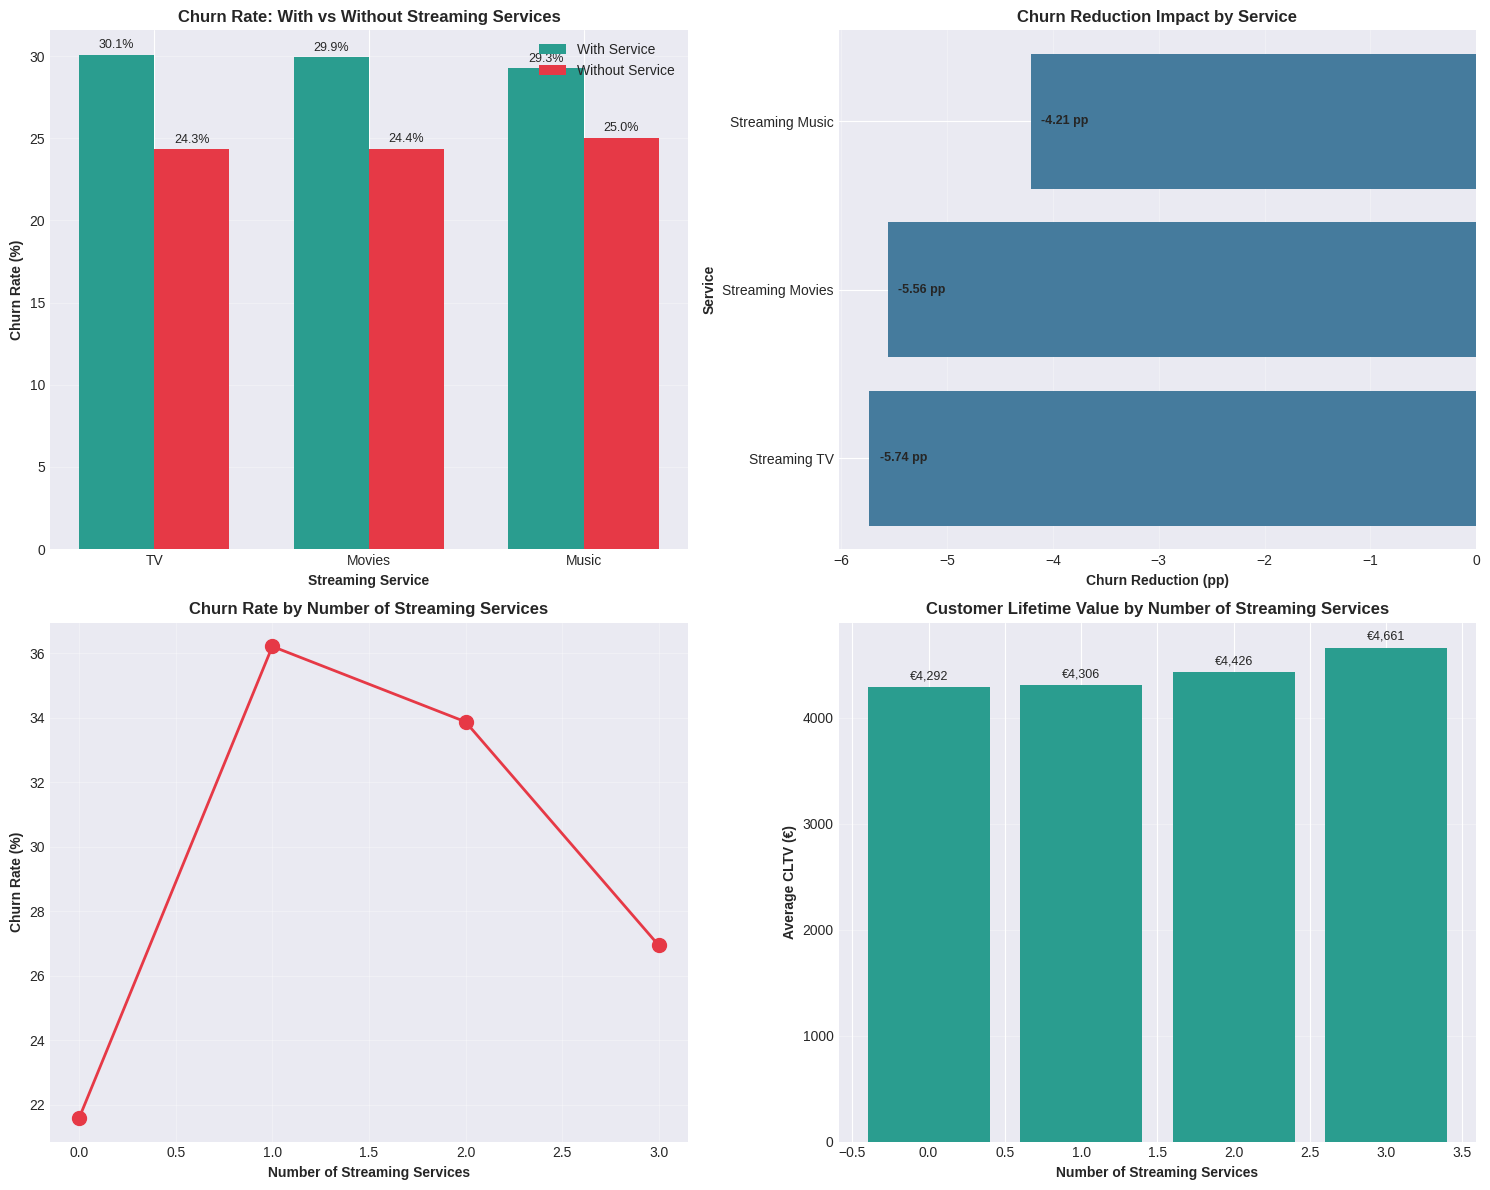


Key Insights:
Most effective service: Streaming Music (reduces churn by -4.21 pp)
Churn with 0 streaming services: 21.60%
Churn with 3 streaming services: 26.95%
Recommendation: Bundle streaming services to increase engagement and reduce churn.


In [ ]:
streaming_impact, streaming_count = q20_streaming_services_analysis(df)

#3. FEATURE ENGINEERING

**3.1 - Creating Composite Features**

Based on our project goals and the data analysis from previous sections, we will now create the following composite features.

3.1.1 - Customer Longevity Ratio  
3.1.2 - Average Monthly Spend  
3.1.3 - Service Bundle Complexity Index  
3.1.4 - Revenue per Service  
3.1.5 - Has Dependents (binary)  
3.1.6 - Is Heavy User (based on data download)  
3.1.7 - CLTV per Month  
3.1.8 - Has Premium Services  
3.1.9 - Streaming Services Count  
3.1.10 - Contract Value (encoding contract types)    
3.1.11 - Customer Engagement Score (composite)  
3.1.12 - Population Density Category  

  
The code provides detailed information about each feature, including the formula used to calculate each one.

In [ ]:
print("\n3.1. Creating new features...\n")
df_fe = df.clone()

#3.1.1 - Customer Longevity Ratio
df_fe = df_fe.with_columns(
    (pl.col("Tenure in Months") / pl.col("Age")).alias("Longevity_Ratio")
)

print("** Longevity_Ratio (Tenure / Age): Done ** ")

#3.1.2 - Average Monthly Spend
df_fe = df_fe.with_columns(
    (pl.col("Total Revenue") / (pl.col("Tenure in Months") + 1))
    .alias("Avg_Monthly_Spend")
)

print("** Avg_Monthly_Spend (Total Revenue / Tenure): Done ** ")

# 3.1.3 - Service Bundle Complexity Index
service_cols = [
    "Phone Service", "Internet Service", "Online Security", "Online Backup",
    "Device Protection Plan", "Premium Tech Support", "Streaming TV",
    "Streaming Movies", "Streaming Music", "Unlimited Data"
]

df_fe = df_fe.with_columns(
    pl.sum_horizontal([
        (pl.col(c) == "Yes").cast(pl.Int8) for c in service_cols
    ]).alias("Service_Bundle_Count")
)

print("** Service_Bundle_Count (Number of services subscribed): Done ** ")

# 3.1.4 - Revenue per Service
df_fe = df_fe.with_columns(
    (pl.col("Total Revenue") / (pl.col("Service_Bundle_Count") + 1))
    .alias("Revenue_per_Service")
)

print("** Revenue_per_Service (Total Revenue / Service Count): Done ** ")

# 3.1.5 - Has Dependents (binary)
df_fe = df_fe.with_columns(
    (pl.col("Number of Dependents") > 0)
    .cast(pl.Int8)
    .alias("Has_Dependents")
)

print("** Has_Dependents (Binary indicator): Done ** ")

# 3.1.6 - Is an Heavy User (based on data download)
median_download = df_fe.select(pl.col("Avg Monthly GB Download").median()).item()

df_fe = df_fe.with_columns(
    (pl.col("Avg Monthly GB Download") > median_download)
    .cast(pl.Int8)
    .alias("Is_Heavy_User")
)

print("** Is_Heavy_User (Above median data usage): Done ** ")

# 3.1.7 - CLTV per Month
"""
Customer Lifetime Value (CLTV) represents the total revenue (or profit)
a company expects to earn from a customer per month
"""
df_fe = df_fe.with_columns(
    (pl.col("CLTV") / (pl.col("Tenure in Months") + 1))
    .alias("CLTV_per_Month")
)

print("** CLTV_per_Month (CLTV / Tenure): Done ** ")

# 3.1.8 - Has Premium Services
premium_services = [
    "Online Security", "Online Backup",
    "Device Protection Plan", "Premium Tech Support"
]

df_fe = df_fe.with_columns(
    pl.any_horizontal([
        (pl.col(c) == "Yes") for c in premium_services
    ]).cast(pl.Int8).alias("Has_Premium_Services")
)

print("** Has_Premium_Services (Any premium service): Done ** ")

# 3.1.9 - Streaming Services Count
streaming_cols = ["Streaming TV", "Streaming Movies", "Streaming Music"]

df_fe = df_fe.with_columns(
    pl.sum_horizontal([
        (pl.col(c) == "Yes").cast(pl.Int8) for c in streaming_cols
    ]).alias("Streaming_Count")
)

print("** Streaming_Count (Number of streaming services): Done ** ")

# 3.1.10 - Contract Value (encoding contract types)
contract_value_map = {"Month-to-Month": 1, "One Year": 12, "Two Year": 24}

df_fe = df_fe.with_columns(
    pl.col("Contract")
    .replace(contract_value_map)
    .cast(pl.Int8)
    .alias("Contract_Value")
)

print("** Contract Value (encoding contract types): Done ** ")

# 3.1.11 - Customer Engagement Score (a kind of fidelization score)
tenure_max = df_fe.select(pl.col("Tenure in Months").max()).item()
referrals_max = df_fe.select(pl.col("Number of Referrals").max()).item()
services_max = df_fe.select(pl.col("Service_Bundle_Count").max()).item()
contract_max  = df_fe.select(pl.col("Contract_Value").max()).item()

df_fe = df_fe.with_columns(
    (
        (pl.col("Tenure in Months") / tenure_max) * 0.3 +
        (pl.col("Number of Referrals") / (referrals_max + 1)) * 0.2 +
        (pl.col("Service_Bundle_Count") / services_max) * 0.3 +
        (pl.col("Contract_Value") / contract_max)       * 0.2
    ).alias("Engagement_Score")
)

print("** Customer Engagement Score: Done ** ")

# 3.1.12 - Population Density Category
df_fe = df_fe.with_columns(
    pl.when((pl.col("Population") > 0) & (pl.col("Population") <= 30_000)).then(pl.lit("Low"))
     .when((pl.col("Population") > 30_000) & (pl.col("Population") <= 50_000)).then(pl.lit("Medium"))
     .when((pl.col("Population") > 50_000) & (pl.col("Population") <= 100_000)).then(pl.lit("High"))
     .otherwise(pl.lit(None))
     .cast(pl.Utf8)  # or .cast(pl.Categorical)
     .alias("Population_Density")
)

print("** Population_Density (Categorical): Done ** ")

#Save dataset with new features
print("\nSaving dataset with new features...\n")
df_fe.write_csv(output_path + "telco_churn_features.csv")

print(f"Dataset with new feature saved to: {output_path}telco_churn_features.csv")




3.1. Creating new features...

** Longevity_Ratio (Tenure / Age): Done ** 
** Avg_Monthly_Spend (Total Revenue / Tenure): Done ** 
** Service_Bundle_Count (Number of services subscribed): Done ** 
** Revenue_per_Service (Total Revenue / Service Count): Done ** 
** Has_Dependents (Binary indicator): Done ** 
** Is_Heavy_User (Above median data usage): Done ** 
** CLTV_per_Month (CLTV / Tenure): Done ** 
** Has_Premium_Services (Any premium service): Done ** 
** Streaming_Count (Number of streaming services): Done ** 
** Contract Value (encoding contract types): Done ** 
** Customer Engagement Score: Done ** 
** Population_Density (Categorical): Done ** 

Saving dataset with new features...

Dataset with new feature saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/telco_churn_features.csv


**3.2. Feature importance preview (correlation with churn)**


In [ ]:
print("\n3.2. New Features Correlation with Churn...\n")

new_features = [
    "Longevity_Ratio", "Avg_Monthly_Spend", "Service_Bundle_Count",
    "Revenue_per_Service", "CLTV_per_Month", "Engagement_Score", "Contract_Value"
]

df_fe = df_fe.with_columns(
    (pl.col("Churn Label") == "Yes").cast(pl.Int8).alias("Churn_Binary")
)

corr_row = df_fe.select([
    pl.corr(pl.col(feat), pl.col("Churn_Binary"), method="spearman")

    for feat in new_features
])

corr_with_churn = (
    corr_row
    .melt(variable_name="Feature", value_name="Correlation")
    .sort("Correlation", descending=True)
)

corr_fmt = corr_with_churn.with_columns([
    pl.col("Correlation").map_elements(lambda v: f"{v:.4f}")
])

print("\nCorrelation with Churn (sorted):\n")
print(corr_fmt)




3.2. New Features Correlation with Churn...


Correlation with Churn (sorted):

shape: (7, 2)
┌──────────────────────┬─────────────┐
│ Feature              ┆ Correlation │
│ ---                  ┆ ---         │
│ str                  ┆ str         │
╞══════════════════════╪═════════════╡
│ CLTV_per_Month       ┆ 0.3397      │
│ Avg_Monthly_Spend    ┆ 0.0380      │
│ Service_Bundle_Count ┆ 0.0087      │
│ Revenue_per_Service  ┆ -0.3361     │
│ Longevity_Ratio      ┆ -0.3792     │
│ Engagement_Score     ┆ -0.3797     │
│ Contract_Value       ┆ -0.4453     │
└──────────────────────┴─────────────┘


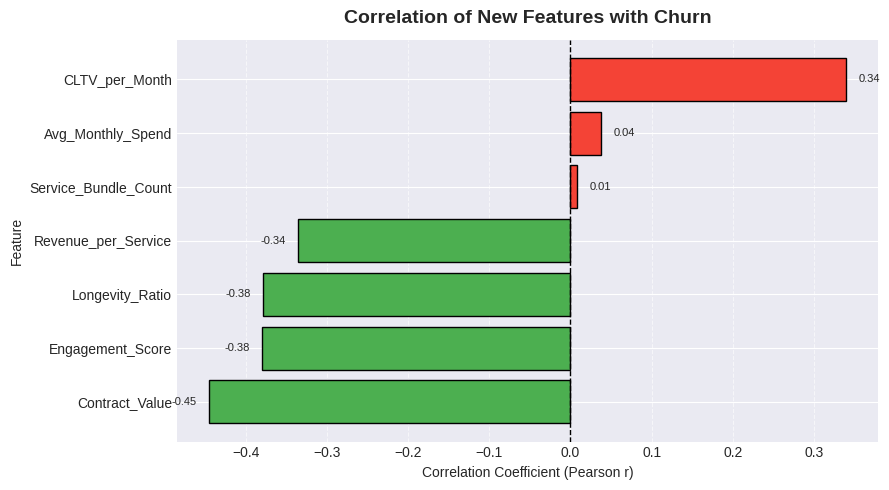

In [ ]:
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

corr_pd = corr_with_churn.to_pandas().sort_values("Correlation", ascending=True)

colors = np.where(corr_pd["Correlation"] < 0, "#4CAF50", "#F44336")

# --- Plot ---
plt.figure(figsize=(9, 5))
bars = plt.barh(
    corr_pd["Feature"],          # <-- HERE
    corr_pd["Correlation"],
    color=colors,
    edgecolor="black"
)

plt.title("Correlation of New Features with Churn", fontsize=14, weight="bold", pad=12)
plt.xlabel("Correlation Coefficient (Pearson r)", fontsize=10)
plt.ylabel("Feature", fontsize=10)
plt.axvline(0, color="black", linestyle="--", linewidth=1)

# Annotate bars with correlation values
for bar, value in zip(bars, corr_pd["Correlation"]):
    plt.text(
        value + (0.015 if value >= 0 else -0.015),
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}",
        va="center",
        ha="left" if value >= 0 else "right",
        fontsize=8
    )

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



The correlation table gives a clear quantitative view of how each engineered feature relates to churn probability. Lets try to explain each one with a little more detail:  

**CLTV_per_Month (0.34):** Positive and moderate — customers generating higher lifetime value per month tend to churn slightly more. This may indicate that some high-value customers are price-sensitive or expect premium service quality; when disappointed, they leave.  

**Avg_Monthly_Spend (0.04):** Almost neutral — spending alone doesn’t explain churn. Customers paying more aren’t necessarily more or less likely to churn.

**Service_Bundle_Count (0.01):** Essentially no relationship — the number of subscribed services doesn’t predict churn, suggesting customers churn regardless of how many services they have.

**Revenue_per_Service (-0.34)**: Moderate negative — customers who derive more revenue per service are less likely to churn. This could reflect better perceived value or usage intensity.  

**Longevity_Ratio (-0.38):** Moderate negative — customers whose tenure relative to age is higher are more loyal. This makes sense: longer relationships imply higher retention.  

**Engagement_Score (-0.38)**: Moderately negative relationship — highly engaged customers, who stay longer and use more services, show a much lower churn tendency.

**Contract_Value (-0.45):** Strong negative — the longer the contract (one-year/two-year), the lower the churn. This is a key business insight: long-term contracts are an effective retention mechanism.  


# **Major Insights**

**1. Engagement_Score** and **Contract_Value** are the most powerful anti-churn indicators. They should feature prominently in any churn prediction model.  

**2. CLTV_per_Month** shows an interesting positive correlation: some high-value customers are at higher churn risk. These customers may be “attractive defectors” and they should be the target for proactive retention strategies.  

**3.** The weak correlations for **Avg_Monthly_Spend** and **Service_Bundle_Count** indicate that volume alone doesnt drive loyalty.

**4. Longevity_Ratio** and **Revenue_per_Service** add moderate explanatory power and complement the stronger features.

# **Costumer Strategy**

**Customer segmentation:** Target high CLTV, high spend, but low engagement customers with personalized retention actions.

**Contract strategy:** Encourage upgrades from monthly to annual contracts; it has measurable impact on churn.

**Predictive modeling:** Keep Engagement_Score and Contract_Value as key predictors; consider interaction terms with CLTV for richer insights.




# 4. PREDICTIVE MODELLING

As prediction models, and because our dataset is not very big (only 7.043 observations) we choose to start by use the following models:

*   Logistic Regression;
*   Random Forrest, and;
*   XGBoost

These three models represent a balanced and complementary set of algorithms that are widely established in churn prediction and customer analytics.

**Logistic Regression:** It will be used as baseline, offering clear coefficient-based insights and robust performance on linearly separable structures.  

**Random Forest:** Introduces non-linear modelling capacity and feature interaction, allowing the detection of complex behavioural patterns that linear models may miss.  

**XGBoost:** Extends this further with gradient boosting, which is recognised as one of the most effective techniques for tabular business data, providing superior accuracy, strong calibration, and compatibility with TreeSHAP for explainability.  

Together, these three models cover the main modelling paradigms used in industry for churn prediction—linear, bagging, and boosting—ensuring a rigorous comparison and a defensible model selection process.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import recall_score, f1_score, precision_score, precision_recall_curve

print("\n4.1 - Preparing data for modeling...\n")

# Define categorical and numerical features
categorical_features = [
    "Gender", "Senior Citizen", "Married", "Dependents",
    "Contract", "Paperless Billing", "Payment Method",
    "Internet Type", "Phone Service", "Multiple Lines",
    "Online Security", "Online Backup", "Device Protection Plan",
    "Premium Tech Support", "Streaming TV", "Streaming Movies",
    "Streaming Music", "Unlimited Data"
]

numerical_features = [
    "Age", "Number of Dependents", "Tenure in Months",
    "Monthly Charge", "CLTV", "Number of Referrals", "Avg Monthly GB Download",
    "Population", "Longevity_Ratio", "Avg_Monthly_Spend",
    "Service_Bundle_Count", "Revenue_per_Service",
    "Engagement_Score", "Contract_Value", "Streaming_Count"
]

# Check for possible missing_cols in df_fe
missing_cols = [col for col in categorical_features + numerical_features if col not in df_fe.columns]
if missing_cols:
    print(f"Missing columns in dataset: {missing_cols}")
else:
    print("All modeling feature columns verified in DataFrame.")

# Create a clean dataset for modeling
df_model = df_fe.clone()

print("\nHandling missing values...\n")

# Fill numeric null values with column median
for col in numerical_features:
    median_val = df_model.select(pl.col(col).median()).item()
    df_model = df_model.with_columns(
        pl.col(col).fill_null(median_val)
    )

# Fill categorical columns with their mode (most frequent value)
for col in categorical_features:
    mode_val = (
        df_model.select(pl.col(col).mode().first())
        .to_series()[0]
        if df_model.select(pl.col(col).is_not_null().sum()).item() > 0
        else None
    )
    if mode_val is not None:
        df_model = df_model.with_columns(
            pl.col(col).fill_null(mode_val)
        )

print("Missing values handled (median for numeric, mode for categorical).\n")

print("Encoding categorical variables...\n")

for col in categorical_features:
    unique_vals = df_model.select(pl.col(col).unique()).to_series().to_list()
    mapping = {val: idx for idx, val in enumerate(sorted(unique_vals))}

    df_model = df_model.with_columns(
        pl.col(col).replace(mapping).cast(pl.Int32).alias(col + "_encoded")
    )

print("Categorical variables encoded as numeric codes.\n")

print(f"Dataframe with results is df_model.\n")



4.1 - Preparing data for modeling...

All modeling feature columns verified in DataFrame.

Handling missing values...

Missing values handled (median for numeric, mode for categorical).

Encoding categorical variables...

Categorical variables encoded as numeric codes.

Dataframe with results is df_model.



In [ ]:
# -- Dataframe df_model has all the variables and encoded variables that are needed for models
display(df_model)

Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,…,CLTV,Churn Category,Churn Reason,Population,Age_Group,Tenure_Group,Longevity_Ratio,Avg_Monthly_Spend,Service_Bundle_Count,Revenue_per_Service,Has_Dependents,Is_Heavy_User,CLTV_per_Month,Has_Premium_Services,Streaming_Count,Contract_Value,Engagement_Score,Population_Density,Churn_Binary,Gender_encoded,Senior Citizen_encoded,Married_encoded,Dependents_encoded,Contract_encoded,Paperless Billing_encoded,Payment Method_encoded,Internet Type_encoded,Phone Service_encoded,Multiple Lines_encoded,Online Security_encoded,Online Backup_encoded,Device Protection Plan_encoded,Premium Tech Support_encoded,Streaming TV_encoded,Streaming Movies_encoded,Streaming Music_encoded,Unlimited Data_encoded
str,i64,str,f64,str,str,str,str,f64,str,str,str,i64,str,f64,f64,str,str,f64,f64,str,str,f64,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,…,f64,str,str,f64,str,str,f64,f64,f64,f64,i8,i8,f64,i8,f64,f64,f64,str,i8,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
"""8779-QRDMV""",1,"""Male""",78.0,"""No""","""Yes""","""No""","""No""",0.0,"""United States""","""California""","""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582,"""Q3""","""No""",0.0,1.0,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",8.0,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""No""","""No""","""Month-to-Month""","""Yes""",…,5433.0,"""Competitor""","""Competitor offered more data""",68701.0,"""65+""","""0-12m""",0.012821,29.825,3.0,14.9125,0,0,2716.5,1,1.0,1.0,0.1025,"""High""",1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
"""7495-OOKFY""",1,"""Female""",74.0,"""No""","""Yes""","""Yes""","""Yes""",1.0,"""United States""","""California""","""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237,"""Q3""","""Yes""",1.0,8.0,"""Offer E""","""Yes""",48.85,"""Yes""","""Yes""","""Fiber Optic""",17.0,"""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""",…,5302.0,"""Competitor""","""Competitor made better offer""",55668.0,"""65+""","""0-12m""",0.108108,113.788889,4.0,204.82,1,0,589.111111,1,0.0,1.0,0.178333,"""High""",1,0,1,1,1,0,1,1,2,1,1,0,1,0,0,0,0,0,1
"""1658-BYGOY""",1,"""Male""",71.0,"""No""","""Yes""","""No""","""Yes""",3.0,"""United States""","""California""","""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715,"""Q3""","""No""",0.0,18.0,"""Offer D""","""Yes""",11.33,"""Yes""","""Yes""","""Fiber Optic""",52.0,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""",…,3179.0,"""Competitor""","""Competitor made better offer""",47534.0,"""65+""","""12-24m""",0.253521,100.572632,6.0,272.982857,1,1,167.315789,0,3.0,1.0,0.263333,"""Medium""",1,1,1,0,1,0,1,0,2,1,1,0,0,0,0,1,1,1,1
"""4598-XLKNJ""",1,"""Female""",78.0,"""No""","""Yes""","""Yes""","""Yes""",1.0,"""United States""","""California""","""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639,"""Q3""","""Yes""",1.0,25.0,"""Offer C""","""Yes""",19.76,"""No""","""Yes""","""Fiber Optic""",12.0,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Month-to-Month""","""Yes""",…,5337.0,"""Dissatisfaction""","""Limited range of services""",27778.0,"""65+""","""24-48m""",0.320513,115.195,7.0,374.38375,1,0,205.269231,1,2.0,1.0,0.339167,"""Low""",1,0,1,1,1,0,1,0,2,1,0,0,1,1,0,1,1,0,1
"""4846-WHAFZ""",1,"""Female""",80.0,"""No""","""Yes""","""Yes""","""Yes""",1.0,"""United States""","""California""","""Whittier"

In [ ]:
print("\n4.2 - Preparing feature matrix and target...\n")

encoded_categorical = [col + "_encoded" for col in categorical_features]

X = df_model.select(numerical_features + encoded_categorical)
y = df_model.select("Churn_Binary")

print(f"  - Feature matrix shape: {X.shape}")

# Convert to pandas for sklearn and compute distribution
X_pd = X.to_pandas()
y_pd = y.to_pandas().squeeze()   # single-column DF -> Series
print(f"  - Target distribution: {y_pd.value_counts().to_dict()}")

print("\nSplitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X_pd, y_pd, test_size=0.2, random_state=42, stratify=y_pd
)
print(f"  - Training set: {X_train.shape}")
print(f"  - Test set: {X_test.shape}")

print("\nScaling numerical features...")
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print("\nNumerical features scaled and data ready for modeling.\n")



4.2 - Preparing feature matrix and target...

  - Feature matrix shape: (7043, 33)
  - Target distribution: {0: 5174, 1: 1869}

Splitting data into train and test sets...
  - Training set: (5634, 33)
  - Test set: (1409, 33)

Scaling numerical features...

Numerical features scaled and data ready for modeling.



In [ ]:
print("\n4.3. Training predictive models...")

models = {}
predictions = {}
probabilities = {}

print("\n  Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)
models['Logistic Regression'] = lr_model
predictions['Logistic Regression'] = lr_model.predict(X_test_scaled)
probabilities['Logistic Regression'] = lr_model.predict_proba(X_test_scaled)[:, 1]
print("\n  Logistic Regression trained")



4.3. Training predictive models...

  Training Logistic Regression...

  Logistic Regression trained


In [ ]:
print("\n  Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train, y_train)
models['Random Forest'] = rf_model
predictions['Random Forest'] = rf_model.predict(X_test)
probabilities['Random Forest'] = rf_model.predict_proba(X_test)[:, 1]
print("\n  Random Forest trained")


  Training Random Forest...

  Random Forest trained


In [ ]:
print("\n  Training XGBoost...")
# Calculate scale_pos_weight for imbalanced data
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_model = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=scale_pos_weight,
                         learning_rate=0.1, max_depth=5, n_jobs=-1)
xgb_model.fit(X_train, y_train)
models['XGBoost'] = xgb_model
predictions['XGBoost'] = xgb_model.predict(X_test)
probabilities['XGBoost'] = xgb_model.predict_proba(X_test)[:, 1]
print("\n  XGBoost trained")


  Training XGBoost...

  XGBoost trained


#5. MODEL's EVALUATION

For the churn project, the recall level is extremely important. Recall measures how many true churners our models can detect. The higher, the better.

False negatives (missed churners) are usually expensive because we lose customers who can be maintained with low-cost targeted actions. False positives (flagging non-churners) are less damaging, but still costly because we target and spend resources on customers who don't intend to leave us.  

Based on that we explicitly had a **target Recall >= 0.80** as the core metric to evaluate our three models.


In [ ]:
print("\n5.1. Model Performance Comparison...")

results = []
for model_name in models.keys():
    y_pred = predictions[model_name]
    y_prob = probabilities[model_name]

    # Calculate metrics
    accuracy = (y_pred == y_test).mean()
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

    print(f"\n{model_name}:")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - Precision: {precision:.4f}")
    print(f"  - Recall: {recall:.4f} {'MEETS TARGET (>0.80)' if recall > 0.80 else 'Below target'}")
    print(f"  - F1-Score: {f1:.4f}")
    print(f"  - ROC-AUC: {roc_auc:.4f}")

# Create results DataFrame (Polars)
results_df = pl.DataFrame(results)

# Save to CSV
results_df.write_csv(output_path + "model_comparison.csv")
print(f"\nModel comparison saved: {output_path}model_comparison.csv")



5.1. Model Performance Comparison...

Logistic Regression:
  - Accuracy: 0.7970
  - Precision: 0.5789
  - Recall: 0.8636 MEETS TARGET (>0.80)
  - F1-Score: 0.6931
  - ROC-AUC: 0.9046

Random Forest:
  - Accuracy: 0.8432
  - Precision: 0.7629
  - Recall: 0.5936 Below target
  - F1-Score: 0.6677
  - ROC-AUC: 0.9025

XGBoost:
  - Accuracy: 0.8176
  - Precision: 0.6177
  - Recall: 0.8209 MEETS TARGET (>0.80)
  - F1-Score: 0.7049
  - ROC-AUC: 0.9106

Model comparison saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/model_comparison.csv


**Model Performance Analisys**

Looking at the numbers above we can constact the Random Forest is below target Recal constraint. Logistic Regression has the best recall, but the recall of XGBoost is still above threshold and comes with better balancing of all the other metrics.

Looking at the numbers above, we can conclude that the Random Forest is below our imposed **Target Recall constraint**. Logistic Regression has the best recall, but XGBoost's recall is still above the threshold and this model provides better balance across all the other metrics. In fact, although Logistic Regression delivered the highest Recall, it did so with noticeably lower Precision, resulting in a weaker F1-Score and an increased risk of false positives. In contrast, XGBoost achieved the best overall balance between Precision and Recall (F1-Score = 0.7049) and delivered the strongest ranking performance (ROC-AUC = 0.9106), indicating superior discrimination between churners and non-churners.

This indicates that **XGBoost it is more capable of separating churners from non-churners across thresholds**.

On top of that XGBoost usually is the best choice for churn because:

*   Handles non-linearities and interactions exceptionally well
*   Handles imbalanced datasets better with scale_pos_weight
*   Is less sensitive to outliers than logistic regression
*   Due to regularization is less prone to overfitting than Random Forest


**Thresholds Optimization**

To refine model selection beyond default classifier behavior, all three models were evaluated under optimal threshold tuning conditions. Two criteria were applied:


*   The threshold that maximizes the F1-score, and;
*   The optimal threshold that preserves the business requirement of achieving Recall ≥ 0.80.

Logistic Regression reached the recall target but required an aggressive reduction in the decision threshold, which significantly lowered precision and resulted in a weaker balance between false positives and false negatives. Random Forest could not achieve the required recall level without collapsing overall performance, confirming its unsuitability for our use case.


In [ ]:
print("\n5.2. Optimal Thresholds per Model (with Recall>=0.80 constraint)...")

threshold_results = []

TARGET_RECALL = 0.80

for model_name in models.keys():
    y_prob = probabilities[model_name]

    # PR curve
    prec, rec, thr = precision_recall_curve(y_test, y_prob)
    # Align with thresholds array length (n_thresholds = n_points - 1)
    prec_t = prec[:-1]
    rec_t  = rec[:-1]
    thr_t  = thr

    f1_t = 2 * (prec_t * rec_t) / (prec_t + rec_t + 1e-12)

    # --- Best F1 overall (may hurt recall) ---
    best_f1_idx = f1_t.argmax()
    best_f1_thr = thr_t[best_f1_idx]

    y_pred_f1 = (y_prob >= best_f1_thr).astype(int)
    acc_f1 = (y_pred_f1 == y_test).mean()
    prec_f1 = precision_score(y_test, y_pred_f1)
    rec_f1  = recall_score(y_test, y_pred_f1)
    f1_best = f1_score(y_test, y_pred_f1)
    roc_auc = roc_auc_score(y_test, y_prob)

    # --- Best threshold with Recall >= TARGET_RECALL (maximize F1 under constraint) ---
    mask = rec_t >= TARGET_RECALL
    if mask.any():
        idx_c = np.argmax(f1_t[mask])
        best_c_thr = thr_t[mask][idx_c]
        y_pred_c = (y_prob >= best_c_thr).astype(int)
        acc_c = (y_pred_c == y_test).mean()
        prec_c = precision_score(y_test, y_pred_c)
        rec_c  = recall_score(y_test, y_pred_c)
        f1_c   = f1_score(y_test, y_pred_c)
    else:
        # If model cannot reach the recall target at any threshold, fall back to max recall
        max_rec_idx = rec_t.argmax()
        best_c_thr = thr_t[max_rec_idx]
        y_pred_c = (y_prob >= best_c_thr).astype(int)
        acc_c = (y_pred_c == y_test).mean()
        prec_c = precision_score(y_test, y_pred_c)
        rec_c  = recall_score(y_test, y_pred_c)
        f1_c   = f1_score(y_test, y_pred_c)

    print(f"\n{model_name}:")
    print(f"  - Best-F1 threshold: {best_f1_thr:.3f} | Acc {acc_f1:.4f} | Prec {prec_f1:.4f} | Recall {rec_f1:.4f} | F1 {f1_best:.4f} | ROC-AUC {roc_auc:.4f}")
    print(f"  - Best threshold with Recall≥{TARGET_RECALL:.2f}: {best_c_thr:.3f} | Acc {acc_c:.4f} | Prec {prec_c:.4f} | Recall {rec_c:.4f} | F1 {f1_c:.4f}")

    threshold_results.append({
        "Model": model_name,
        "ROC-AUC": roc_auc,
        "Best-F1 Threshold": best_f1_thr,
        "Best-F1 Accuracy": acc_f1,
        "Best-F1 Precision": prec_f1,
        "Best-F1 Recall": rec_f1,
        "Best-F1 F1": f1_best,
        f"Best Threshold (Recall>={TARGET_RECALL:.2f})": best_c_thr,
        f"Acc @Recall>={TARGET_RECALL:.2f}": acc_c,
        f"Prec @Recall>={TARGET_RECALL:.2f}": prec_c,
        f"Recall @Recall>={TARGET_RECALL:.2f}": rec_c,
        f"F1 @Recall>={TARGET_RECALL:.2f}": f1_c,
    })

# To Polars
thresholds_df = pl.DataFrame(threshold_results)
thresholds_df.write_csv(output_path + "model_thresholds_metrics.csv")
print(f"\nThreshold tuning results saved: {output_path}model_thresholds_metrics.csv")



5.2. Optimal Thresholds per Model (with Recall>=0.80 constraint)...

Logistic Regression:
  - Best-F1 threshold: 0.609 | Acc 0.8261 | Prec 0.6387 | Recall 0.7941 | F1 0.7080 | ROC-AUC 0.9046
  - Best threshold with Recall≥0.80: 0.585 | Acc 0.8190 | Prec 0.6227 | Recall 0.8075 | F1 0.7031

Random Forest:
  - Best-F1 threshold: 0.350 | Acc 0.8318 | Prec 0.6568 | Recall 0.7674 | F1 0.7078 | ROC-AUC 0.9025
  - Best threshold with Recall≥0.80: 0.300 | Acc 0.8162 | Prec 0.6186 | Recall 0.8021 | F1 0.6985

XGBoost:
  - Best-F1 threshold: 0.627 | Acc 0.8517 | Prec 0.7089 | Recall 0.7487 | F1 0.7282 | ROC-AUC 0.9106
  - Best threshold with Recall≥0.80: 0.521 | Acc 0.8282 | Prec 0.6392 | Recall 0.8102 | F1 0.7146

Threshold tuning results saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/model_thresholds_metrics.csv


In [ ]:
print("\n5.3. Thresholds Optimized for Recall ≥ 0.80 with Highest F1...\n")

target_recall = 0.80
recall_optimized_results = []

for model_name in models.keys():
    y_prob = probabilities[model_name]

    # Precision, recall, thresholds
    prec, rec, thr = precision_recall_curve(y_test, y_prob)
    prec_t, rec_t, thr_t = prec[:-1], rec[:-1], thr  # align lengths
    f1_t = 2 * (prec_t * rec_t) / (prec_t + rec_t + 1e-12)

    # Filter thresholds that achieve recall >= 0.8
    valid_idx = np.where(rec_t >= target_recall)[0]
    if len(valid_idx) == 0:
        print(f"\n{model_name}: No threshold reaches recall ≥ {target_recall:.2f}")
        continue

    # Choose threshold among those that maximizes F1
    best_idx = valid_idx[np.argmax(f1_t[valid_idx])]
    best_thresh = thr_t[best_idx]

    # Predictions at best threshold
    y_pred_opt = (y_prob >= best_thresh).astype(int)

    accuracy = (y_pred_opt == y_test).mean()
    precision = precision_score(y_test, y_pred_opt)
    recall = recall_score(y_test, y_pred_opt)
    f1 = f1_score(y_test, y_pred_opt)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"\n{model_name}:")
    print(f"  - Optimal Threshold (Recall≥0.80, Max F1): {best_thresh:.3f}")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - Precision: {precision:.4f}")
    print(f"  - Recall: {recall:.4f}")
    print(f"  - F1-Score: {f1:.4f}")
    print(f"  - ROC-AUC: {roc_auc:.4f}")

    recall_optimized_results.append({
        "Model": model_name,
        "Optimal Threshold": best_thresh,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    })

# Convert to Polars DataFrame
recall_opt_df = pl.DataFrame(recall_optimized_results)
recall_opt_df.write_csv(output_path + "model_recall_optimized.csv")

print(f"\nRecall-optimized model results saved: {output_path}model_recall_optimized.csv")


5.3. Thresholds Optimized for Recall ≥ 0.80 with Highest F1...


Logistic Regression:
  - Optimal Threshold (Recall≥0.80, Max F1): 0.585
  - Accuracy: 0.8190
  - Precision: 0.6227
  - Recall: 0.8075
  - F1-Score: 0.7031
  - ROC-AUC: 0.9046

Random Forest:
  - Optimal Threshold (Recall≥0.80, Max F1): 0.300
  - Accuracy: 0.8162
  - Precision: 0.6186
  - Recall: 0.8021
  - F1-Score: 0.6985
  - ROC-AUC: 0.9025

XGBoost:
  - Optimal Threshold (Recall≥0.80, Max F1): 0.521
  - Accuracy: 0.8282
  - Precision: 0.6392
  - Recall: 0.8102
  - F1-Score: 0.7146
  - ROC-AUC: 0.9106

Recall-optimized model results saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/model_recall_optimized.csv


**Confusion Matrices**

Examining the confusion matrices for the three models (Logistic Regression, Random Forest, and XGBoost) provides a clearer understanding of the business impact of using each model.

Each matrix has four quadrants.

  *   **True Negatives (Top-left):** Customers correctly predicted as non-churners.No retention action needs to be taken, and this is the appropriate decision.  

  *   **False Positives (Top-right):** Customers predicted as churners but who would actually stay. The company will unnecessarily contact or offer an incentive to these customers, generating extra retention cost but not revenue loss.  

  *   **False Negatives (Bottom-left):** Customers who actually churn but were predicted as non-churners.These are the most critical errors: the company does not intervene and loses the customer's future revenue.  

  *   **True Positives (Bottom-right):** Customers correctly identified as churners. These are the customers who can be targeted with retention actions, where the intervention has the potential to generate positive ROI.

From a business perspective, the model should **minimise False Negatives**  (missed churners) while **keeping False Positives** (unnecessary actions) at an acceptable level, given the cost of campaigns.

*XGBoost's confusion matrix demonstrates strong coverage of true churners (high TP) with moderate and manageable FP, it offers the best compromise between revenue protection and retention cost. This makes XGBoost the most attractive option from a business standpoint, not only statistically but also in terms of how retention actions will be deployed in practice.*


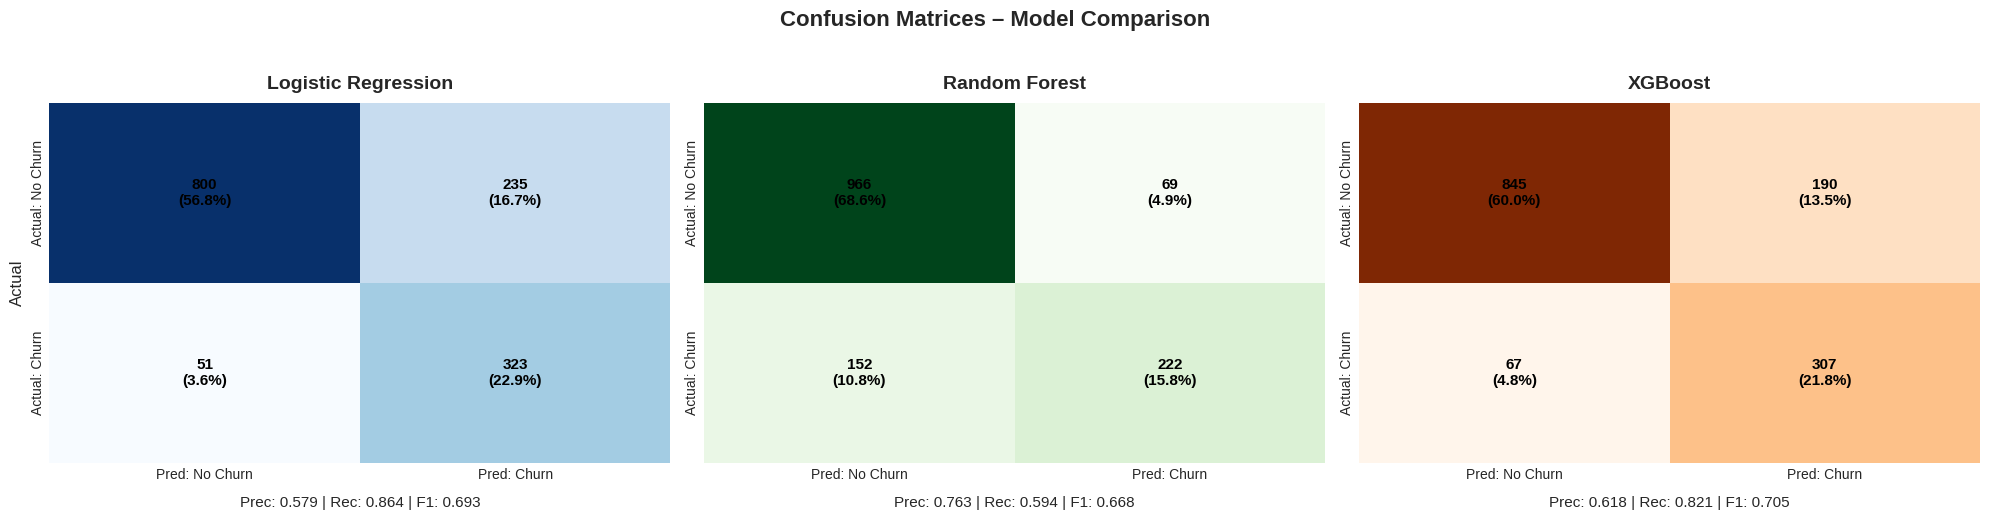


Side-by-side confusion matrix panel saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/confusion_matrices_panel.png



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Fixed order so the plots are always in the same sequence
model_order = ["Logistic Regression", "Random Forest", "XGBoost"]

# Optional colour map per model
model_cmaps = {
    "Logistic Regression": "Blues",
    "Random Forest": "Greens",
    "XGBoost": "Oranges"
}

y_test_np = y_test.to_numpy() if isinstance(y_test, pl.Series) else y_test

# Create 1x3 panel
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for idx, model_name in enumerate(model_order):
    ax = axes[idx]
    preds = predictions[model_name]
    y_pred_np = preds.to_numpy() if isinstance(preds, pl.Series) else preds

    # Confusion matrix + percentages
    cm = confusion_matrix(y_test_np, y_pred_np)
    cm_percent = cm / cm.sum() * 100

    # Metrics
    prec = precision_score(y_test_np, y_pred_np)
    rec = recall_score(y_test_np, y_pred_np)
    f1 = f1_score(y_test_np, y_pred_np)

    # Heatmap
    cmap = model_cmaps.get(model_name, "Blues")
    sns.heatmap(
        cm,
        annot=False,
        fmt="d",
        cmap=cmap,
        cbar=False,
        xticklabels=["Pred: No Churn", "Pred: Churn"],
        yticklabels=["Actual: No Churn", "Actual: Churn"],
        ax=ax
    )

    # Annotate with counts + percentages
    for i in range(2):
        for j in range(2):
            count = cm[i, j]
            pct = cm_percent[i, j]
            ax.text(
                j + 0.5,
                i + 0.5,
                f"{count}\n({pct:.1f}%)",
                ha="center",
                va="center",
                fontsize=11,
                fontweight="bold",
                color="black"
            )

    # Title and metrics line
    ax.set_title(model_name, fontsize=14, fontweight="bold", pad=10)
    ax.set_xlabel(
        f"Prec: {prec:.3f} | Rec: {rec:.3f} | F1: {f1:.3f}",
        fontsize=11,
        labelpad=10
    )
    ax.set_ylabel("")

# Common y-label on the left side
axes[0].set_ylabel("Actual", fontsize=12)

plt.suptitle("Confusion Matrices – Model Comparison", fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()

# Show inline
plt.show()

# Save panel
panel_path = output_path + "confusion_matrices_panel.png"
fig.savefig(panel_path, dpi=300, bbox_inches="tight")
plt.close(fig)

print(f"\nSide-by-side confusion matrix panel saved to: {panel_path}\n")



5.5. Generating ROC curves...


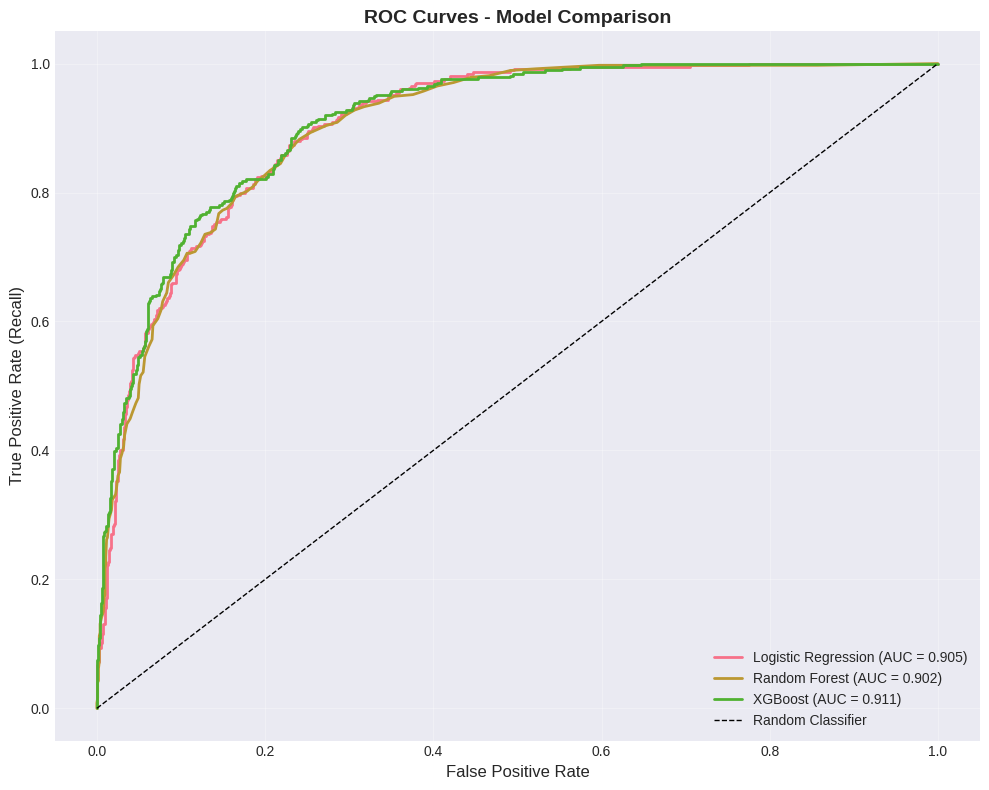

  ✓ ROC curves saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/roc_curves_comparison.png


In [ ]:
# 5.3. ROC Curves
print("\n5.5. Generating ROC curves...")

plt.figure(figsize=(10, 8))

# Convert y_test to numpy if stored as Polars
y_test_np = y_test.to_numpy() if isinstance(y_test, pl.Series) else y_test

for model_name, probs in probabilities.items():
    # Convert probabilities to numpy if Polars
    y_prob_np = probs.to_numpy() if isinstance(probs, pl.Series) else probs

    # Compute ROC components
    fpr, tpr, _ = roc_curve(y_test_np, y_prob_np)
    auc = roc_auc_score(y_test_np, y_prob_np)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})", linewidth=2)

# Baseline diagonal
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier", linewidth=1)

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate (Recall)", fontsize=12)
plt.title("ROC Curves - Model Comparison", fontsize=14, fontweight="bold")
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig(output_path + "roc_curves_comparison.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"  ✓ ROC curves saved: {output_path}roc_curves_comparison.png")



5.6. Feature Importance Analysis...
Random Forest feature importance saved
XGBoost feature importance saved


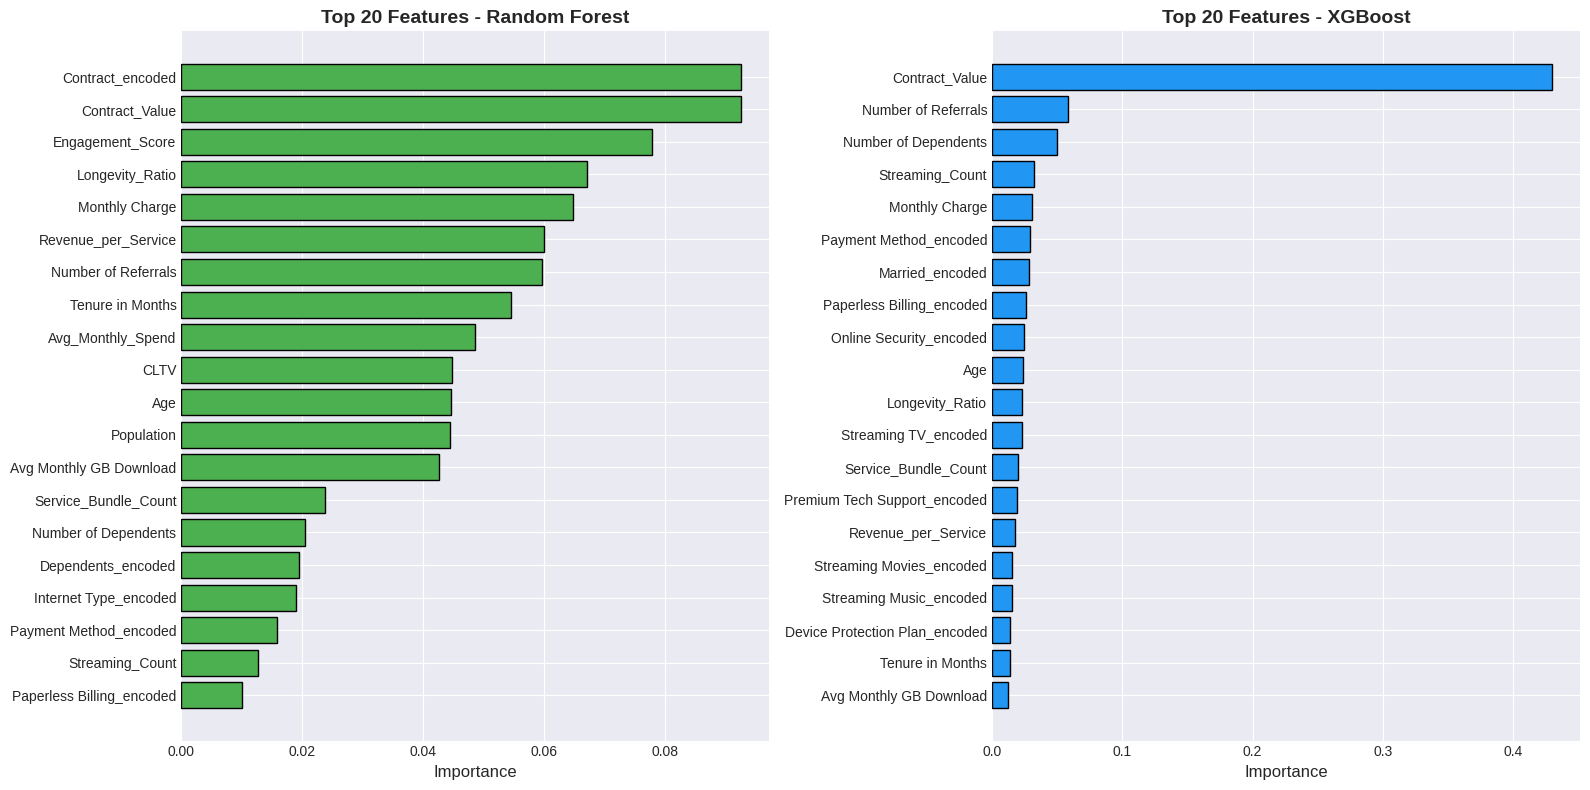

Feature importance visualization saved


In [ ]:
print("\n5.6. Feature Importance Analysis...")

# --- Random Forest feature importance
rf_importance = pl.DataFrame({
    "Feature": X.columns,
    "Importance": models["Random Forest"].feature_importances_.tolist()
}).sort("Importance", descending=True)

rf_importance.write_csv(output_path + "feature_importance_rf.csv")
print("Random Forest feature importance saved")

# --- XGBoost feature importance
xgb_importance = pl.DataFrame({
    "Feature": X.columns,
    "Importance": models["XGBoost"].feature_importances_.tolist()
}).sort("Importance", descending=True)

xgb_importance.write_csv(output_path + "feature_importance_xgb.csv")
print("XGBoost feature importance saved")

# --- Visualization of Top 20 Features
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Convert to pandas for Matplotlib plotting convenience
rf_pd = rf_importance.head(20).to_pandas()
xgb_pd = xgb_importance.head(20).to_pandas()

# Random Forest
axes[0].barh(rf_pd["Feature"], rf_pd["Importance"], color="#4CAF50", edgecolor="black")
axes[0].set_xlabel("Importance", fontsize=12)
axes[0].set_title("Top 20 Features - Random Forest", fontsize=14, fontweight="bold")
axes[0].invert_yaxis()

# XGBoost
axes[1].barh(xgb_pd["Feature"], xgb_pd["Importance"], color="#2196F3", edgecolor="black")
axes[1].set_xlabel("Importance", fontsize=12)
axes[1].set_title("Top 20 Features - XGBoost", fontsize=14, fontweight="bold")
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig(output_path + "feature_importance_comparison.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print("Feature importance visualization saved")


# 6EXPLAINABILITY AND VISUALISATION (NEW)

**(Only for the best model XGBoost)**

6.1 FEATURE IMPORTANCE ANALYSIS

Top 20 Most Important Features:
                           feature  importance
13                  Contract_Value    0.429981
5              Number of Referrals    0.058002
1             Number of Dependents    0.050037
14                 Streaming_Count    0.032371
3                   Monthly Charge    0.030565
21          Payment Method_encoded    0.028904
17                 Married_encoded    0.028180
20       Paperless Billing_encoded    0.025871
25         Online Security_encoded    0.024636
0                              Age    0.023835
8                  Longevity_Ratio    0.023025
29            Streaming TV_encoded    0.022651
10            Service_Bundle_Count    0.020107
28    Premium Tech Support_encoded    0.019072
11             Revenue_per_Service    0.017862
30        Streaming Movies_encoded    0.015560
31         Streaming Music_encoded    0.015328
27  Device Protection Plan_encoded    0.013504
2                 Tenure in Months    0.01

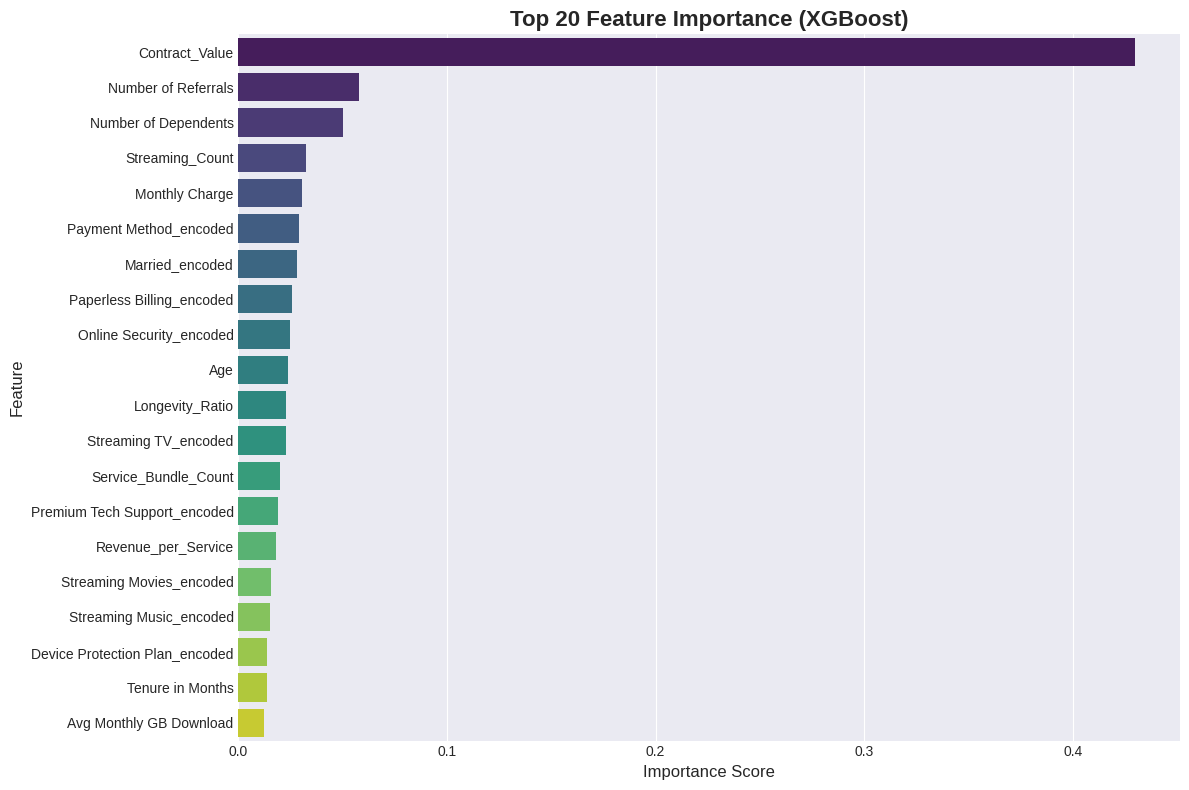

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("6.1 FEATURE IMPORTANCE ANALYSIS")
best_xgb_model = models["XGBoost"]

# Extract feature importance from best XGBoost model
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# Display top 20 features
print("\nTop 20 Most Important Features:")
print(feature_importance.head(20))

# Visualize feature importance
fig, ax = plt.subplots(figsize=(12, 8))
top_features = feature_importance.head(20)
sns.barplot(data=top_features, y='feature', x='importance', palette='viridis', ax=ax)
ax.set_title('Top 20 Feature Importance (XGBoost)', fontsize=16, fontweight='bold')
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig(output_path + '/feature_importance_xgboost.png', dpi=300, bbox_inches='tight')
plt.show()



6.1.2 Feature Importance by Category


Feature Importance by Category (Aggregated):

Category
Contractual             0.4848
Services                0.1701
Temporal / Lifecycle    0.1026
Other                   0.0933
Demographic             0.0870
Geographic              0.0348
Financial               0.0273
Name: importance, dtype: object


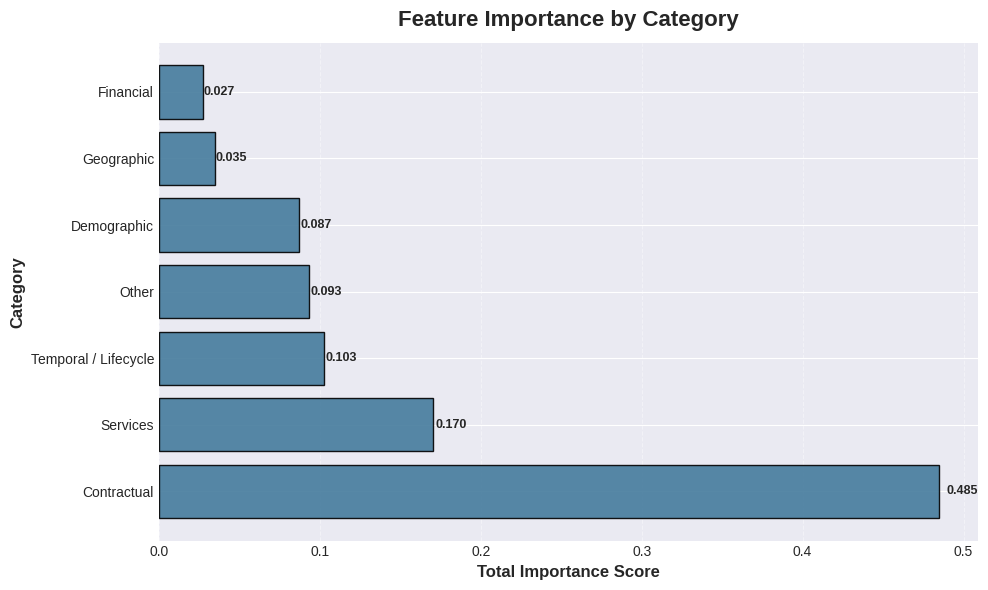

In [ ]:
print("\n6.1.2 Feature Importance by Category\n")

# 1) Categorization helper
def categorize_feature(feature_name):
    """Categorize features into business-relevant groups"""
    fl = feature_name.lower()

    if any(t in fl for t in ['tenure', 'month', 'age']):
        return 'Temporal / Lifecycle'
    elif any(t in fl for t in ['cltv', 'revenue', 'charge', 'refund', 'total']):
        return 'Financial'
    elif any(t in fl for t in ['contract', 'paperless', 'payment']):
        return 'Contractual'
    elif any(t in fl for t in ['internet', 'phone', 'streaming', 'security',
                               'backup', 'support', 'protection']):
        return 'Services'
    elif any(t in fl for t in ['city', 'state', 'zip', 'lat', 'long', 'population']):
        return 'Geographic'
    elif any(t in fl for t in ['gender', 'senior', 'married', 'dependents']):
        return 'Demographic'
    elif any(t in fl for t in ['satisfaction', 'score']):
        return 'Satisfaction'
    return 'Other'


# 2) Assign categories
feature_importance['Category'] = feature_importance['feature'].apply(categorize_feature)

# 3) Aggregate importance
category_importance = (
    feature_importance.groupby('Category')['importance']
    .sum()
    .sort_values(ascending=False)
)

# 4) Format table output
category_importance_fmt = category_importance.apply(lambda v: f"{v:.4f}")

print("\nFeature Importance by Category (Aggregated):\n")
print(category_importance_fmt)

# 5) Visualisation
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(
    category_importance.index,
    category_importance.values,
    color="#457B9D",
    edgecolor="black",
    alpha=0.9
)

ax.set_title("Feature Importance by Category", fontsize=16, fontweight="bold", pad=12)
ax.set_xlabel("Total Importance Score", fontsize=12, weight="bold")
ax.set_ylabel("Category", fontsize=12, weight="bold")

ax.grid(axis="x", linestyle="--", alpha=0.4)

# Add value labels
for bar, value in zip(bars, category_importance.values):
    ax.text(
        value + (value * 0.01),
        bar.get_y() + bar.get_height() / 2,
        f"{value:.3f}",
        va="center",
        fontsize=9,
        fontweight='bold'
    )

plt.tight_layout()
plt.savefig(output_path + "/feature_importance_by_category.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
#6.2.1 Churn Analysis Dashboard - Contract & Tenure**

# Prepare data for dashboard
dashboard_data = df.to_pandas().copy()


# Create interactive dashboard with Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Churn Rate by Contract Type',
                    'Churn Rate by Tenure Group',
                    'Monthly Charge Distribution by Churn',
                    'CLTV Distribution by Churn'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'box'}, {'type': 'box'}]]
)

# 1. Churn by Contract Type
contract_churn = dashboard_data.groupby('Contract')['Churn Label'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index()
contract_churn.columns = ['Contract', 'Churn_Rate']

fig.add_trace(
    go.Bar(x=contract_churn['Contract'], y=contract_churn['Churn_Rate'],
           name='Contract Type', marker_color='indianred'),
    row=1, col=1
)

# 2. Churn by Tenure Group (from Q4 analysis)
tenure_groups = pd.cut(dashboard_data['Tenure in Months'],
                       bins=[0, 6, 12, 24, 36, 72],
                       labels=['0-6m', '6-12m', '12-24m', '24-36m', '36m+'])
tenure_churn = dashboard_data.groupby(tenure_groups)['Churn Label'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index()
tenure_churn.columns = ['Tenure_Group', 'Churn_Rate']

fig.add_trace(
    go.Bar(x=tenure_churn['Tenure_Group'], y=tenure_churn['Churn_Rate'],
           name='Tenure in Group', marker_color='lightseagreen'),
    row=1, col=2
)

# 3. Monthly Charge by Churn
fig.add_trace(
    go.Box(x=dashboard_data['Churn Label'], y=dashboard_data['Monthly Charge'],
           name='Monthly Charge', marker_color='mediumpurple'),
    row=2, col=1
)

# 4. CLTV by Churn (from Q6 analysis)
fig.add_trace(
    go.Box(x=dashboard_data['Churn Label'], y=dashboard_data['CLTV'],
           name='CLTV', marker_color='gold'),
    row=2, col=2
)

# Update layout
fig.update_xaxes(title_text="Contract Type", row=1, col=1)
fig.update_xaxes(title_text="Tenure Group", row=1, col=2)
fig.update_xaxes(title_text="Churn Status", row=2, col=1)
fig.update_xaxes(title_text="Churn Status", row=2, col=2)

fig.update_yaxes(title_text="Churn Rate (%)", row=1, col=1)
fig.update_yaxes(title_text="Churn Rate (%)", row=1, col=2)
fig.update_yaxes(title_text="Monthly Charge ($)", row=2, col=1)
fig.update_yaxes(title_text="CLTV ($)", row=2, col=2)

fig.update_layout(height=800, showlegend=False,
                  title_text="Churn Analysis Dashboard - Key Metrics",
                  title_font_size=20)

fig.write_html(output_path + '/churn_dashboard_main.html')
fig.show()

print("\nMain churn dashboard created and saved")


Main churn dashboard created and saved


In [ ]:
#6.2.2 Payment Method & Service Bundle Dashboard (Q8 & Q9)**

# Dashboard for additional business questions insights

# Define which columns count as services
service_cols = [
    'Phone Service',
    'Multiple Lines',
    'Internet Service',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data'
]

# Create Number_of_Services: count how many "Yes" each customer has
dashboard_data['Number_of_Services'] = dashboard_data[service_cols].eq('Yes').sum(axis=1)


fig2 = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Churn Rate by Payment Method (Q8)',
                    'Churn Rate by Service Bundle Complexity (Q9)',
                    'Payment Method Distribution',
                    'Service Count Distribution'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'pie'}, {'type': 'histogram'}]]
)

# 1. Churn by Payment Method (Q8)
payment_churn = dashboard_data.groupby('Payment Method')['Churn Label'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index()
payment_churn.columns = ['Payment Method', 'Churn_Rate']

fig2.add_trace(
    go.Bar(x=payment_churn['Payment Method'], y=payment_churn['Churn_Rate'],
           marker_color='crimson'),
    row=1, col=1
)

# 2. Churn by Service Bundle Complexity (Q9)
# Assuming you have a 'Number_of_Services' column from Q9 analysis
if 'Number_of_Services' in dashboard_data.columns:
    bundle_churn = dashboard_data.groupby('Number_of_Services')['Churn Label'].apply(
        lambda x: (x == 'Yes').sum() / len(x) * 100
    ).reset_index()
    bundle_churn.columns = ['Number_of_Services', 'Churn_Rate']

    fig2.add_trace(
        go.Bar(x=bundle_churn['Number_of_Services'], y=bundle_churn['Churn_Rate'],
               marker_color='darkorange'),
        row=1, col=2
    )

# 3. Payment Method Distribution
payment_dist = dashboard_data['Payment Method'].value_counts()
fig2.add_trace(
    go.Pie(labels=payment_dist.index, values=payment_dist.values,
           marker_colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']),
    row=2, col=1
)

# 4. Service Count Distribution
if 'Number_of_Services' in dashboard_data.columns:
    fig2.add_trace(
        go.Histogram(x=dashboard_data['Number_of_Services'],
                     marker_color='steelblue', nbinsx=10),
        row=2, col=2
    )

# Update layout
fig2.update_xaxes(title_text="Payment Method", row=1, col=1)
fig2.update_xaxes(title_text="Number of Services", row=1, col=2)
fig2.update_xaxes(title_text="Number of Services", row=2, col=2)

fig2.update_yaxes(title_text="Churn Rate (%)", row=1, col=1)
fig2.update_yaxes(title_text="Churn Rate (%)", row=1, col=2)
fig2.update_yaxes(title_text="Count", row=2, col=2)

fig2.update_layout(height=800, showlegend=False,
                   title_text="Payment & Services Analysis Dashboard (Q8 & Q9)",
                   title_font_size=20)

fig2.write_html(output_path + '/payment_services_dashboard.html')
fig2.show()

print("\nPayment & Services dashboard created and saved")


Payment & Services dashboard created and saved



Customer Risk Distribution:
Risk_Category  Customers  Percentage
     Low Risk       3880       55.09
  Medium Risk       1040       14.77
    High Risk       2123       30.14

CLTV at Risk by Category (summary):
Risk_Category  Total_CLTV_M€  Avg_CLTV_€
     Low Risk          17.76     4577.90
  Medium Risk           4.47     4300.62
    High Risk           8.76     4124.53


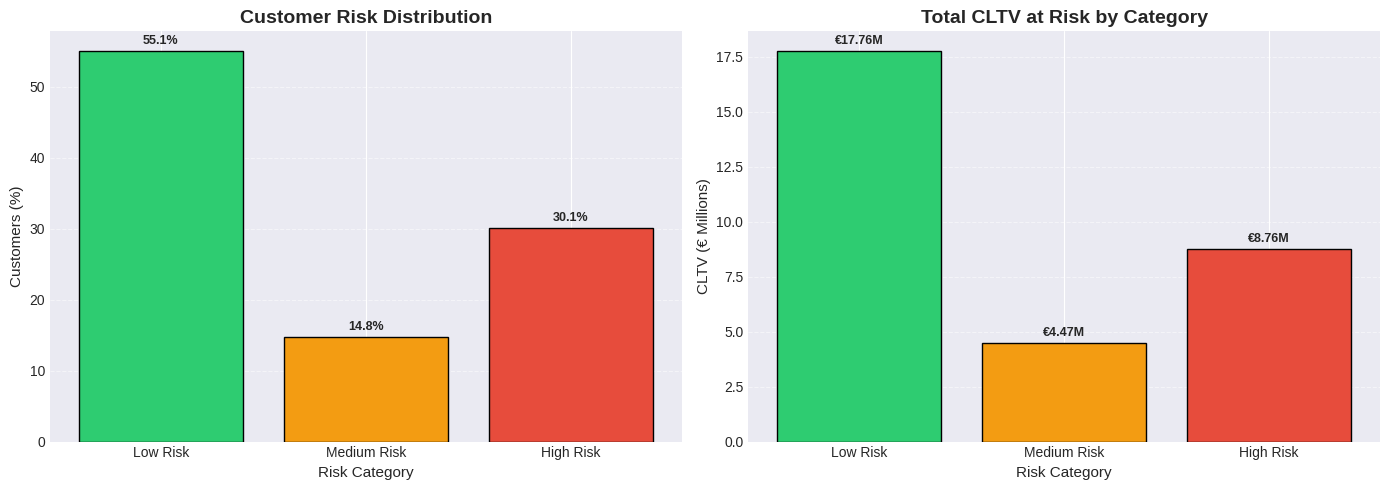


✓ Total CLTV at High Risk: €8.76M


In [ ]:
# 6.3.1 Risk Score Calculation

# Work on a Pandas copy for scoring & risk analysis
df_scored = df_model.to_pandas().copy()

# Calculate churn probability for all customers
df_scored['Churn_Probability'] = best_xgb_model.predict_proba(
    df_scored[X_train.columns]   # X_train is Pandas, so this aligns perfectly
)[:, 1]

# Create risk categories
df_scored['Risk_Category'] = pd.cut(
    df_scored['Churn_Probability'],
    bins=[0, 0.3, 0.6, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

risk_counts = df_scored['Risk_Category'].value_counts().sort_index()
risk_pct = (risk_counts / len(df_scored) * 100).round(2)

risk_summary = (
    pd.DataFrame({
        'Risk_Category': risk_counts.index,
        'Customers': risk_counts.values,
        'Percentage': risk_pct.values
    })
    .sort_values('Risk_Category')
)

print("\nCustomer Risk Distribution:")
print(risk_summary.to_string(index=False))

risk_cltv = (
    df_scored
    .groupby('Risk_Category')['CLTV']
    .agg(['sum', 'mean'])
    .reset_index()
)

# Ensure consistent order Low → Medium → High
order = ['Low Risk', 'Medium Risk', 'High Risk']
risk_summary = risk_summary.set_index('Risk_Category').loc[order].reset_index()
risk_cltv = risk_cltv.set_index('Risk_Category').loc[order].reset_index()

print("\nCLTV at Risk by Category (summary):")
print(
    risk_cltv.assign(
        sum_m=lambda d: (d['sum'] / 1_000_000).round(2),
        mean_eur=lambda d: d['mean'].round(2)
    )[["Risk_Category", "sum_m", "mean_eur"]]
    .rename(columns={
        "sum_m": "Total_CLTV_M€",
        "mean_eur": "Avg_CLTV_€"
    })
    .to_string(index=False)
)

# Visualize risk distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

color_map = {
    'Low Risk': '#2ecc71',
    'Medium Risk': '#f39c12',
    'High Risk': '#e74c3c'
}
bar_colors = [color_map[c] for c in risk_summary['Risk_Category']]

# --- 1) Bar chart for risk distribution (replaces pie) ---
ax1.bar(
    risk_summary['Risk_Category'],
    risk_summary['Percentage'],
    color=bar_colors,
    edgecolor='black'
)

ax1.set_title('Customer Risk Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Risk Category', fontsize=11)
ax1.set_ylabel('Customers (%)', fontsize=11)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Add % labels
for i, row in risk_summary.iterrows():
    ax1.text(
        i,
        row['Percentage'] + 0.5,
        f"{row['Percentage']:.1f}%",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# --- 2) CLTV at risk by category ---
cltv_m = risk_cltv['sum'] / 1_000_000  # millions
ax2.bar(
    risk_cltv['Risk_Category'],
    cltv_m,
    color=bar_colors,
    edgecolor='black'
)

ax2.set_title('Total CLTV at Risk by Category', fontsize=14, fontweight='bold')
ax2.set_ylabel('CLTV (€ Millions)', fontsize=11)
ax2.set_xlabel('Risk Category', fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels
for i, v in enumerate(cltv_m):
    ax2.text(
        i,
        v + max(cltv_m) * 0.01,
        f"€{v:.2f}M",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.tight_layout()
plt.savefig(output_path + '/customer_risk_profiling.png', dpi=300, bbox_inches='tight')
plt.show()

# -------------------------
# Textual highlight
# -------------------------
high_risk_cltv_m = float(
    risk_cltv.loc[risk_cltv['Risk_Category'] == 'High Risk', 'sum'] / 1_000_000
)

print(
    f"\n✓ Total CLTV at High Risk: €{high_risk_cltv_m:.2f}M"
)



In [ ]:
# 6.3.2 High-Risk Customer Profiles

high_risk_customers = df_scored[df_scored['Risk_Category'] == 'High Risk'].copy()

n_hr = len(high_risk_customers)
n_total = len(df_scored)

print(f"             HIGH-RISK CUSTOMER PROFILE ANALYSIS  (n = {n_hr:,} customers)")

print("\n1. CONTRACT TYPE DISTRIBUTION\n" + "-"*40)
contract_dist = (
    high_risk_customers['Contract']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)

for c, pct in contract_dist.items():
    print(f"   • {c:<25}: {pct:>5.1f}%")

print("\n2. TENURE (IN MONTHS)\n" + "-"*40)
t = high_risk_customers['Tenure in Months'].describe()

print(f"   Count:        {t['count']:.0f}")
print(f"   Mean:         {t['mean']:.2f}")
print(f"   Median:       {t['50%']:.2f}")
print(f"   Min–Max:      {t['min']:.0f} – {t['max']:.0f}")
print(f"   Std Dev:      {t['std']:.2f}")

if 'Payment_Method' in high_risk_customers.columns:
    print("\n3. PAYMENT METHOD DISTRIBUTION\n" + "-"*40)
    pm = (
        high_risk_customers['Payment_Method']
        .value_counts(normalize=True)
        .mul(100)
        .round(2)
    )
    for method, pct in pm.items():
        print(f"   • {method:<25}: {pct:>5.1f}%")

if 'Number_of_Services' in high_risk_customers.columns:
    print("\n4. SERVICE COMPLEXITY\n" + "-"*40)
    avg_hr = high_risk_customers['Number_of_Services'].mean()
    avg_all = df_scored['Number_of_Services'].mean()

    print(f"   Avg No. of Services (High-Risk):   {avg_hr:.2f}")
    print(f"   Avg No. of Services (Overall):     {avg_all:.2f}")

print("\n5. DEMOGRAPHIC PROFILE\n" + "-"*40)
senior_pct = (high_risk_customers['Senior Citizen_encoded'] == 1).mean() * 100
print(f"   Senior Citizens:   {senior_pct:.1f}%")

if 'Married' in high_risk_customers.columns:
    married_pct = (high_risk_customers['Married'] == 'Yes').mean() * 100
    print(f"   Married:           {married_pct:.1f}%")

print("\n6. FINANCIAL METRICS\n" + "-"*40)
avg_monthly = high_risk_customers['Monthly Charge'].mean()
avg_cltv = high_risk_customers['CLTV'].mean()

print(f"   Avg Monthly Charge:     £{avg_monthly:,.2f}")
print(f"   Avg CLTV:               £{avg_cltv:,.2f}")

print("\n" + "="*95 + "\n")


             HIGH-RISK CUSTOMER PROFILE ANALYSIS  (n = 2,123 customers)

1. CONTRACT TYPE DISTRIBUTION
----------------------------------------
   • Month-to-Month           :  92.9%
   • One Year                 :   5.9%
   • Two Year                 :   1.2%

2. TENURE (IN MONTHS)
----------------------------------------
   Count:        2123
   Mean:         16.17
   Median:       8.00
   Min–Max:      1 – 72
   Std Dev:      18.28

5. DEMOGRAPHIC PROFILE
----------------------------------------
   Senior Citizens:   24.4%
   Married:           34.5%

6. FINANCIAL METRICS
----------------------------------------
   Avg Monthly Charge:     £76.09
   Avg CLTV:               £4,124.53




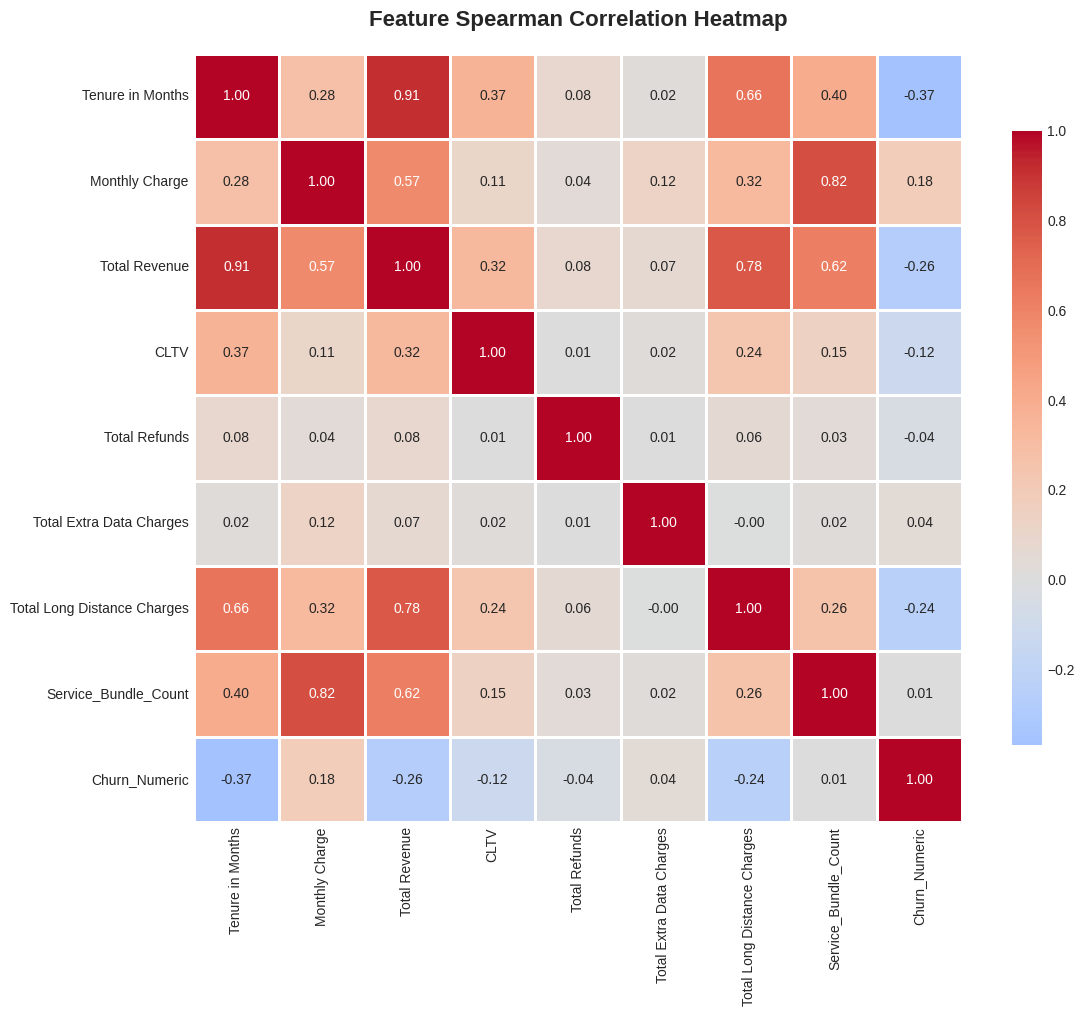


Strongest Correlations with Churn:
Monthly Charge                 0.184743
Total Extra Data Charges       0.044648
Service_Bundle_Count           0.008726
Total Refunds                 -0.039466
CLTV                          -0.123627
Total Long Distance Charges   -0.240615
Total Revenue                 -0.263706
Tenure in Months              -0.368708
Name: Churn_Numeric, dtype: float64


In [ ]:
# 6.4.1 Feature Correlation Heatmap

# Select key numeric features
numeric_features = [
    'Tenure in Months',
    'Monthly Charge',
    'Total Revenue',
    'CLTV',
    'Total Refunds',
    'Total Extra Data Charges',
    'Total Long Distance Charges',
    'Service_Bundle_Count'
]

# Add Churn_Numeric for correlation
df_scored['Churn_Numeric'] = (df_scored['Churn Label'] == 'Yes').astype(int)
numeric_features.append('Churn_Numeric')

# Calculate correlation matrix
#correlation_matrix = df_scored[numeric_features].corr()
correlation_matrix = df_scored[numeric_features].corr(method="spearman")

# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8}
)
plt.title('Feature Spearman Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(output_path + '/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Print strongest correlations with churn
churn_correlations = correlation_matrix['Churn_Numeric'].sort_values(ascending=False)
print("\nStrongest Correlations with Churn:")
print(churn_correlations[churn_correlations.index != 'Churn_Numeric'])


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create CLTV segments (quintiles, can adjust q)
df_scored_seg = df_scored.copy()
df_scored_seg['CLTV_Segment'] = pd.qcut(
    df_scored_seg['CLTV'],
    q=5,
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

# Aggregate by CLTV segment
cltv_seg_summary = (
    df_scored_seg
    .groupby('CLTV_Segment')
    .agg(
        Avg_Churn_Prob=('Churn_Probability', 'mean'),
        Total_CLTV=('CLTV', 'sum'),
        Customers=('CLTV', 'count')
    )
    .reset_index()
)

# Convert CLTV to millions for easier reading
cltv_seg_summary['Total_CLTV_M'] = cltv_seg_summary['Total_CLTV'] / 1_000_000

# --- Build combined bar + line chart ---
fig = make_subplots(
    rows=1,
    cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=["CLTV Segment vs Average Churn Probability & Total CLTV (Q6)"]
)

# Bar: Total CLTV (M£) by segment
fig.add_trace(
    go.Bar(
        x=cltv_seg_summary['CLTV_Segment'],
        y=cltv_seg_summary['Total_CLTV_M'],
        name='Total CLTV (M£)',
        marker_color='#457B9D',
        text=[f"{v:.2f}M" for v in cltv_seg_summary['Total_CLTV_M']],
        textposition='outside'
    ),
    row=1,
    col=1,
    secondary_y=False
)

# Line: Avg churn probability by segment
fig.add_trace(
    go.Scatter(
        x=cltv_seg_summary['CLTV_Segment'],
        y=cltv_seg_summary['Avg_Churn_Prob'] * 100,  # in %
        name='Avg Churn Probability (%)',
        mode='lines+markers+text',
        marker=dict(size=9, color='#E63946'),
        line=dict(width=2),
        text=[f"{v*100:.1f}%" for v in cltv_seg_summary['Avg_Churn_Prob']],
        textposition='top center'
    ),
    row=1,
    col=1,
    secondary_y=True
)

# Layout & axes
fig.update_layout(
    #title_text="Customer Lifetime Value Segments vs Churn Probability (Q6)",
    #title_font_size=18,
    height=600,
    width=950,
    legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
    margin=dict(l=70, r=40, t=80, b=80),
)

fig.update_xaxes(
    title_text="CLTV Segment",
    tickangle=0
)

fig.update_yaxes(
    title_text="Total CLTV (M£)",
    secondary_y=False
)

fig.update_yaxes(
    title_text="Average Churn Probability (%)",
    secondary_y=True,
    rangemode='tozero'
)

fig.write_html(output_path + '/cltv_vs_churn_probability.html')
fig.show()

print("\nSegmented CLTV vs Churn Probability visualization created")



Segmented CLTV vs Churn Probability visualization created


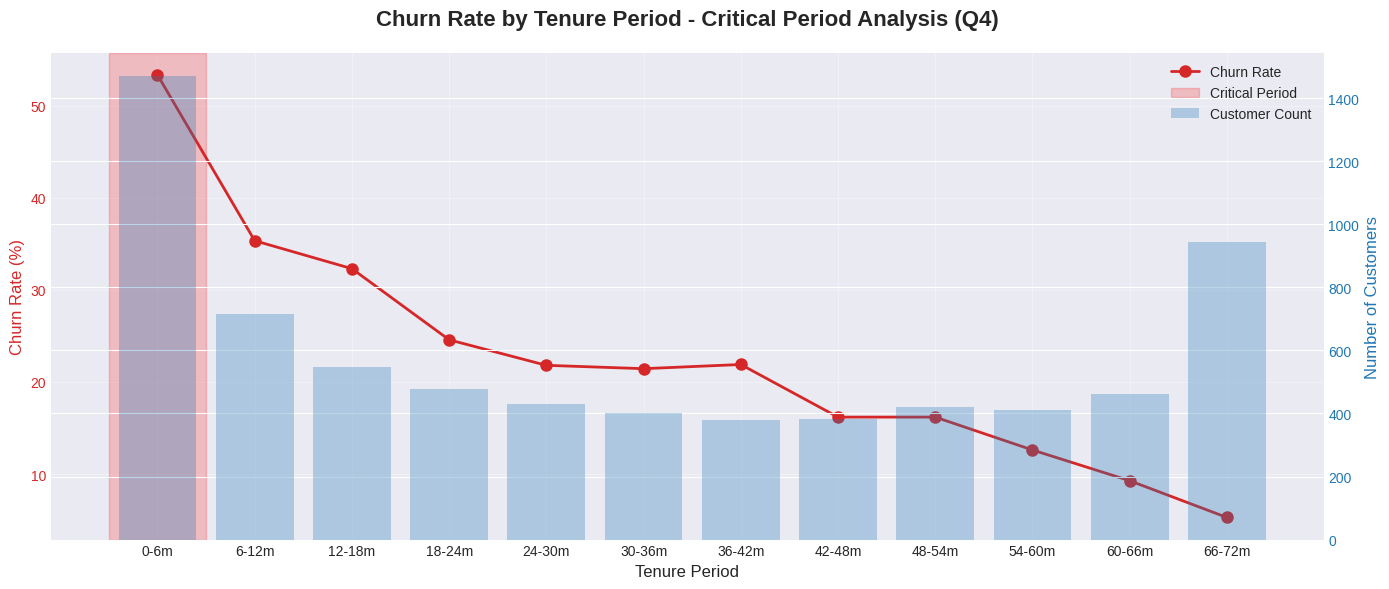


Tenure critical period visualization created (Q4)


In [ ]:
#6.4.3 Tenure Critical Period Visualization (Q4)**

# Create detailed tenure analysis visualization
tenure_bins = list(range(0, 73, 6))  # 6-month bins
df_scored['Tenure_Bin'] = pd.cut(df_scored['Tenure in Months'],
                                      bins=tenure_bins,
                                      labels=[f'{i}-{i+6}m' for i in tenure_bins[:-1]])

tenure_analysis = df_scored.groupby('Tenure_Bin').agg({
    'Churn_Numeric': ['mean', 'count']
}).reset_index()
tenure_analysis.columns = ['Tenure_Bin', 'Churn_Rate', 'Customer_Count']
tenure_analysis['Churn_Rate'] = tenure_analysis['Churn_Rate'] * 100

# Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:red'
ax1.set_xlabel('Tenure Period', fontsize=12)
ax1.set_ylabel('Churn Rate (%)', color=color, fontsize=12)
ax1.plot(tenure_analysis['Tenure_Bin'], tenure_analysis['Churn_Rate'],
         color=color, marker='o', linewidth=2, markersize=8, label='Churn Rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Highlight critical period (0-6 months)
ax1.axvspan(-0.5, 0.5, alpha=0.2, color='red', label='Critical Period')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Customers', color=color, fontsize=12)
ax2.bar(tenure_analysis['Tenure_Bin'], tenure_analysis['Customer_Count'],
        alpha=0.3, color=color, label='Customer Count')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Churn Rate by Tenure Period - Critical Period Analysis (Q4)',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.savefig(output_path + '/tenure_critical_period_q4.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTenure critical period visualization created (Q4)")

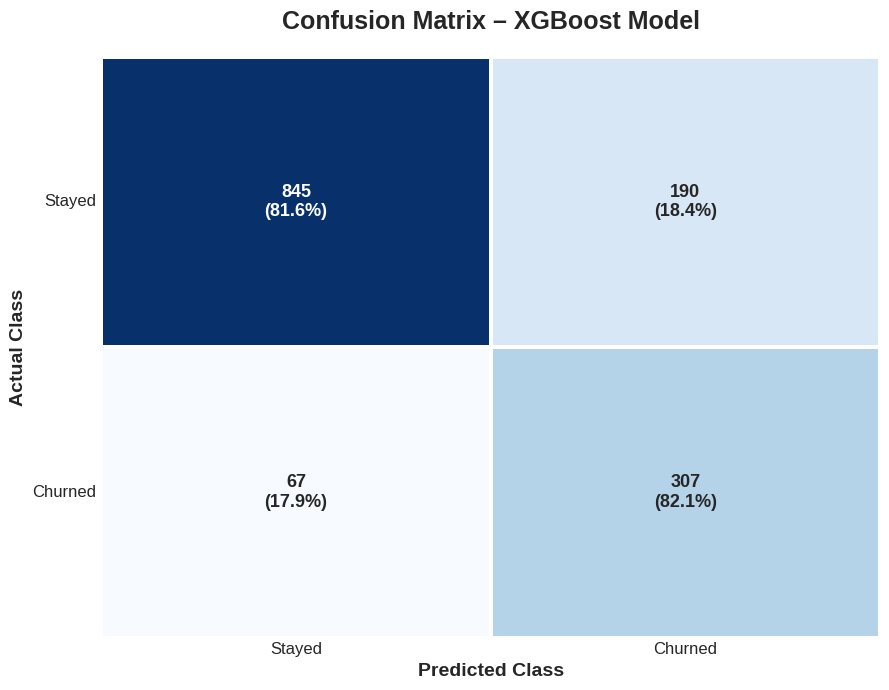


CONFUSION MATRIX BREAKDOWN
---------------------------------------
TP  (Correctly predicted Churned)       : 307
TN  (Correctly predicted Stayed)        : 845
FP  (Predicted Churned but Stayed)      : 190
FN  (Predicted Stayed but Churned)      : 67


In [ ]:
# 6.5.1 Improved Confusion Matrix Heatmap

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix
y_pred_xgb = best_xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)

# Calculate percentages for annotations
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
annot_text = np.array([
    [f"{cm[0,0]}\n({cm_percent[0,0]:.1f}%)", f"{cm[0,1]}\n({cm_percent[0,1]:.1f}%)"],
    [f"{cm[1,0]}\n({cm_percent[1,0]:.1f}%)", f"{cm[1,1]}\n({cm_percent[1,1]:.1f}%)"]
])

plt.figure(figsize=(9, 7))

sns.heatmap(
    cm,
    annot=annot_text,
    fmt='',
    cmap='Blues',
    cbar=False,
    linewidths=1.5,
    linecolor='white',
    annot_kws={'size': 13, 'weight': 'bold'}
)

plt.title("Confusion Matrix – XGBoost Model", fontsize=18, weight='bold', pad=20)
plt.xlabel("Predicted Class", fontsize=14, weight='bold')
plt.ylabel("Actual Class", fontsize=14, weight='bold')

plt.xticks(
    ticks=[0.5, 1.5],
    labels=["Stayed", "Churned"],
    fontsize=12
)
plt.yticks(
    ticks=[0.5, 1.5],
    labels=["Stayed", "Churned"],
    fontsize=12,
    rotation=0
)

plt.tight_layout()
plt.savefig(output_path + "/confusion_matrix_xgboost.png", dpi=300, bbox_inches='tight')
plt.show()

# Breakdown in text
tn, fp, fn, tp = cm.ravel()
print("\nCONFUSION MATRIX BREAKDOWN")
print("---------------------------------------")
print(f"TP  (Correctly predicted Churned)       : {tp}")
print(f"TN  (Correctly predicted Stayed)        : {tn}")
print(f"FP  (Predicted Churned but Stayed)      : {fp}")
print(f"FN  (Predicted Stayed but Churned)      : {fn}")


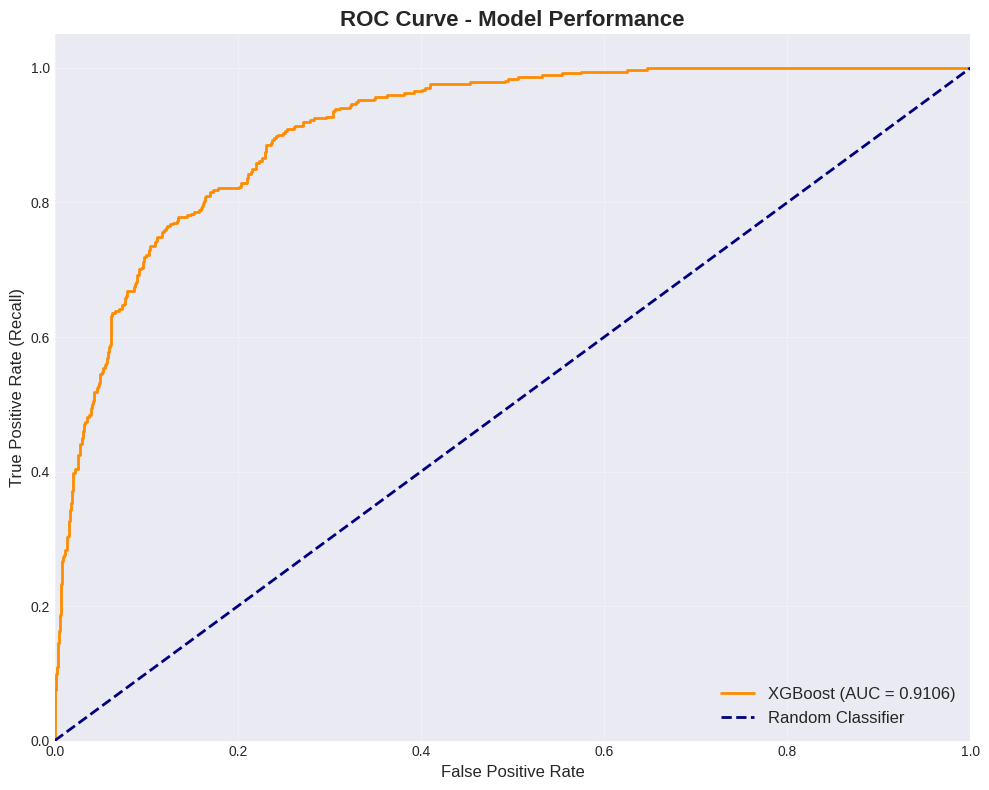


ROC-AUC Score: 0.9106


In [ ]:
#6.5.2 ROC Curve Comparison**

from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for XGBoost
y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# If you have other models (Logistic Regression, Random Forest), add them here
# For now, we'll just show XGBoost

plt.figure(figsize=(10, 8))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2,
         label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve - Model Performance', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(output_path + '/roc_curve_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nROC-AUC Score: {roc_auc_xgb:.4f}")


In [ ]:
#6.6 Summary of Visualizations Key Insights**

print("\nKEY INSIGHTS FROM VISUALIZATIONS:")

print("\n1. Feature Importance:")
print(f"   - Top category: {category_importance.index[0]}")
print(f"   - Most important feature: {feature_importance.iloc[0]['feature']}")

print("\n2. Customer Risk:")
print(f"   - High-risk customers: {risk_dist['High Risk']} ({risk_dist['High Risk']/len(df_scored)*100:.1f}%)")
print(f"   - CLTV at high risk: £{risk_cltv[risk_cltv['Risk_Category'] == 'High Risk']['sum'].values[0]/1000000:.2f}M")

print("\n3. Model Performance:")
print(f"   - ROC-AUC: {roc_auc_xgb:.4f}")
print(f"   - True Positives (Churners caught): {tp}")
print(f"   - False Negatives (Churners missed): {fn}")

print("\nSection 6 complete - All visualizations generated successfully")


KEY INSIGHTS FROM VISUALIZATIONS:

1. Feature Importance:
   - Top category: Contractual
   - Most important feature: Contract_Value

2. Customer Risk:
   - High-risk customers: 2123 (30.1%)
   - CLTV at high risk: £8.76M

3. Model Performance:
   - ROC-AUC: 0.9106
   - True Positives (Churners caught): 307
   - False Negatives (Churners missed): 67

Section 6 complete - All visualizations generated successfully


# 7. BUSINESS RECOMENDATIONS (NEW)

In this section we translated model insights into actionable business strategies for customer retention.

**This section provides:**  

1. High-risk customer identification and prioritization
2. Customer profile analysis based on churn drivers
3. Targeted retention strategies linked to Q4, Q6, Q8, Q9 insights
4. Implementation roadmap with timelines
5. Expected business impact and ROI projections



In [ ]:
print("7.1 HIGH-RISK CUSTOMER IDENTIFICATION")

# Identify high-risk customers for immediate intervention
high_risk_customers = df_scored[
    (df_scored['Risk_Category'] == 'High Risk') &    # <-- changed here
    (df_scored['Customer Status'] == 'Stayed')    # Currently active
].copy()

print(f"\nTotal High-Risk Active Customers: {len(high_risk_customers)}")

active_customers = df_scored[df_scored['Customer Status'] == 'Stayed']
pct_high_risk = len(high_risk_customers) / len(active_customers) * 100
print(f"Percentage of Active Customer Base: {pct_high_risk:.2f}%")

# Calculate total CLTV at risk
total_cltv_at_risk = high_risk_customers['CLTV'].sum()
print(f"Total CLTV at Risk: ${total_cltv_at_risk/1_000_000:.2f} Million")

# Average churn probability
avg_churn_prob = high_risk_customers['Churn_Probability'].mean()
print(f"Average Churn Probability: {avg_churn_prob*100:.1f}%")


7.1 HIGH-RISK CUSTOMER IDENTIFICATION

Total High-Risk Active Customers: 340
Percentage of Active Customer Base: 7.20%
Total CLTV at Risk: $1.41 Million
Average Churn Probability: 73.7%


In [ ]:
#7.1.1 Priority Intervention List**

# Create priority score combining churn probability and CLTV
high_risk_customers['Priority_Score'] = (
    high_risk_customers['Churn_Probability'] * 0.6 +  # 60% weight on churn risk
    (high_risk_customers['CLTV'] / high_risk_customers['CLTV'].max()) * 0.4  # 40% weight on value
)

# Sort by priority score
priority_list = high_risk_customers.sort_values('Priority_Score', ascending=False)[
    ['Customer ID', 'Churn_Probability', 'CLTV', 'Priority_Score',
     'Contract', 'Tenure in Months', 'Monthly Charge']
].head(100)

print("\nTop 100 Priority Customers for Immediate Intervention:")
display(priority_list.head(20))

# Export priority list
priority_list.to_csv(output_path + '/high_risk_priority_customers.csv', index=False)
print(f"\nPriority customer list exported to: {output_path}/high_risk_priority_customers.csv")


Top 100 Priority Customers for Immediate Intervention:


,Customer ID,Churn_Probability,CLTV,Priority_Score,Contract,Tenure in Months,Monthly Charge
994,9279-CJEOJ,0.941035,5691.0,0.918044,Month-to-Month,21.0,95.40
2622,2876-GZYZC,0.901546,5886.0,0.906461,Month-to-Month,13.0,85.95
6998,0422-UXFAP,0.874689,6034.0,0.899538,One Year,51.0,98.85
1029,8695-ARGXZ,0.932428,5381.0,0.893628,Month-to-Month,34.0,75.55
5715,4298-OYIFC,0.881330,5640.0,0.879054,Month-to-Month,15.0,103.45
1122,6563-VNPMN,0.905568,5397.0,0.878506,Month-to-Month,45.0,85.70
982,6078-VESFR,0.916835,5225.0,0.874585,Month-to-Month,13.0,70.45
964,1028-FFNJK,0.955888,4828.0,0.873362,Month-to-Month,30.0,101.50
955,5995-SNNEW,0.838819,5883.0,0.868638,Month-to-Month,23.0,104.45
3130,4301-VVZKA,0.866334,5432.0,0.857139,Month-to-Month,16.0,75.40



Priority customer list exported to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs//high_risk_priority_customers.csv


In [ ]:
#7.2 Customer Profile Analysis

#7.2.1 Profile 1: "New Dissatisfied Customer"**

# Profile 1: New Dissatisfied Customer (based on Q4 - Critical Tenure Period)
profile1 = df_scored[
    (df_scored['Tenure in Months'] <= 12) &  # First year (Q4 insight)
    (df_scored['Contract'] == 'Month-to-Month') &
    (df_scored['Churn_Probability'] > 0.6)
].copy()

print("PROFILE 1: 'New Dissatisfied Customer'")

print(f"Population: {len(profile1)} customers ({len(profile1)/len(df_scored)*100:.1f}% of total)")
print(f"Average Churn Probability: {profile1['Churn_Probability'].mean()*100:.1f}%")
print(f"Total CLTV at Risk: £{profile1['CLTV'].sum()/1000:.0f}K")

print("\nKey Characteristics:")
print(f"  - Average Tenure: {profile1['Tenure in Months'].mean():.1f} months")
print(f"  - Average Monthly Charge: £{profile1['Monthly Charge'].mean():.2f}")
print(f"  - Contract Type: 100% Month-to-Month")

if 'Number_of_Services' in profile1.columns:
    print(f"  - Average Services: {profile1['Number_of_Services'].mean():.1f}")

print("\nRetention Strategy:")
print("  → Early Intervention Program (Q4-based)")
print("  → Contract Upgrade Incentives")
print("  → Enhanced Onboarding Experience")

PROFILE 1: 'New Dissatisfied Customer'
Population: 1246 customers (17.7% of total)
Average Churn Probability: 84.6%
Total CLTV at Risk: £5023K

Key Characteristics:
  - Average Tenure: 3.9 months
  - Average Monthly Charge: £67.90
  - Contract Type: 100% Month-to-Month

Retention Strategy:
  → Early Intervention Program (Q4-based)
  → Contract Upgrade Incentives
  → Enhanced Onboarding Experience


In [ ]:
#7.2.2 Profile 2: "High-Value At-Risk"

# Profile 2: High-Value At-Risk (based on Q6 - CLTV Analysis)
cltv_threshold = df_scored['CLTV'].quantile(0.75)  # Top 25% CLTV
profile2 = df_scored[
    (df_scored['CLTV'] > cltv_threshold) &
    (df_scored['Churn_Probability'] > 0.5)
].copy()

print("PROFILE 2: 'High-Value At-Risk'")
print(f"Population: {len(profile2)} customers ({len(profile2)/len(df_scored)*100:.1f}% of total)")
print(f"Average Churn Probability: {profile2['Churn_Probability'].mean()*100:.1f}%")
print(f"Total CLTV at Risk: £{profile2['CLTV'].sum()/1000:.0f}K")

print("\nKey Characteristics:")
print(f"  - Average CLTV: £{profile2['CLTV'].mean():.2f} (Q6 insight)")
print(f"  - Average Monthly Charge: ${profile2['Monthly Charge'].mean():.2f}")
print(f"  - Average Tenure: {profile2['Tenure in Months'].mean():.1f} months")

print("\nRetention Strategy:")
print("  → VIP Retention Program")
print("  → Personalized Account Management")
print("  → Premium Service Bundles")
print("  → Loyalty Rewards")

PROFILE 2: 'High-Value At-Risk'
Population: 477 customers (6.8% of total)
Average Churn Probability: 76.6%
Total CLTV at Risk: £2739K

Key Characteristics:
  - Average CLTV: £5742.50 (Q6 insight)
  - Average Monthly Charge: $76.29
  - Average Tenure: 23.4 months

Retention Strategy:
  → VIP Retention Program
  → Personalized Account Management
  → Premium Service Bundles
  → Loyalty Rewards


In [ ]:
# 7.2.3 Profile 3: "Payment Risk Customer"

# Profile 3: Payment Risk (based on Q8 - Payment Method Analysis)
# Assuming certain payment methods have higher churn (e.g., Bank Withdrawal, Mailed Check)
df_scored['Churn_Numeric'] = (df_scored['Churn Label'] == 'Yes').astype(int)


if 'Payment Method' in df_scored.columns:
    # Identify risky payment methods
    payment_churn_rates = (
        df_scored
        .groupby('Payment Method')['Churn_Numeric']
        .mean()
        .sort_values(ascending=False)
    )
    risky_payment_methods = payment_churn_rates.head(2).index.tolist()

    profile3 = df_scored[
        (df_scored['Payment Method'].isin(risky_payment_methods)) &
        (df_scored['Churn_Probability'] > 0.5)
    ].copy()

    print("PROFILE 3: 'Payment Risk Customer'")
    print(f"Population: {len(profile3)} customers ({len(profile3)/len(df_scored)*100:.1f}% of total)")
    print(f"Average Churn Probability: {profile3['Churn_Probability'].mean()*100:.1f}%")
    print(f"Total CLTV at Risk: £{profile3['CLTV'].sum()/1000:.0f}K")

    print("\nKey Characteristics:")
    print(f"  - Risky Payment Methods: {', '.join(risky_payment_methods)} (Q8 insight)")
    print(f"  - Average Monthly Charge: £{profile3['Monthly Charge'].mean():.2f}")

    print("\nRetention Strategy:")
    print("  → Payment Method Migration Campaign")
    print("  → Auto-Pay Enrollment Incentives")
    print("  → Billing Support Enhancement")
else:
    print("Column 'Payment Method' not found in df_scored.columns")


PROFILE 3: 'Payment Risk Customer'
Population: 1937 customers (27.5% of total)
Average Churn Probability: 81.0%
Total CLTV at Risk: £8056K

Key Characteristics:
  - Risky Payment Methods: Mailed Check, Bank Withdrawal (Q8 insight)
  - Average Monthly Charge: £75.91

Retention Strategy:
  → Payment Method Migration Campaign
  → Auto-Pay Enrollment Incentives
  → Billing Support Enhancement


In [ ]:
#7.2.4 Profile 4: "Service Minimalist"**

# Profile 4: Service Minimalist (based on Q9 - Service Bundle Complexity)

if 'Service_Bundle_Count' in df_scored.columns:
    # Low service count customers
    service_threshold = df_scored['Service_Bundle_Count'].quantile(0.33)  # Bottom 33%

    profile4 = df_scored[
        (df_scored['Service_Bundle_Count'] <= service_threshold) &
        (df_scored['Churn_Probability'] > 0.5)
    ].copy()


    print("PROFILE 4: 'Service Minimalist'")
    print(f"Population: {len(profile4)} customers ({len(profile4)/len(df_scored)*100:.1f}% of total)")
    print(f"Average Churn Probability: {profile4['Churn_Probability'].mean()*100:.1f}%")
    print(f"Total CLTV at Risk: ${profile4['CLTV'].sum()/1000:.0f}K")

    print("\nKey Characteristics:")
    print(f"  - Average Services: {profile4['Service_Bundle_Count'].mean():.1f} (Q9 insight)")
    print(f"  - Average Monthly Charge: £{profile4['Monthly Charge'].mean():.2f}")
    print(f"  - Average Tenure: {profile4['Tenure in Months'].mean():.1f} months")

    print("\nRetention Strategy:")
    print("  → Service Bundle Upselling")
    print("  → Cross-Sell Campaigns")
    print("  → Value Demonstration Programs")

PROFILE 4: 'Service Minimalist'
Population: 710 customers (10.1% of total)
Average Churn Probability: 78.3%
Total CLTV at Risk: $2885K

Key Characteristics:
  - Average Services: 2.5 (Q9 insight)
  - Average Monthly Charge: £53.29
  - Average Tenure: 6.7 months

Retention Strategy:
  → Service Bundle Upselling
  → Cross-Sell Campaigns
  → Value Demonstration Programs


In [ ]:
print("7.3 TARGETED RETENTION STRATEGIES\n")

pop_profile1 = len(profile1)                                           # Q4 dissatisfied
pop_month_to_month = (df_scored['Contract'] == 'Month-to-Month').sum()
pop_profile2 = len(profile2)                                           # Q6 high-value risk
pop_profile3 = len(profile3) if 'Payment Method' in df_scored.columns else 0
pop_profile4 = len(profile4) if 'Number_of_Services' in df_scored.columns else 0

# Senior population
if 'Senior Citizen_encoded' in df_scored.columns:
    pop_senior = (df_scored['Senior Citizen_encoded'] == 1).sum()
elif 'Senior Citizen' in df_scored.columns:
    col = df_scored['Senior Citizen']
    if col.dtype != 'O':
        pop_senior = (col == 1).sum()
    else:
        pop_senior = col.astype(str).str.strip().isin(['Yes', 'Y', 'Senior', '1']).sum()
else:
    pop_senior = 0

pop_high_mcharge = (df_scored['Monthly Charge'] > df_scored['Monthly Charge'].median()).sum()
pop_high_prob = (df_scored['Churn_Probability'] > 0.5).sum()

# -------------------------------------------------------------------------
# 2) STRATEGY DATAFRAME (as before)
# -------------------------------------------------------------------------

retention_strategies = pd.DataFrame({
    "Strategy": [
        "1. Early Intervention Program (Q4)",
        "2. Contract Optimization (Core)",
        "3. CLTV-Based Retention (Q6)",
        "4. Payment Method Migration (Q8)",
        "5. Service Bundle Upselling (Q9)",
        "6. Senior Retention Program (Core)",
        "7. Pricing Optimization (Core)",
        "8. Satisfaction-Driven Intervention (Core)"
    ],
    "Target Profile": [
        "New Dissatisfied Customer",
        "Month-to-Month Customers",
        "High-Value At-Risk",
        "Payment Risk Customer",
        "Service Minimalist",
        "Senior Citizens",
        "High Monthly Charge",
        "Low Satisfaction Score"
    ],
    "Target Population": [
        pop_profile1,
        pop_month_to_month,
        pop_profile2,
        pop_profile3,
        pop_profile4,
        pop_senior,
        pop_high_mcharge,
        pop_high_prob
    ],
    "Retention Rate": [0.35, 0.30, 0.40, 0.25, 0.30, 0.20, 0.25, 0.45],
    "Cost per Customer": [50, 75, 100, 30, 60, 80, 40, 90],
    "Priority": ["High", "High", "High", "Medium", "Medium", "Medium", "Medium", "High"]
})

# -------------------------------------------------------------------------
# 3) ROI CALCULATION
# -------------------------------------------------------------------------

avg_cltv = df_scored["CLTV"].mean()

retention_strategies["Customers Retained"] = (
    retention_strategies["Target Population"] * retention_strategies["Retention Rate"]
).astype(int)

retention_strategies["Total Cost"] = (
    retention_strategies["Target Population"] * retention_strategies["Cost per Customer"]
)

retention_strategies["Revenue Protected"] = (
    retention_strategies["Customers Retained"] * avg_cltv
)

# Safe ROI
retention_strategies["ROI"] = np.where(
    retention_strategies["Total Cost"] > 0,
    retention_strategies["Revenue Protected"] / retention_strategies["Total Cost"],
    0
).round(2)


# Formatted to display
formatted_retention = retention_strategies.copy()

formatted_retention["Target Population"] = formatted_retention["Target Population"].apply(lambda x: f"{x:,}")
formatted_retention["Customers Retained"] = formatted_retention["Customers Retained"].apply(lambda x: f"{x:,}")
formatted_retention["Retention Rate"] = formatted_retention["Retention Rate"].apply(lambda x: f"{x*100:.1f}%")
formatted_retention["Cost per Customer"] = formatted_retention["Cost per Customer"].apply(lambda x: f"€{x:,.0f}")
formatted_retention["Total Cost"] = formatted_retention["Total Cost"].apply(lambda x: f"€{x:,.0f}")
formatted_retention["Revenue Protected"] = formatted_retention["Revenue Protected"].apply(lambda x: f"€{x:,.0f}")
formatted_retention["ROI"] = formatted_retention["ROI"].apply(lambda x: f"{x:.2f}x")

# Sort for presentation: High priority first, then ROI desc
priority_order = {"High": 0, "Medium": 1}
formatted_retention["priority_sort"] = formatted_retention["Priority"].map(priority_order)
formatted_retention = formatted_retention.sort_values(["priority_sort", "ROI"], ascending=[True, False])
formatted_retention = formatted_retention.drop(columns=["priority_sort"])

print("\nRETENTION STRATEGIES – PRIORITIZED & FORMATTED")
display(formatted_retention)

# Export for file
retention_strategies.to_csv(output_path + "/retention_strategies.csv", index=False)
print(f"\nExported to: {output_path}/retention_strategies.csv\n")


7.3 TARGETED RETENTION STRATEGIES


RETENTION STRATEGIES – PRIORITIZED & FORMATTED


,Strategy,Target Profile,Target Population,Retention Rate,Cost per Customer,Priority,Customers Retained,Total Cost,Revenue Protected,ROI
0,1. Early Intervention Program (Q4),New Dissatisfied Customer,"1,246",35.0%,€50,High,436,"€62,300","€1,918,529",30.80x
7,8. Satisfaction-Driven Intervention (Core),Low Satisfaction Score,"2,454",45.0%,€90,High,"1,104","€220,860","€4,857,927",22.00x
1,2. Contract Optimization (Core),Month-to-Month Customers,"3,610",30.0%,€75,High,"1,083","€270,750","€4,765,520",17.60x
2,3. CLTV-Based Retention (Q6),High-Value At-Risk,477,40.0%,€100,High,190,"€47,700","€836,056",17.53x
3,4. Payment Method Migration (Q8),Payment Risk Customer,"1,937",25.0%,€30,Medium,484,"€58,110","€2,129,743",36.65x
6,7. Pricing Optimization (Core),High Monthly Charge,"3,515",25.0%,€40,Medium,878,"€140,600","€3,863,460",27.48x
5,6. Senior Retention Program (Core),Senior Citizens,"1,142",20.0%,€80,Medium,228,"€91,360","€1,003,267",10.98x
4,5. Service Bundle Upselling (Q9),Service Minimalist,0,30.0%,€60,Medium,0,€0,€0,0.00x



Exported to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs//retention_strategies.csv



In [ ]:
# 7.3.1 Strategy Details and Action Plans

print("\n" + "="*90)
print("                 7.3.1 DETAILED STRATEGY ACTION PLANS")
print("="*90 + "\n")

def get_cols(rs):
    col_tp  = 'Target Population'      if 'Target Population'      in rs.columns else 'Target_Population'
    col_cr  = 'Customers Retained'     if 'Customers Retained'     in rs.columns else 'Customers_Retained'
    col_rp  = 'Revenue Protected'      if 'Revenue Protected'      in rs.columns else 'Revenue_Protected'
    col_roi = 'ROI'                    # same in both versions after improvements
    return col_tp, col_cr, col_rp, col_roi

col_tp, col_cr, col_rp, col_roi = get_cols(retention_strategies)

def print_strategy_block(idx, title, insight, actions):
    row = retention_strategies.loc[idx]

    target = int(row[col_tp])
    retained = int(row[col_cr])
    revenue_protected = float(row[col_rp])
    roi = float(row[col_roi])

    print("-" * 90)
    print(title)
    print(f"Insight: {insight}\n")
    print("Actions:")
    for i, act in enumerate(actions, start=1):
        print(f"  {i}. {act}")
    print("\nExpected Impact:")
    print(f"  • Target population : {target:,} customers")
    print(f"  • Expected retained : {retained:,} customers")
    print(f"  • Revenue protected : £{revenue_protected/1_000_000:,.2f}M")
    print(f"  • ROI               : {roi:.2f} : 1\n")


# STRATEGY 1: Early Intervention Program (Q4-based)
print_strategy_block(
    idx=0,
    title="STRATEGY 1 – Early Intervention Program (Q4 – Critical Tenure Period)",
    insight="Customers in their first 6–12 months present the highest churn risk (Q4 analysis).",
    actions=[
        "Proactive outreach at 3, 6, and 9 months.",
        "Enhanced onboarding with dedicated support during first 90 days.",
        "Service optimisation consultations to align bundle with usage.",
        "Early contract upgrade incentives for satisfied early adopters."
    ]
)

# STRATEGY 2: Contract Optimization
print_strategy_block(
    idx=1,
    title="STRATEGY 2 – Contract Optimisation Programme",
    insight="Month-to-month contracts show ~45.8% churn vs ~2.6% for two-year contracts.",
    actions=[
        "Targeted discounts for upgrades to 12–24 month contracts.",
        "No early termination fee during the first 6 months of new contracts.",
        "Bundle incentives when moving to longer-term contracts.",
        "Loyalty rewards for timely renewals and contract extensions."
    ]
)

# STRATEGY 3: CLTV-Based Retention (Q6-based)
print_strategy_block(
    idx=2,
    title="STRATEGY 3 – CLTV-Based Retention (Q6 – High-Value Customers)",
    insight="High-CLTV customers represent a disproportionate share of revenue at risk.",
    actions=[
        "Assign VIP status with a dedicated account manager.",
        "Design personalised retention offers using usage and service patterns.",
        "Provide priority technical support and accelerated issue resolution.",
        "Offer exclusive loyalty benefits and rewards for tenure and value."
    ]
)

# STRATEGY 4: Payment Method Migration (Q8-based) – conditional
if 'Payment Method_encoded' in df_scored.columns or 'Payment Method' in df_scored.columns:
    print_strategy_block(
        idx=3,
        title="STRATEGY 4 – Payment Method Migration Campaign (Q8)",
        insight="Certain payment methods are structurally associated with higher churn (Q8 analysis).",
        actions=[
            "Incentivise migration to auto-pay (direct debit / card).",
            "Offer combined discounts for paperless billing + auto-pay.",
            "Simplify payment flows in app / web to reduce friction and failed payments.",
            "Proactively contact customers with recurrent payment issues."
        ]
    )

# STRATEGY 5: Service Bundle Upselling (Q9-based) – conditional
if 'Service_Bundle_Count' in df_scored.columns or 'Number_of_Services' in df_scored.columns:
    print_strategy_block(
        idx=4,
        title="STRATEGY 5 – Service Bundle Upselling Programme (Q9)",
        insight="Customers with richer service bundles show systematically lower churn.",
        actions=[
            "Identify customers with fewer than three active services.",
            "Generate personalised bundle recommendations (e.g. security + backup).",
            "Offer time-limited trials for premium services (Security, Backup, Support).",
            "Deploy bundle discounts to anchor customers into higher-value packages."
        ]
    )

print("-" * 90)
print("End of detailed strategy action plans.\n")



                 7.3.1 DETAILED STRATEGY ACTION PLANS

------------------------------------------------------------------------------------------
STRATEGY 1 – Early Intervention Program (Q4 – Critical Tenure Period)
Insight: Customers in their first 6–12 months present the highest churn risk (Q4 analysis).

Actions:
  1. Proactive outreach at 3, 6, and 9 months.
  2. Enhanced onboarding with dedicated support during first 90 days.
  3. Service optimisation consultations to align bundle with usage.
  4. Early contract upgrade incentives for satisfied early adopters.

Expected Impact:
  • Target population : 1,246 customers
  • Expected retained : 436 customers
  • Revenue protected : £1.92M
  • ROI               : 30.80 : 1

------------------------------------------------------------------------------------------
STRATEGY 2 – Contract Optimisation Programme
Insight: Month-to-month contracts show ~45.8% churn vs ~2.6% for two-year contracts.

Actions:
  1. Targeted discounts for upgrad

7.4 IMPLEMENTATION ROADMAP

Implementation Timeline:
     Phase                          Strategy Priority  Duration
0  Q1 2026   Early Intervention Program (Q4)     High  3 months
1  Q1 2026             Contract Optimization     High  3 months
2  Q1 2026         CLTV-Based Retention (Q6)     High  3 months
3  Q1 2026  Satisfaction-Driven Intervention     High  3 months
4  Q2 2026     Payment Method Migration (Q8)   Medium  2 months
5  Q2 2026     Service Bundle Upselling (Q9)   Medium  2 months
6  Q2 2026          Senior Retention Program   Medium  2 months
7  Q3 2026              Pricing Optimization   Medium  2 months


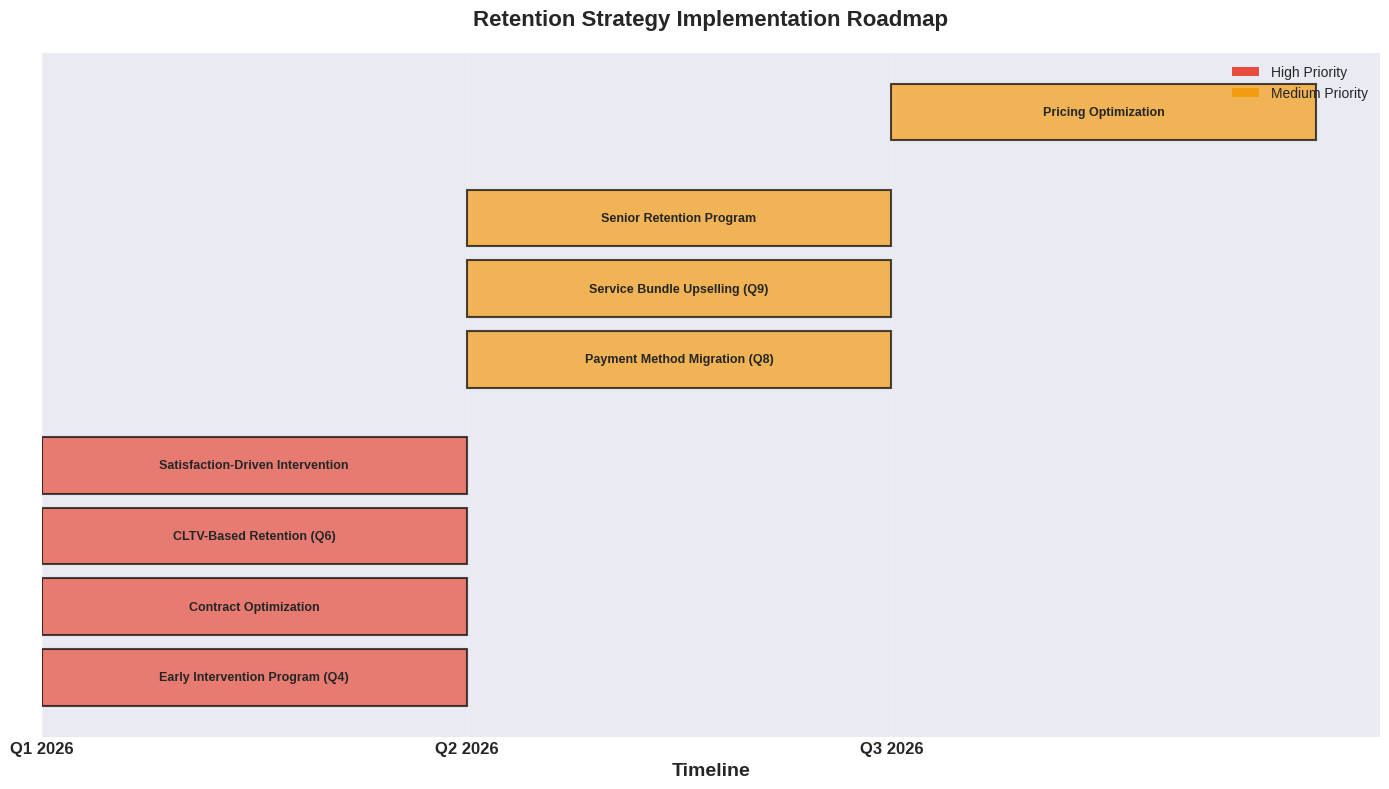


Implementation roadmap visualization created


In [ ]:
#7.4 Implementation Roadmap**

print("7.4 IMPLEMENTATION ROADMAP")

# Create implementation timeline
implementation_roadmap = pd.DataFrame({
    'Phase': ['Q1 2026', 'Q1 2026', 'Q1 2026', 'Q1 2026',
              'Q2 2026', 'Q2 2026', 'Q2 2026',
              'Q3 2026'],
    'Strategy': [
        'Early Intervention Program (Q4)',
        'Contract Optimization',
        'CLTV-Based Retention (Q6)',
        'Satisfaction-Driven Intervention',
        'Payment Method Migration (Q8)',
        'Service Bundle Upselling (Q9)',
        'Senior Retention Program',
        'Pricing Optimization'
    ],
    'Priority': ['High', 'High', 'High', 'High',
                'Medium', 'Medium', 'Medium',
                'Medium'],
    'Duration': ['3 months', '3 months', '3 months', '3 months',
                '2 months', '2 months', '2 months',
                '2 months']
})

print("\nImplementation Timeline:")
print(implementation_roadmap)

# Visualize roadmap
fig, ax = plt.subplots(figsize=(14, 8))

phases = implementation_roadmap['Phase'].unique()
strategies_by_phase = {phase: implementation_roadmap[implementation_roadmap['Phase'] == phase]
                       for phase in phases}

colors = {'High': '#e74c3c', 'Medium': '#f39c12', 'Low': '#95a5a6'}
y_pos = 0

for phase in phases:
    strategies = strategies_by_phase[phase]
    for idx, row in strategies.iterrows():
        color = colors[row['Priority']]
        ax.barh(y_pos, 1, left=list(phases).index(phase),
               color=color, alpha=0.7, edgecolor='black', linewidth=1.5)
        ax.text(list(phases).index(phase) + 0.5, y_pos, row['Strategy'],
               ha='center', va='center', fontsize=9, fontweight='bold')
        y_pos += 1
    y_pos += 0.5  # Space between phases

ax.set_yticks([])
ax.set_xticks(range(len(phases)))
ax.set_xticklabels(phases, fontsize=12, fontweight='bold')
ax.set_xlabel('Timeline', fontsize=14, fontweight='bold')
ax.set_title('Retention Strategy Implementation Roadmap', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors['High'], label='High Priority'),
                  Patch(facecolor=colors['Medium'], label='Medium Priority')]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig(output_path + '/implementation_roadmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nImplementation roadmap visualization created")

In [ ]:
print("7.5 EXPECTED BUSINESS IMPACT")

def get_col(rs, new, old):
    return new if new in rs.columns else old

col_tp  = get_col(retention_strategies, "Target Population", "Target_Population")
col_rr  = get_col(retention_strategies, "Retention Rate", "Expected_Retention_Rate")
col_cp  = get_col(retention_strategies, "Cost per Customer", "Implementation_Cost_Per_Customer")
col_cr  = get_col(retention_strategies, "Customers Retained", "Customers_Retained")
col_tc  = get_col(retention_strategies, "Total Cost", "Total_Implementation_Cost")
col_rp  = get_col(retention_strategies, "Revenue Protected", "Revenue_Protected")
col_roi = "ROI"

if col_cr not in retention_strategies.columns:
    retention_strategies[col_cr] = (
        retention_strategies[col_tp] * retention_strategies[col_rr]
    ).round().astype(int)

if col_rp not in retention_strategies.columns:
    avg_cltv = df_scored["CLTV"].mean()
    retention_strategies[col_rp] = retention_strategies[col_cr] * avg_cltv

if col_tc not in retention_strategies.columns:
    retention_strategies[col_tc] = (
        retention_strategies[col_tp] * retention_strategies[col_cp]
    )

if col_roi not in retention_strategies.columns:
    retention_strategies[col_roi] = (
        retention_strategies[col_rp] / retention_strategies[col_tc]
    ).replace([np.inf, -np.inf], np.nan).round(2)

# --- 2) Aggregate business impact ---

total_retained = retention_strategies[col_cr].sum()
total_revenue_protected = retention_strategies[col_rp].sum()
total_cost = retention_strategies[col_tc].sum()

overall_roi = (
    total_revenue_protected / total_cost if total_cost > 0 else np.nan
)

current_churners = (df_scored["Churn Label"] == "Yes").sum()
total_customers = len(df_scored)
current_churn_rate = current_churners / total_customers * 100

MAX_CHURN_REDUCTION_FRACTION = 0.5

potential_retained = total_retained
max_effective_retained = current_churners * MAX_CHURN_REDUCTION_FRACTION
effective_retained = min(potential_retained, max_effective_retained)

expected_new_churners = current_churners - effective_retained
expected_new_churn_rate = expected_new_churners / total_customers * 100

# --- 3) Printout ---

print("\nAGGREGATE BUSINESS IMPACT (FULL YEAR 2026)")
print("---------------------------------------------------------")
print(f"✓ Planned Customers Retained           : {total_retained:,}")
print(f"✓ Effective Retention (capped @50%)    : {int(effective_retained):,}")
print(f"✓ Total Revenue Protected               : €{total_revenue_protected/1_000_000:,.2f}M")
print(f"✓ Implementation Cost                   : €{total_cost/1_000_000:,.2f}M")
print(f"✓ Overall ROI                           : {overall_roi:.2f}:1")

print("\nCHURN RATE REDUCTION")
print("---------------------------------------------------------")
print(f"Current Churn Rate                     : {current_churn_rate:.1f}%")
print(f"Expected Churn Rate After Interventions: {expected_new_churn_rate:.1f}%")
print(f"Reduction                              : {current_churn_rate - expected_new_churn_rate:.1f} pp")


7.5 EXPECTED BUSINESS IMPACT

AGGREGATE BUSINESS IMPACT (FULL YEAR 2026)
---------------------------------------------------------
✓ Planned Customers Retained           : 4,403
✓ Effective Retention (capped @50%)    : 934
✓ Total Revenue Protected               : €19.37M
✓ Implementation Cost                   : €0.89M
✓ Overall ROI                           : 21.73:1

CHURN RATE REDUCTION
---------------------------------------------------------
Current Churn Rate                     : 26.5%
Expected Churn Rate After Interventions: 13.3%
Reduction                              : 13.3 pp
